In [1]:
#On récupère notre fichier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
data

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
0     98101.0                    0659000030  ...      1.156514e+06   
1     98101.0                    0659000220  ...      9.504252e+05   
2     98101.0                    0659000475  ...      1.451544e+07   
3     98101.0                    0659000640  ...      8.115253e+05   
4     98121.0                    0659000970  ...      1.573449e+06   
...       ...                           ...  ...               ...   
3371      NaN                    1624049080  ...      1.536550e+05   
3372      NaN                    3558300000  ...      1.162210e+05   
3373      NaN                    1794501150  ...      5.252517e+05   
3374      NaN                    7883603155  ...      1.022480e+05   
3375      NaN                    7857002030  ...      1.267744e+05   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0         3.946027e+06        12764.529300      1.276453e+06        False   
1         3.242851e+06        51450.816410      5.145082e+06        False   
2         4.952666e+07        14938.000000      1.493800e+06        False   
3         2.768924e+06        18112.130860      1.811213e+06        False   
4         5.368607e+06        88039.984380      8.803998e+06        False   
...                ...                 ...               ...          ...   
3371      5.242709e+05         3254.750244      3.254750e+05         True   
3372      3.965461e+05         5537.299805      5.537300e+05        False   
3373      1.792159e+06        39737.390630      3.973739e+06        False   
3374      3.488702e+05         3706.010010      3.706010e+05        False   
3375      4.325542e+05         7203.419922      7.203420e+05        False   

      Comments              ComplianceStatus  Outlier  TotalGHGEmissions  \
0          NaN                     Compliant      NaN             249.98   
1          NaN                     Compliant      NaN             295.86   
2          NaN                     Compliant      NaN            2089.28   
3          NaN                     Compliant      NaN             286.43   
4          NaN                     Compliant  

# 1) Structure des données

In [2]:
#Affichage des infos du df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [3]:
#On compte le nombre de colonnes selon leur type
data.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [4]:
#Nombre de valeurs uniques par colonne
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


# 2) Valeurs manquantes et dupliquées 
## 1.1) Valeurs manquantes

[0, 20[      38
[20, 40[      1
[40, 60[      2
[60, 80[      0
[80, 100]     5
Name: Intervalle_pourcentage_val_nul, dtype: int64


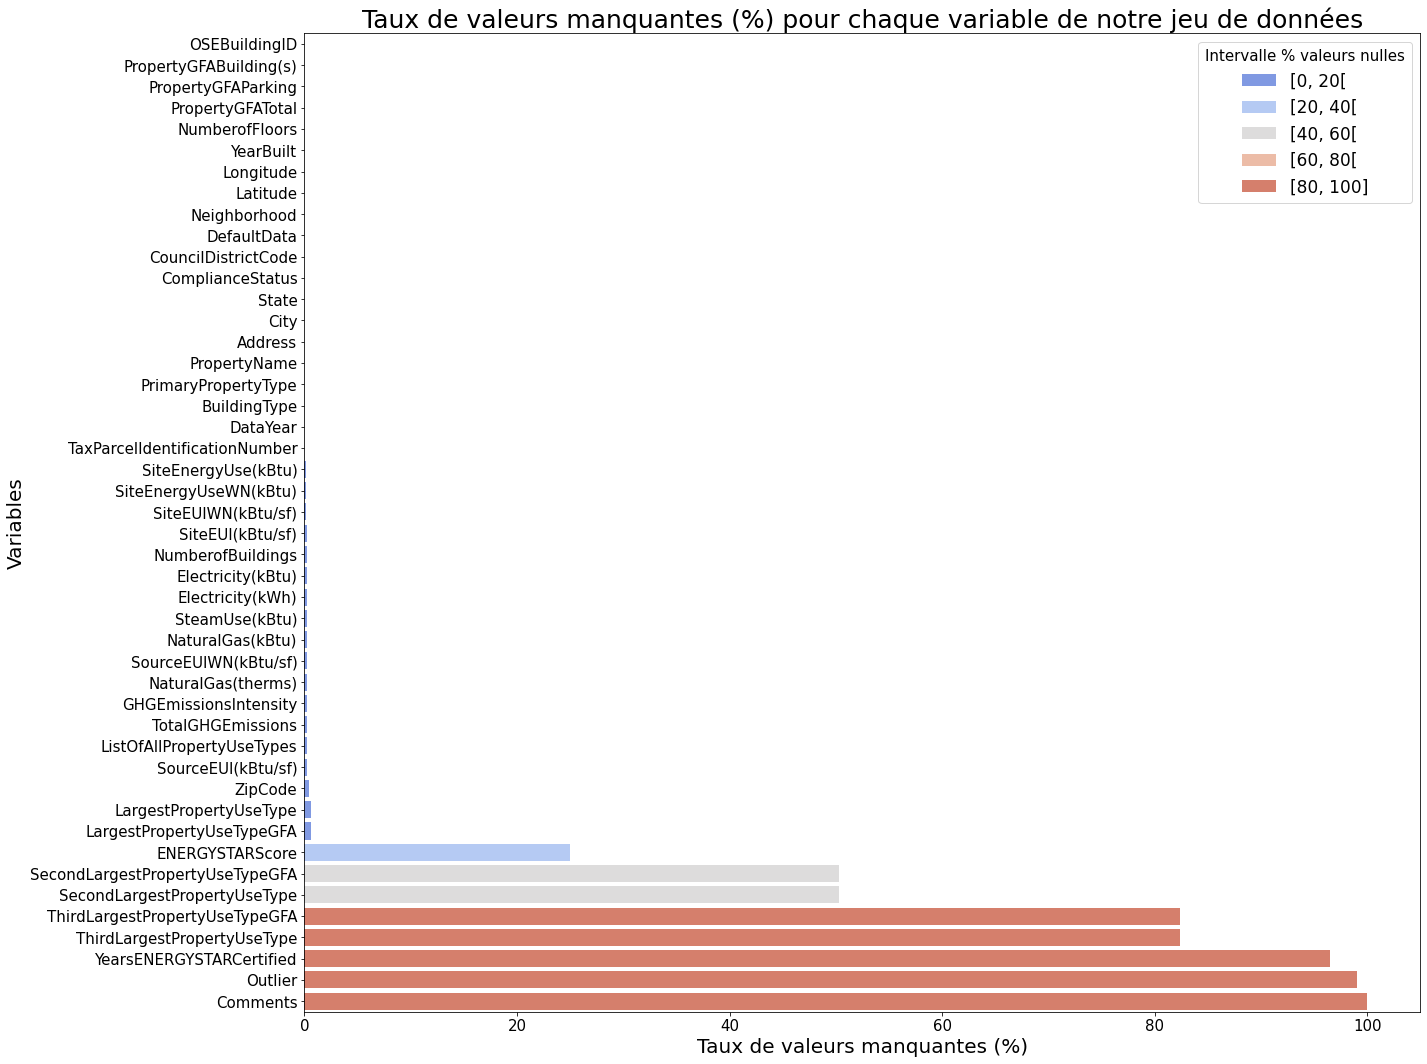

In [5]:
#On regarde les valeurs manquantes
data_nul = data.isnull().sum().sort_values(ascending = True) * 100 / data.shape[0]
data_nul = pd.DataFrame(data_nul).rename(columns = {0 : 'Taux_val_nul'})
data_nul = data_nul.reset_index()

#On va effectuer un groupement de valeurs
def binning(col, cut_points, labels=None):
    # Définir les valeurs min et max:
    minval = col.min()
    maxval = col.max()
    
    # Créer une liste en ajoutant min et max à cut_points
    break_points = [minval] + cut_points + [maxval]
    # Si aucun label, on utilise par défaut les labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)
    # Regroupement en utilisant la fonction cut de Pandas
    cut_points.sort()
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

cut_points = [20, 40, 60, 80]
labels = ['[0, 20[', '[20, 40[', '[40, 60[', '[60, 80[', '[80, 100]']
data_nul['Intervalle_pourcentage_val_nul'] = binning(data_nul['Taux_val_nul'], cut_points, labels)
print(pd.value_counts(data_nul['Intervalle_pourcentage_val_nul'], sort=False))

plt.figure(figsize=(20,18))
sns.barplot(data = data_nul, x = 'Taux_val_nul', y = 'index', hue = 'Intervalle_pourcentage_val_nul',
           palette = 'coolwarm', dodge = False)

plt.xlabel('Taux de valeurs manquantes (%)', size = 20)
plt.ylabel('Variables', size = 20)
plt.title('Taux de valeurs manquantes (%) pour chaque variable de notre jeu de données', size = 25)

plt.legend(title = 'Intervalle % valeurs nulles', prop = {'size':17}, title_fontsize = 15)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

index  Intervalle_pourcentage_val_nul
0    [0, 20[                              38
1   [20, 40[                               1
2   [40, 60[                               2
3   [60, 80[                               0
4  [80, 100]                               5

Text(0.5, 1.0, 'Variables ayant un certain taux de valeurs manquantes (en %)')

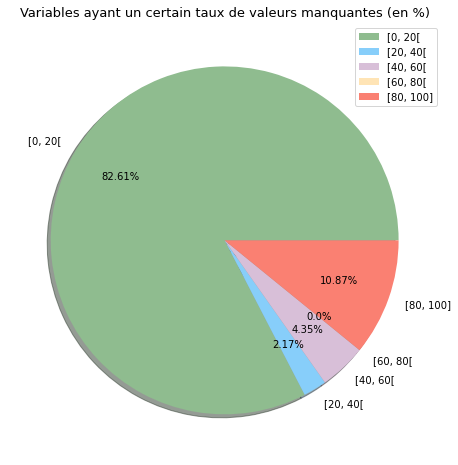

In [6]:
#On crée un df contenant le nombre de valeurs contenues dans chaque intervalle de classe. 
taux_val_nul_count = pd.value_counts(data_nul['Intervalle_pourcentage_val_nul'], sort=False)
taux_val_nul_count = pd.DataFrame(taux_val_nul_count.reset_index())
display(taux_val_nul_count)

#On trace le camembert correspondant
plt.figure(figsize = (8,8))
plt.pie(x = taux_val_nul_count['Intervalle_pourcentage_val_nul'], labels = taux_val_nul_count['index'], 
        colors = ['darkseagreen', 'lightskyblue', 'thistle', 'moccasin', 'salmon'], 
        autopct = lambda x: str(round(x, 2)) + '%', pctdistance = 0.7, shadow = True, normalize=True)
plt.legend()
plt.title('Variables ayant un certain taux de valeurs manquantes (en %)', size = '13')

## 1.2) Valeurs dupliquées

In [7]:
data.duplicated().sum()

0

In [8]:
#On va regarder les doublons en fonction du type de Building, son nom et son adresse
print(data[data.duplicated(['BuildingType', 'PropertyName', 'Address'])].shape[0], 'bâtiments dupliqués')

0 bâtiments dupliqués


Nous n'observons pas de doublons. 

# 3) Inspection des données
## 3.1) Bâtiments résidentiels/non résidentiels

In [9]:
data.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  ...  SiteEnergyUse(kBtu)  \
count     3376.000000      3.376000e+03  ...         3.371000e+03   
mean         4.709123      9.483354e+04  ...         5.403667e+06   
std          5.494465      2.188376e+05  ...         2.161063e+07   
min          0.000000      1.128500e+04  ...         0.000000e+00   
25%          2.000000      2.848700e+04  ...         9.251286e+05   
50%          4.000000      4.417500e+04  ...         1.803753e+06   
75%          5.000000      9.099200e+04  ...         4.222455e+06   
max         99.000000      9.320156e+06  ...         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.370000e+03    3.367000e+03      3.367000e+03   
mean            5.276726e+06    2.745959e+05      1.086639e+06   
std             1.593879e+07    3.912173e+06      4.352478e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%             9.701822e+05    0.000000e+00      1.874229e+05   
50%             1.904452e+06    0.000000e+00      3.451299e+05   
75%             4.381429e+06    0.000000e+00      8.293178e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  Comments  \
count       3.367000e+03        3.367000e+03      3.367000e+03       0.0   
mean        3.707612e+06        1.368505e+04      1.368505e+06       NaN   
std         1.485066e+07        6.709781e+04      6.709781e+06       NaN   
min        -1.154170e+05        0.000000e+00      0.000000e+00       NaN   
25%         6.394870e+05        0.000000e+00      0.000000e+00       NaN   
50%         1.177583e+06        3.237538e+03      3.237540e+05       NaN   
75%         2.829632e+06        1.189033e+04      1.189034e+06       NaN   
max         6.570744e+08        2.979090e+06      2.979090e+08       NaN   

       TotalGHGEmissions  GHGEmissionsIntensity  
count        3367.000000            3367.000000  
mean          119.723971               1.175916  
std           538.832227               1.821452  
min            -0.800000              -0.020000  
25%             9.495000               0.210000  
50%            33.920000               0.610000  
75%            93.940000               1.370000  
max         16870.980000              34.090000  

[8 rows x 30 columns]

In [10]:
#On regarde les types de bâtiments 
data['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [11]:
#On regarde les bâtiments correspondant à des "Résidences"
pd.set_option('display.max_columns', None) #On affiche toutes les colonnes
data.loc[data['PrimaryPropertyType'] == 'Residence Hall', :]
print(data.loc[data['PrimaryPropertyType'] == 'Residence Hall', :].shape[0], 'bâtiments ont comme type de propriété principale "Residence Hall".')
data.loc[data['BuildingType'].str.contains('Multifamily'), :]
print(data.loc[data['PrimaryPropertyType'] == 'Senior Care Community', :].shape[0], 'bâtiments ont comme type de propriété principale "Senior Care Community"')
print(data.loc[data['BuildingType'].str.contains('Multifamily'), :].shape[0], 'bâtiments sont considérés comme des "logements multifamiliaux".')

23 bâtiments ont comme type de propriété principale "Residence Hall".
45 bâtiments ont comme type de propriété principale "Senior Care Community"
1708 bâtiments sont considérés comme des "logements multifamiliaux".


Le projet portant sur la consommation et les émissions de bâtiments **non destinés à l'habitation**, on va se concentrer uniquement sur ces bâtiments. On va donc enlever de notre analyse les bâtiments de type "Multifamily" et les bâtiments dont l'utilisation principale sont des résidences universitaires.

In [12]:
#Suppression des données concernant les bâtiments destinés à l'habitation/résidentiels
data_nonres = data.drop(data[data['BuildingType'].str.contains('Multifamily')].index)
data_nonres = data_nonres.drop(data_nonres[data_nonres['PrimaryPropertyType'].str.contains('Residence', na = False)].index)
data_nonres = data_nonres.drop(data_nonres[data_nonres['LargestPropertyUseType'].str.contains('Multifamily', na =False)].index)
data_nonres = data_nonres.drop(data_nonres[data_nonres['PrimaryPropertyType']== 'Senior Care Community'].index)
data_nonres = data_nonres.drop(data_nonres[data_nonres['LargestPropertyUseType'] == 'Senior Care Community'].index)
print(data_nonres['BuildingType'].value_counts())
print('Les dimensions de notre nouveau df sont de', data_nonres.shape)

NonResidential        1408
SPS-District K-12       98
Nonresidential COS      85
Campus                  23
Nonresidential WA        1
Name: BuildingType, dtype: int64
Les dimensions de notre nouveau df sont de (1615, 46)


In [13]:
#Pourcentage des données en fonction de type de bâtiment
type_bat = data_nonres['BuildingType'].value_counts(normalize = True).round(3).reset_index()
print(type_bat)

                index  BuildingType
0      NonResidential         0.872
1   SPS-District K-12         0.061
2  Nonresidential COS         0.053
3              Campus         0.014
4   Nonresidential WA         0.001


Text(0.5, 1.0, 'Différents types de bâtiments (en %)')

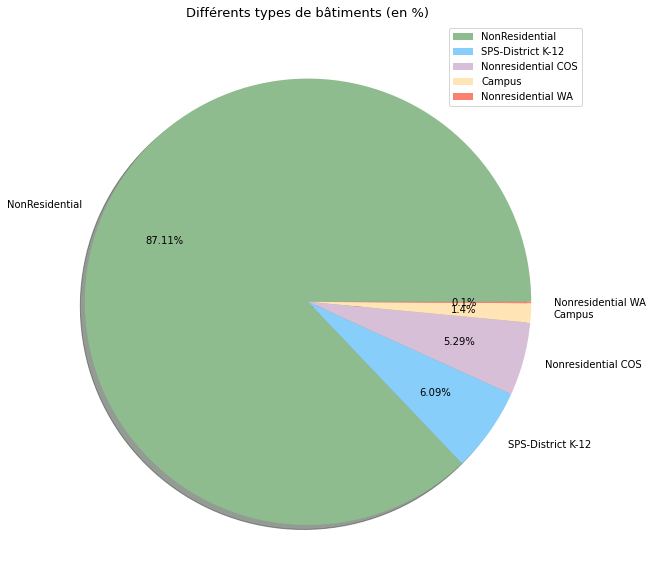

In [14]:
#On trace le camembert correspondant
plt.figure(figsize = (10,15))
plt.pie(x = type_bat['BuildingType'], labels = type_bat['index'], 
        colors = ['darkseagreen', 'lightskyblue', 'thistle', 'moccasin', 'salmon'], 
        autopct = lambda x: str(round(x, 2)) + '%', pctdistance = 0.7, shadow = True, normalize=True)
plt.legend()
plt.title('Différents types de bâtiments (en %)', size = '13')

# 4) Nettoyage du dataset
## 4.1) Valeurs uniques

In [15]:
val = data_nonres.nunique()
val

OSEBuildingID                      1615
DataYear                              1
BuildingType                          5
PrimaryPropertyType                  19
PropertyName                       1611
Address                            1595
City                                  1
State                                 1
ZipCode                              48
TaxParcelIdentificationNumber      1539
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           1450
Longitude                          1364
YearBuilt                           113
NumberofBuildings                    16
NumberofFloors                       44
PropertyGFATotal                   1539
PropertyGFAParking                  314
PropertyGFABuilding(s)             1534
ListOfAllPropertyUseTypes           350
LargestPropertyUseType               54
LargestPropertyUseTypeGFA          1514
SecondLargestPropertyUseType         47
SecondLargestPropertyUseTypeGFA     680


In [16]:
#On regarde quelles sont les colonnes ayant 1 ou 0 valeurs uniques
print(val[(val == 1) | (val == 0)])

cols = val[(val == 1) | (val == 0)].index #On les intègre dans une variable
cols

DataYear    1
City        1
State       1
Comments    0
dtype: int64


Index(['DataYear', 'City', 'State', 'Comments'], dtype='object')

In [17]:
#On va supprimer les colonnes aux valeurs uniques == 1 et 0
data_nonres.drop(columns = cols, inplace = True)
data_nonres.nunique()

OSEBuildingID                      1615
BuildingType                          5
PrimaryPropertyType                  19
PropertyName                       1611
Address                            1595
ZipCode                              48
TaxParcelIdentificationNumber      1539
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           1450
Longitude                          1364
YearBuilt                           113
NumberofBuildings                    16
NumberofFloors                       44
PropertyGFATotal                   1539
PropertyGFAParking                  314
PropertyGFABuilding(s)             1534
ListOfAllPropertyUseTypes           350
LargestPropertyUseType               54
LargestPropertyUseTypeGFA          1514
SecondLargestPropertyUseType         47
SecondLargestPropertyUseTypeGFA     680
ThirdLargestPropertyUseType          38
ThirdLargestPropertyUseTypeGFA      288
YearsENERGYSTARCertified             64


## 4.2) Données non conformes 

### 4.2.1) Missing Data

In [18]:
#On s'intéresse à la variable "ComplianceStatus"
data_nonres['ComplianceStatus'].value_counts()

Compliant                       1496
Error - Correct Default Data      88
Non-Compliant                     17
Missing Data                      14
Name: ComplianceStatus, dtype: int64

In [19]:
#Regardons les "Missing Data" de notre variable "ComplianceStatus"
data_nonres.loc[data_nonres['ComplianceStatus'] == 'Missing Data'].head()

OSEBuildingID       BuildingType PrimaryPropertyType  \
28             34  SPS-District K-12         K-12 School   
31             37  SPS-District K-12         K-12 School   
62             87  SPS-District K-12         K-12 School   
81            118  SPS-District K-12         K-12 School   
85            122  SPS-District K-12         K-12 School   

                PropertyName               Address  ZipCode  \
28            Meany Building  301/300 21st Ave. E.  98112.0   
31       John Hay Elementary      201 Garfield St.  98109.0   
62  Arbor Heights Elementary   3701 S.W. 104th St.  98146.0   
81            Pathfinder K-8   1901 SW Genesee St.  98106.0   
85      John Muir Elementary    3301 S. Horton St.  98144.0   

   TaxParcelIdentificationNumber  CouncilDistrictCode           Neighborhood  \
28                    0688000090                    3                Central   
31                    0809000005                    7  MAGNOLIA / QUEEN ANNE   
62                    2518400005                    1              SOUTHWEST   
81                    1324039116                    1               DELRIDGE   
85                    1524049002                    2              SOUTHEAST   

    Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
28  47.62266 -122.30547       1955                1.0               1   
31  47.63290 -122.35172       1989                1.0               2   
62  47.50970 -122.37759       1948                1.0               2   
81  47.56360 -122.35800       1999                1.0               3   
85  47.57324 -122.29058       1991                1.0               2   

    PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
28            126351                   0                  126351   
31             51582                   0                   51582   
62             53352                   0                   53352   
81             74468                   0                   74468   
85             58933                   0                   58933   

   ListOfAllPropertyUseTypes LargestPropertyUseType  \
28               K-12 School            K-12 School   
31               K-12 School            K-12 School   
62               K-12 School            K-12 School   
81               K-12 School            K-12 School   
85               K-12 School            K-12 School   

    LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
28                   126351.0                          NaN   
31                    55166.0                          NaN   
62                    65568.0                          NaN   
81                    75364.0                          NaN   
85                    60725.0                          NaN   

    SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
28                              NaN                         NaN   
31                              NaN                         NaN   
62                              NaN                         NaN   
81                              NaN                         NaN   
85                              NaN                         NaN   

    ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
28                             NaN                      NaN              NaN   
31                             NaN                      NaN              NaN   
62                             NaN                      NaN              NaN   
81                             NaN                      NaN              NaN   
85                             NaN                      NaN              NaN   

    SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
28               0.0                 0.0                 0.0   
31               0.0                 0.0                 0.0   
62               0.0                 0.0                 0.0   
81               0.0                 0.0                 0.0   
85               0.0       

On va retirer les "Missing Data" de notre jeu de données

In [20]:
data_nonres = data_nonres.drop(data_nonres[data_nonres['ComplianceStatus'] == 'Missing Data'].index)
data_nonres.head()
data_nonres.shape

(1601, 42)

### 4.2.2) Compliant et Outlier

In [21]:
#Regardons les colonnes "Non compliant"
data_nonres.loc[data_nonres['ComplianceStatus'] == 'Non-Compliant', :].head()

OSEBuildingID    BuildingType PrimaryPropertyType  \
226            350  NonResidential        Large Office   
304            435  NonResidential               Other   
384            539  NonResidential        Retail Store   
448            608  NonResidential        Large Office   
517            704  NonResidential        Large Office   

                           PropertyName                Address  ZipCode  \
226          Second And Spring Building     1100 Second Avenue  98101.0   
304  Washington State Convention Center            705 Pike St  98101.0   
384                   University Center  4501 Roosevelt Way NE  98105.0   
448              411 1ST AVE  S (ID608)          411 1ST AVE S  98104.0   
517                401 Elliott Ave West    401 Elliot Ave West  98119.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode           Neighborhood  \
226                    0942000045                    7               DOWNTOWN   
304                    1978200105                    7               DOWNTOWN   
384                    5335200380                    4              NORTHEAST   
448                    5247800200                    2               DOWNTOWN   
517                    7666202110                    7  MAGNOLIA / QUEEN ANNE   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
226  47.60642 -122.33581       1958                1.0               6   
304  47.61195 -122.33167       1990                1.0               6   
384  47.66178 -122.31812       1987                1.0               2   
448  47.59878 -122.33458       1913                5.0               7   
517  47.62235 -122.36378       2000                1.0               4   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
226            172842               25920                  146922   
304           1400000                   0                 1400000   
384             69492                   0                   69492   
448            154159                   0                  154159   
517            129551               42500                   87051   

        ListOfAllPropertyUseTypes LargestPropertyUseType  \
226  Data Center, Office, Parking                 Office   
304    Convention Center, Parking      Convention Center   
384                  Retail Store           Retail Store   
448                        Office                 Office   
517  Data Center, Office, Parking                 Office   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
226                    99890.0                  Data Center   
304                  1072000.0                      Parking   
384                    69800.0                        Other   
448                   193154.0                          NaN   
517                    82273.0                      Parking   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
226                          39336.0                     Parking   
304                         686750.0                         NaN   
384                              0.0                         NaN   
448                              NaN                         NaN   
517                          42500.0                 Data Center   

     ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
226                         25000.0                      NaN              NaN   
304                             NaN                      NaN              NaN   
384                             NaN                      NaN            100.0   
448                             NaN                      NaN            100.0   
517                          4778.0                      NaN              1.0   

     SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
226        297.399994          299.200012          909.599976   
304               NaN            0.000000            0.000000   
384          4.600000      

Si on regarde les valeurs de la variable "ComplianceStatus" notées comme "Non-Compliant", on observe que pour la variable "Outlier", on a des données considérées comme "High" et "Low outlier"

In [22]:
#On crée 3 groupes (high, no, low outlier) en fonction de la variable "Outlier"
outliers = [
    (data_nonres['Outlier'] == 'High outlier'),
    ((data_nonres['Outlier'].isnull())), 
    (data_nonres['Outlier'] == 'Low outlier')]

choicelist = ['High', 'No', 'Low']

data_nonres['Out'] = np.select(outliers, choicelist, default = 'Not Specified')

display(data_nonres.head())

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2           97.699997          241.899994            244.100006   
3          113.300003          216.199997            224.000000   
4          118.69

In [23]:
#On regroupe nos données par rapport à notre nouvelle variable "Out"
data_out = data_nonres.groupby('Out').count().reset_index()
display(data_out)

Out  OSEBuildingID  BuildingType  PrimaryPropertyType  PropertyName  \
0  High              2             2                    2             2   
1   Low             14            14                   14            14   
2    No           1585          1585                 1585          1585   

   Address  ZipCode  TaxParcelIdentificationNumber  CouncilDistrictCode  \
0        2        2                              2                    2   
1       14       14                             14                   14   
2     1585     1569                           1585                 1585   

   Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0             2         2          2          2                  2   
1            14        14         14         14                 14   
2          1585      1585       1585       1585               1583   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0               2                 2                   2   
1              14                14                  14   
2            1585              1585                1585   

   PropertyGFABuilding(s)  ListOfAllPropertyUseTypes  LargestPropertyUseType  \
0                       2                          2                       2   
1                      14                         14                      14   
2                    1585                       1583                    1579   

   LargestPropertyUseTypeGFA  SecondLargestPropertyUseType  \
0                          2                             2   
1                         14                             4   
2                       1579                           821   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseType  \
0                                2                            2   
1                                4                            0   
2                              821                          336   

   ThirdLargestPropertyUseTypeGFA  YearsENERGYSTARCertified  ENERGYSTARScore  \
0                               2                         0                1   
1                               0                         0               10   
2                             336                        97             1042   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0                 2                   2                   2   
1                14                  14                  14   
2              1582                1582                1583   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                     2                    2                      2   
1                    14                   14                     14   
2                  1583                 1583                   1582   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0               2                 2                  2                   2   
1              14                14                 14                  14   
2            1583              1583               1583                1583   

   NaturalGas(kBtu)  DefaultData  ComplianceStatus  Outlier  \
0                 2            2                 2        2   
1                14           14                14       14   
2              1583         1585              1585        0   

   TotalGHGEmissions  GHGEmissionsIntensity  
0                  2                      2  
1                 14                     14  
2               1583                   1583

 On observe 2 bâtiments considérés comme "High outlier", 14 bâtiments comme "Low outlier" et le reste des bâtiments (1585) ne sont pas considérés comme des outliers

## 4.3) Valeurs manquantes

In [24]:
#Regardons les colonnes contenant des valeurs manquantes
data_nonres.isnull().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     2
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             2
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseType        774
SecondLargestPropertyUseTypeGFA     774
ThirdLargestPropertyUseType        1263
ThirdLargestPropertyUseTypeGFA     1263
YearsENERGYSTARCertified           1504


### 4.3.1) Largest Property Use Type

In [25]:
#Regardons pour les bâtiments aux valeurs manquantes pour la colonne "LargestPropertyUseType"
data_nonres.loc[data_nonres['LargestPropertyUseType'].isnull(), :]

OSEBuildingID    BuildingType          PrimaryPropertyType  \
353             496  NonResidential        Self-Storage Facility   
578             773  NonResidential  Small- and Mid-Sized Office   
1147          21103  NonResidential                        Hotel   
2414          25568  NonResidential  Small- and Mid-Sized Office   
2459          25711  NonResidential                   Restaurant   
2670          26532  NonResidential           Mixed Use Property   

                          PropertyName                 Address  ZipCode  \
353                   Market St Center   2811 NW Market Street  98107.0   
578                   SEATTLE BUILDING         215 COLUMBIA ST  98104.0   
1147                   Palladian Hotel      2000 Second Avenue  98121.0   
2414               Talon Northlake LLC    1341 N Northlake Way  98103.0   
2459  BUSH GARDEN - RESTURANT & LOUNGE     614 S MAYNARD AVE S  98104.0   
2670                  KALBERG BUILDING  4515 UNIVERSITY WAY NE  98105.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
353                     1175001235                    6      BALLARD   
578                     0939000245                    7     DOWNTOWN   
1147                    1977201140                    7     DOWNTOWN   
2414                    4088804565                    4   LAKE UNION   
2459                    5247802410                    2     DOWNTOWN   
2670                    8816401120                    4    NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
353   47.66838 -122.39310       1946                2.0               2   
578   47.60380 -122.33293       1924                NaN               4   
1147  47.61203 -122.34165       1910                1.0               8   
2414  47.64747 -122.34086       2008                1.0               4   
2459  47.59697 -122.32474       1913                1.0               3   
2670  47.66182 -122.31345       1928                NaN               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
353             111445                   0                  111445   
578              63150                   0                   63150   
1147             61721                   0                   61721   
2414             48350                   0                   48350   
2459             28800                   0                   28800   
2670             20760                   0                   20760   

                              ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other ...   
578                                                 NaN   
1147                                              Hotel   
2414                                             Office   
2459                                         Restaurant   
2670                                                NaN   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353                     NaN                        NaN   
578                     NaN                        NaN   
1147                    NaN                        NaN   
2414                    NaN                        NaN   
2459                    NaN                        NaN   
2670                    NaN                        NaN   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
353                           NaN                              NaN   
578                           NaN                              NaN   
1147                          NaN                              NaN   
2414                          NaN                              NaN   
2459                          NaN                              NaN   
2670                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
353                          NaN                             NaN   
578                          NaN 

Les valeurs manquantes pour la variable "LargestPropertyUseType" correspondent à des erreurs car nous devrions effectivement avoir des valeurs étant donné que l'on a des valeurs pour "ListOfAllPropertyUseTypes".

On va donc regarder, pour chaque valeur dans la colonne "PrimaryPropertyType", quelles sont les valeurs les plus fréquentes pour la variable "LargestPropertyUseType" et attribuer leur attribuer cette valeur.

In [26]:
#Création d'une fonction qui va attribuer la valeur la plus présente d'une variable dont la valeur est manquante 
#pour une catégorie donnée

def imput_cat_value(nom_df, col_categ, nom_categ, col_var):
    x = nom_df.loc[nom_df[col_categ] == nom_categ, col_var]
    y = pd.DataFrame(x).value_counts().reset_index()
    nom_df.loc[(nom_df[col_categ] == nom_categ) &
               (nom_df[col_var].isnull()), col_var] = y.iloc[0, 0]

In [27]:
#On va utiliser notre fonction au cas par cas pour nos 4 bâtiments aux valeurs manquantes 
imput_cat_value(data_nonres, 'PrimaryPropertyType', 'Self-Storage Facility', 'LargestPropertyUseType')
imput_cat_value(data_nonres, 'PrimaryPropertyType', 'Hotel', 'LargestPropertyUseType')
imput_cat_value(data_nonres, 'PrimaryPropertyType', 'Small- and Mid-Sized Office', 'LargestPropertyUseType')
imput_cat_value(data_nonres, 'PrimaryPropertyType', 'Restaurant', 'LargestPropertyUseType')
imput_cat_value(data_nonres, 'PrimaryPropertyType', 'Restaurant', 'LargestPropertyUseType')
imput_cat_value(data_nonres, 'PrimaryPropertyType', 'Mixed Use Property', 'LargestPropertyUseType')

In [28]:
#Vérifions que nous n'avons plus de valeurs manquantes pour la colonne "LargestPropertyUseType"
data_nonres.loc[data_nonres['LargestPropertyUseType'].isnull(), :].shape[0]

0

### 4.3.2) Second et Third Property Use Type

In [29]:
#On va compter le nombre de "types d'utilisation" des bâtiments dans la colonne "ListOfAllPropertyUseTypes" pour chaque bâtiment
#On divise les chaines autour du séparateur (,)

data_nonres.loc[:, 'ListOfAllPropertyUseTypes'] = data_nonres['ListOfAllPropertyUseTypes'].str.split(',')
data_nonres.dtypes

#On crée une nouvelle colonne affichant le nombre de "types d'utilisation" des bâtiments de la colonne "ListOfAllPropertyUseTypes"
data_nonres['CountPropertyUseTypes'] = data_nonres['ListOfAllPropertyUseTypes'].str.len()

#On va faire une jointure des listes de la colonne "additives_tags" avec le séparateur (",")
data_nonres['ListOfAllPropertyUseTypes'] = data_nonres['ListOfAllPropertyUseTypes'].str.join(",")
display(data_nonres.head())

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2           97.699997          241.899994            244.100006   
3          113.300003          216.199997            224.000000   
4          118.69

In [30]:
#On crée une colonne indiquant s'il y a des erreurs selon le nombre de "types d'utilisations" et la présence/absence de valeurs
#pour les Largest/Second ou Third PropertyUseType

condition_list = [
    (data_nonres['CountPropertyUseTypes'] == 1) & (data_nonres['LargestPropertyUseType'].isnull()),
    (data_nonres['CountPropertyUseTypes'] == 2) & (data_nonres['SecondLargestPropertyUseType'].isnull()),
    (data_nonres['CountPropertyUseTypes'] >= 3) & (data_nonres['ThirdLargestPropertyUseType'].isnull())
]

choicelist = ['Error', 'Error', 'Error']

data_nonres['Error Buildings'] = np.select(condition_list, choicelist, default = 'No Error')

display(data_nonres.loc[data_nonres['Error Buildings'] == 'Error'].head())
print(data_nonres.loc[data_nonres['Error Buildings'] == 'Error'].shape[0], 'bâtiments contenant des valeurs manquantes compte tenu du nombre de "types d\'utilisation" correspondant.')

OSEBuildingID        BuildingType    PrimaryPropertyType  \
45               58      NonResidential                  Other   
107             174  Nonresidential COS                  Other   
266             393      NonResidential                  Other   
353             496      NonResidential  Self-Storage Facility   
1666          23049      NonResidential                  Other   

                     PropertyName                Address  ZipCode  \
45                1525 4th Avenue           1525 4th Ave  98101.0   
107   CSC Vehicle Maintenance (E)       805 S Charles St  98134.0   
266                      500 Yale         500 Yale Ave N  98109.0   
353              Market St Center  2811 NW Market Street  98107.0   
1666                      Laidlaw      7739 1st Avenue S  98108.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
45                      1975700365                    7          DOWNTOWN   
107                     6834700175                    2  GREATER DUWAMISH   
266                     0209000030                    7        LAKE UNION   
353                     1175001235                    6           BALLARD   
1666                    3024049018                    1          DELRIDGE   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
45    47.61076 -122.33765       1920                1.0               2   
107   47.59545 -122.32146       1950                1.0               1   
266   47.62323 -122.33028       2009                1.0               5   
353   47.66838 -122.39310       1946                2.0               2   
1666  47.53366 -122.33733       1963                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
45               57428                   0                   57428   
107              67356                   0                   67356   
266             141131               69710                   71421   
353             111445                   0                  111445   
1666             23260                   0                   23260   

                              ListOfAllPropertyUseTypes  \
45    Other - Mall, Personal Services (Health/Beauty...   
107     Repair Services (Vehicle, Shoe, Locksmith, etc)   
266   Office, Parking, Personal Services (Health/Bea...   
353   Fitness Center/Health Club/Gym, Office, Other ...   
1666  Office, Repair Services (Vehicle, Shoe, Locksm...   

                               LargestPropertyUseType  \
45                                       Other - Mall   
107   Repair Services (Vehicle, Shoe, Locksmith, etc)   
266                                           Parking   
353                             Self-Storage Facility   
1666  Repair Services (Vehicle, Shoe, Locksmith, etc)   

      LargestPropertyUseTypeGFA  \
45                      51747.0   
107                     68359.0   
266                     74831.0   
353                         NaN   
1666                    13075.0   

                           SecondLargestPropertyUseType  \
45    Personal Services (Health/Beauty, Dry Cleaning...   
107                                                 NaN   
266                                              Office   
353                                                 NaN   
1666                                             Office   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
45                             5681.0                         NaN   
107                               NaN                         NaN   
266                           71643.0                         NaN   
353                               NaN                         NaN   
1666                          10185.0                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
45                               NaN                      NaN   
107                              NaN              

10 bâtiments contenant des valeurs manquantes compte tenu du nombre de "types d'utilisation" correspondant.


In [31]:
#On va remplacer les valeurs manquantes pour les variables Second et Third LPUTGFA par 0 et les valeurs manquantes des variables
#Second et Third LPUT par l'information "Lack data" 
data_nonres.loc[data_nonres['SecondLargestPropertyUseTypeGFA'].isnull(), 'SecondLargestPropertyUseTypeGFA'] = 0
data_nonres.loc[data_nonres['ThirdLargestPropertyUseTypeGFA'].isnull(), 'ThirdLargestPropertyUseTypeGFA'] = 0
data_nonres.loc[data_nonres['LargestPropertyUseTypeGFA'].isnull(), 'LargestPropertyUseTypeGFA'] = 0
data_nonres.loc[data_nonres['SecondLargestPropertyUseType'].isnull(), 'SecondLargestPropertyUseType'] = 'Lack data'
data_nonres.loc[data_nonres['ThirdLargestPropertyUseType'].isnull(), 'ThirdLargestPropertyUseType'] = 'Lack data'

data_nonres.head()

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                    Lack data                              0.0   
1                      Parking                          15064.0   
2                    Lack data                              0.0   
3                    Lack data                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                   Lack data                             0.0   
1                  Restaurant                          4622.0   
2                   Lack data                             0.0   
3                   Lack data                             0.0   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2           97.699997          241.899994            244.100006   
3          113.300003          216.199997            224.000000   
4          118.69

### 4.3.3) Energy Star Score

In [32]:
#Plot des valeurs manquantes
count_nan = data_nonres['ENERGYSTARScore'].isnull().sum()*100 / data_nonres['ENERGYSTARScore'].shape[0]
print(count_nan.round(2), '% de valeurs manquantes')

34.23 % de valeurs manquantes


C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENERGYSTARScore'>

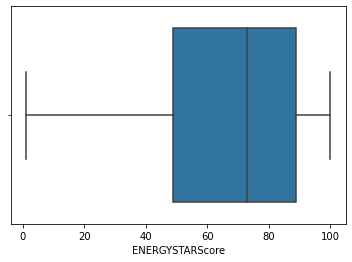

In [33]:
#Regardons la ditribution des données pour l'ESS
sns.boxplot(data_nonres['ENERGYSTARScore'])

Il n'y a pas d'outliers observées, donc on va attribuer aux valeurs manquantes, la valeur moyenne par le **SimpleImputer**.

In [34]:
from sklearn.impute import SimpleImputer

mean_imputer_copy = data_nonres.copy()

mean_imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(mean_imputer_copy[['ENERGYSTARScore']])
mean_imputer_copy['ENERGYSTARScore'] = mean_imputer.transform(mean_imputer_copy[['ENERGYSTARScore']])
mean_imputer_copy.head()

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                    Lack data                              0.0   
1                      Parking                          15064.0   
2                    Lack data                              0.0   
3                    Lack data                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                   Lack data                             0.0   
1                  Restaurant                          4622.0   
2                   Lack data                             0.0   
3                   Lack data                             0.0   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2           97.699997          241.899994            244.100006   
3          113.300003          216.199997            224.000000   
4          118.69

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENERGYSTARScore'>

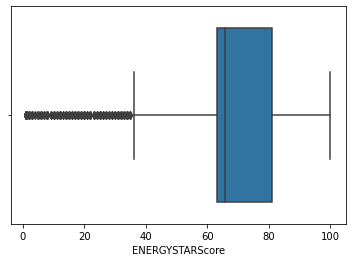

In [35]:
#Regardons la ditribution des données pour l'ESS
sns.boxplot(mean_imputer_copy['ENERGYSTARScore'])

On observe une différence dans la distribution des données. Testons avec le **KNNImputer**.

In [36]:
from sklearn.impute import KNNImputer

KNN_imputer_copy = data_nonres.copy().select_dtypes(["int", "float"]).dropna(axis = 1)
KNN_imputer_copy['ENERGYSTARScore'] = data_nonres['ENERGYSTARScore']
KNN_imputer_copy.head()

OSEBuildingID  CouncilDistrictCode  Latitude  Longitude  YearBuilt  \
0              1                    7  47.61220 -122.33799       1927   
1              2                    7  47.61317 -122.33393       1996   
2              3                    7  47.61393 -122.33810       1969   
3              5                    7  47.61412 -122.33664       1926   
4              8                    7  47.61375 -122.34047       1980   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0              12             88434                   0   
1              11            103566               15064   
2              41            956110              196718   
3              10             61320                   0   
4              18            175580               62000   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   88434                    88434.0   
1                   88502                    83880.0   
2                  759392                   756493.0   
3                   61320                    61320.0   
4                  113580                   123445.0   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              0.0                             0.0   
1                          15064.0                          4622.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                          68009.0                             0.0   

   ENERGYSTARScore  
0             60.0  
1             61.0  
2             43.0  
3             56.0  
4             75.0

In [37]:
#On récupère à nouveau notre df avec les variables quantitatives n'ayant pas de valeurs manquantes et l'ESS
KNN_imputer_copy = data_nonres.copy().select_dtypes(["int", "float"]).dropna(axis = 1)
KNN_imputer_copy['ENERGYSTARScore'] = data_nonres['ENERGYSTARScore']
KNN_imputer_copy

OSEBuildingID  CouncilDistrictCode  Latitude  Longitude  YearBuilt  \
0                 1                    7  47.61220 -122.33799       1927   
1                 2                    7  47.61317 -122.33393       1996   
2                 3                    7  47.61393 -122.33810       1969   
3                 5                    7  47.61412 -122.33664       1926   
4                 8                    7  47.61375 -122.34047       1980   
...             ...                  ...       ...        ...        ...   
3371          50222                    2  47.56722 -122.31154       1990   
3372          50223                    2  47.59625 -122.32283       2004   
3373          50224                    7  47.63644 -122.35784       1974   
3374          50225                    1  47.52832 -122.32431       1989   
3375          50226                    2  47.53939 -122.29536       1938   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                 ...   
3371               1             12294                   0   
3372               1             16000                   0   
3373               1             13157                   0   
3374               1             14101                   0   
3375               1             18258                   0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                      88434                    88434.0   
1                      88502                    83880.0   
2                     759392                   756493.0   
3                      61320                    61320.0   
4                     113580                   123445.0   
...                      ...                        ...   
3371                   12294                    12294.0   
3372                   16000                    16000.0   
3373                   13157                     7583.0   
3374                   14101                     6601.0   
3375                   18258                     8271.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                                 0.0                             0.0   
1                             15064.0                          4622.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                             68009.0                             0.0   
...                               ...                             ...   
3371                              0.0                             0.0   
3372                              0.0                             0.0   
3373                           5574.0                             0.0   
3374                           6501.0                           484.0   
3375                           8000.0                          1108.0   

      ENERGYSTARScore  
0                60.0  
1                61.0  
2                43.0  
3                56.0  
4                75.0  
...               ...  
3371             46.0  
3372              NaN  
3373              NaN  
3374              NaN  
3375              NaN  

[1601 rows x 13 columns]

In [38]:
knn_imputer = KNNImputer(n_neighbors=2)
knn_impute_ESS = pd.DataFrame(knn_imputer.fit_transform(KNN_imputer_copy),columns=KNN_imputer_copy.columns, index=data_nonres.index)

In [39]:
knn_impute_ESS.head()

OSEBuildingID  CouncilDistrictCode  Latitude  Longitude  YearBuilt  \
0            1.0                  7.0  47.61220 -122.33799     1927.0   
1            2.0                  7.0  47.61317 -122.33393     1996.0   
2            3.0                  7.0  47.61393 -122.33810     1969.0   
3            5.0                  7.0  47.61412 -122.33664     1926.0   
4            8.0                  7.0  47.61375 -122.34047     1980.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0            12.0           88434.0                 0.0   
1            11.0          103566.0             15064.0   
2            41.0          956110.0            196718.0   
3            10.0           61320.0                 0.0   
4            18.0          175580.0             62000.0   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                 88434.0                    88434.0   
1                 88502.0                    83880.0   
2                759392.0                   756493.0   
3                 61320.0                    61320.0   
4                113580.0                   123445.0   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              0.0                             0.0   
1                          15064.0                          4622.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                          68009.0                             0.0   

   ENERGYSTARScore  
0             60.0  
1             61.0  
2             43.0  
3             56.0  
4             75.0

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENERGYSTARScore'>

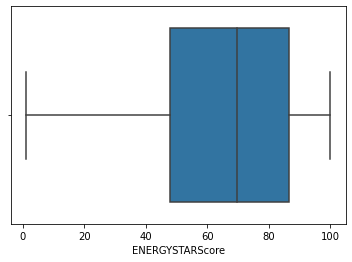

In [40]:
#Regardons la ditribution des données pour l'ESS
sns.boxplot(knn_impute_ESS['ENERGYSTARScore'])

On observe que le **KNNImputer** ne modifie pas la distribution des données. 

Néanmoins, on observe un certain nombre de valeurs manquantes (> 20%), donc afin de ne pas attribuer de valeurs non fiables en imputant, on va **laisser les valeurs manquantes**. 

### 4.3.4) SiteEUIWN(kBtu/sf), SiteEnergyUseWN(kBtu/sf) et SiteEUI(kBtu/sf)

In [41]:
#On va attribuer 0 à la valeur manquante pour les variables "SiteEUIWN(kBtu/sf)" et "SiteEnergyUseWN(kBtu)"
data_nonres.loc[:, ['SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SiteEUI(kBtu/sf)']] = data_nonres.loc[:, ['SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SiteEUI(kBtu/sf)']].fillna(0)

### 4.3.5) ZipCode

In [42]:
#On va regarder les données pour lesquelles nous avons des valeurs manquantes pour le ZipCode

display(data_nonres.loc[data_nonres['ZipCode'].isnull(), :].head())
print(data_nonres.loc[data_nonres['ZipCode'].isnull(), :].shape[0], 'bâtiments dont on ne connait pas le ZipCode')

zipcode_1 = data_nonres.loc[data_nonres['ZipCode'].isnull(), ['OSEBuildingID', 'Address', 'Latitude', 'Longitude']]
zipcode_1

OSEBuildingID        BuildingType PrimaryPropertyType  \
3360          50196  Nonresidential COS  Mixed Use Property   
3361          50198  Nonresidential COS               Other   
3362          50201  Nonresidential COS               Other   
3363          50204  Nonresidential COS               Other   
3364          50207  Nonresidential COS               Other   

                    PropertyName           Address  ZipCode  \
3360  Northgate Community Center  10510 5th Ave NE      NaN   
3361       Fire Station 06 (New)  405 MLK Jr Way S      NaN   
3362       Fire Station 35 (New)  8729 15th Ave NW      NaN   
3363       Fire Station 39 (New)  2806 NE 127th St      NaN   
3364    Ballard Community Center  6020 28th ave NW      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
3360                    2926049431                    5        NORTH   
3361                    1250200565                    3      CENTRAL   
3362                    3300700810                    6      BALLARD   
3363                    3834500066                    5        NORTH   
3364                    6658000065                    6      BALLARD   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3360  47.70541 -122.32232       2005                1.0               1   
3361  47.59905 -122.29787       2013                1.0               1   
3362  47.69330 -122.37717       2010                1.0               1   
3363  47.72126 -122.29735       1949                1.0               1   
3364  47.67295 -122.39228       1911                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3360             20616                   0                   20616   
3361             11685                   0                   11685   
3362             11968                   0                   11968   
3363             11285                   0                   11285   
3364             16795                   0                   16795   

                              ListOfAllPropertyUseTypes  \
3360  Fitness Center/Health Club/Gym, Office, Other ...   
3361                               Prison/Incarceration   
3362                               Prison/Incarceration   
3363                               Prison/Incarceration   
3364  Fitness Center/Health Club/Gym, Food Service, ...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3360     Other - Recreation                     9900.0   
3361   Prison/Incarceration                    11685.0   
3362   Prison/Incarceration                    11968.0   
3363   Prison/Incarceration                    11285.0   
3364     Other - Recreation                     8680.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3360  Fitness Center/Health Club/Gym                           8577.0   
3361                       Lack data                              0.0   
3362                       Lack data                              0.0   
3363                       Lack data                              0.0   
3364  Fitness Center/Health Club/Gym                           7014.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3360          Pre-school/Daycare                          1364.0   
3361                   Lack data                             0.0   
3362                   Lack data                             0.0   
3363                   Lack data                             0.0   
3364          Pre-school/Daycare                           535.0   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3360                      NaN              NaN         30.900000   
3361                      NaN              NaN         72.800003   
3362                      NaN              NaN         65.500000   
3363                      NaN              NaN         57.200001   
3364                      NaN              NaN     

16 bâtiments dont on ne connait pas le ZipCode


OSEBuildingID              Address  Latitude  Longitude
3360          50196     10510 5th Ave NE  47.70541 -122.32232
3361          50198     405 MLK Jr Way S  47.59905 -122.29787
3362          50201     8729 15th Ave NW  47.69330 -122.37717
3363          50204     2806 NE 127th St  47.72126 -122.29735
3364          50207     6020 28th ave NW  47.67295 -122.39228
3365          50208      1471 NW 67th St  47.67734 -122.37624
3366          50210          1403 w howe  47.63572 -122.37525
3367          50212      1400 E Galer St  47.63228 -122.31574
3368          50219  2323 East Cherry St  47.60775 -122.30225
3369          50220       4420 S Genesee  47.56440 -122.27813
3370          50221     6920 34th Ave SW  47.54067 -122.37441
3371          50222     1600 S Dakota St  47.56722 -122.31154
3372          50223        719 8th Ave S  47.59625 -122.32283
3373          50224       1920 1st Ave W  47.63644 -122.35784
3374          50225       8319 8th Ave S  47.52832 -122.32431
3375          50226     2820 S Myrtle St  47.53939 -122.29536

In [43]:
#On installe geopy : permet de manipuler les informations géographiques et de géolocalisation. 
!pip install geopy

In [44]:
#Modification de l'adresse de la deuxième ligne
data_nonres['Address'] = data_nonres['Address'].str.replace('405 MLK Jr Way S', '405 Martin Luther King Jr Way')
zipcode_1['Address'] = zipcode_1['Address'].str.replace('405 MLK Jr Way S', '405 Martin Luther King Jr Way')

In [45]:
#On importe Nomnatim qui va permettre de rechercher des informations géographiques à partir d'une adresse/nom de lieu. 
from geopy.geocoders import Nominatim
from time import sleep

#API Nominatim pour obtenir l'emplacement à partir de la chaine d'entrée
geolocator = Nominatim(user_agent="geoapiExercises")

#Obtention de l'emplacement à partir de la fonction geolocator.geocode
for i in zipcode_1['Address']:
    place = i
    sleep(1)
    location = geolocator.geocode(place)
    if not location: 
        print('Echec pour', place)
    dataf = location.raw
    loc_data = dataf['display_name'].split()
    print(i, 'ZipCode is :', loc_data[-3])

10510 5th Ave NE ZipCode is : 98125,
405 Martin Luther King Jr Way ZipCode is : 98405,
8729 15th Ave NW ZipCode is : 98117,
2806 NE 127th St ZipCode is : 98125,
6020 28th ave NW ZipCode is : 98107,
1471 NW 67th St ZipCode is : 98117,
1403 w howe ZipCode is : 32110,
1400 E Galer St ZipCode is : 98112,
2323 East Cherry St ZipCode is : 98122,


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=4420+S+Genesee&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

Parmis la liste, 2 ZipCodes semblent étranges (32110, 14020), on va les modifier à la main.

In [46]:
#A partir des ZipCodes récupérés, on va pouvoir les remplacer sur notre fichier
#On crée une fonction pour remplacer les valeurs manquantes par les ZipCodes obtenus précédemment 

def remplace_zipcode(nom_df, col_zip, col_adress, val_zip, val_adress):
    nom_df.loc[(nom_df[col_zip].isnull()) &
               (nom_df[col_adress] == val_adress), col_zip] = val_zip

In [47]:
#Remplacement des valeurs manquantes
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98125, '10510 5th Ave NE')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98405, '405 Martin Luther King Jr Way')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98117, '8729 15th Ave NW')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98125, '2806 NE 127th St')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98107, '6020 28th ave NW')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98117, '1471 NW 67th St')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98112, '1400 E Galer St')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98122, '2323 East Cherry St')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98126, '6920 34th Ave SW')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98108, '1600 S Dakota St')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98104, '719 8th Ave S')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98119, '1920 1st Ave W')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98108, '8319 8th Ave S')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98108, '2820 S Myrtle St')

In [48]:
#Vérification du reste des valeurs manquantes
data_nonres.loc[data_nonres['ZipCode'].isnull(), ['OSEBuildingID', 'Address', 'Latitude', 'Longitude']]

OSEBuildingID         Address  Latitude  Longitude
3366          50210     1403 w howe  47.63572 -122.37525
3369          50220  4420 S Genesee  47.56440 -122.27813

On va regarder sur internet à quoi peuvent correspondre ces adresses et leur ZipCode. 

1403 w howe = 1403 w Howe St (ZipCode = 98119)

4420 S Genesee = 4420 S Genesee St (ZipCode = 98118)

In [49]:
#On remplace les ZipCodes. 
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98119, '1403 w howe')
remplace_zipcode(data_nonres, 'ZipCode', 'Address', 98118, '4420 S Genesee')

In [50]:
#Vérification du reste des valeurs manquantes
data_nonres.loc[data_nonres['ZipCode'].isnull(), ['OSEBuildingID', 'Address', 'Latitude', 'Longitude']].shape[0]

0

In [51]:
data_nonres.isnull().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
ZipCode                               0
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     2
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             2
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
YearsENERGYSTARCertified           1504


### 4.3.6) Number of Buildings

In [52]:
#Regardons les bâtiments dont le NumberofBuildings est manquant
data_nonres.loc[data_nonres['NumberofBuildings'].isnull()]

OSEBuildingID    BuildingType          PrimaryPropertyType  \
578             773  NonResidential  Small- and Mid-Sized Office   
2670          26532  NonResidential           Mixed Use Property   

          PropertyName                 Address  ZipCode  \
578   SEATTLE BUILDING         215 COLUMBIA ST  98104.0   
2670  KALBERG BUILDING  4515 UNIVERSITY WAY NE  98105.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
578                     0939000245                    7     DOWNTOWN   
2670                    8816401120                    4    NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
578   47.60380 -122.33293       1924                NaN               4   
2670  47.66182 -122.31345       1928                NaN               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
578              63150                   0                   63150   
2670             20760                   0                   20760   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
578                        NaN                 Office   
2670                       NaN                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
578                         0.0                    Lack data   
2670                        0.0                    Lack data   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
578                               0.0                   Lack data   
2670                              0.0                   Lack data   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
578                              0.0                      NaN   
2670                             0.0                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
578               NaN               0.0                 0.0   
2670              NaN               0.0                 0.0   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
578                  NaN                   NaN                  NaN   
2670                 NaN                   NaN                  NaN   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
578                     0.0             NaN               NaN   
2670                    0.0             NaN               NaN   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
578                 NaN                 NaN               NaN        False   
2670                NaN                 NaN               NaN        False   

     ComplianceStatus Outlier  TotalGHGEmissions  GHGEmissionsIntensity Out  \
578     Non-Compliant     NaN                NaN                    NaN  No   
2670    Non-Compliant     NaN                NaN                    NaN  No   

      CountPropertyUseTypes Error Buildings  
578                     NaN        No Error  
2670                    NaN        No Error

Les données de ces 2 bâtiments sont considérées comme "Non-Compliant", on va donc les supprimer.

In [53]:
#Suppression de ces deux bâtiments
data_nonres = data_nonres.drop(data_nonres[data_nonres['NumberofBuildings'].isnull()].index)
data_nonres.head()
data_nonres.shape

(1599, 45)

### 4.3.7) YearsENERGYSTARCertified

In [54]:
#Regardons le nombre de valeurs manquantes
val_nul = data_nonres['YearsENERGYSTARCertified'].isnull().sum()*100 / data_nonres['YearsENERGYSTARCertified'].shape[0]
print(val_nul.round(2), '% de valeurs manquantes')

93.93 % de valeurs manquantes


In [55]:
#Regardons les bâtiments ayant reçu cette certification
data_nonres.loc[~data_nonres['YearsENERGYSTARCertified'].isnull(), :]

#Regardons la valeur minimale et maximale de leur Energy Star Score
val_min = data_nonres.loc[~data_nonres['YearsENERGYSTARCertified'].isnull(), 'ENERGYSTARScore'].min()
val_max = data_nonres.loc[~data_nonres['YearsENERGYSTARCertified'].isnull(), 'ENERGYSTARScore'].max()

print('La valeur minimale de l\'énergie star score pour un bâtiment ayant reçu une certification est de', val_min)
print('La valeur maximale de l\'énergie star score pour un bâtiment ayant reçu une certification est de', val_max)

La valeur minimale de l'énergie star score pour un bâtiment ayant reçu une certification est de 3.0
La valeur maximale de l'énergie star score pour un bâtiment ayant reçu une certification est de 99.0


D'après "https://www.energystar.gov/buildings/benchmark/understand_metrics/how_score_calculated", la certification Energy Star est délivrée lorsque le score est >= 75. 

In [56]:
#Regardons les bâtiments ayant reçu une certification pour lesquels l'Energy Star Score est < 75.
data_error_ess = data_nonres.loc[~(data_nonres['YearsENERGYSTARCertified'].isnull()) &
                (data_nonres['ENERGYSTARScore'] < 75), :]
print(data_error_ess.shape[1], 'bâtiments comportaient des erreurs de certification de l\'Energy Star')

45 bâtiments comportaient des erreurs de certification de l'Energy Star


Bien que nous ayons des bâtiments dont on observe des erreurs de certification de l'Energy Star (45 bâtiments), on ne va pas supprimer ces bâtiments pour éviter de perdre de l'information utile. 

On va supprimer la colonne qui ne nous servira pas pour la suite.

In [57]:
#Suppression colonne "YearsENERGYSTARCertified"
data_nonres = data_nonres.drop(columns = 'YearsENERGYSTARCertified')

In [58]:
data_nonres.isnull().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
ZipCode                               0
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                     546


## 4.4) Choix des deux targets

Objectif : prédire les **émissions de CO2** et la **consommation totale d'énergie**

In [59]:
#Choix de nos variables cibles
df = data_nonres.copy()
df['SiteEnergyUse(kBtu)'] #Consommation d'énergie
df['TotalGHGEmissions'] #Emissions de CO2

0        249.98
1        295.86
2       2089.28
3        286.43
4        505.01
         ...   
3371      20.94
3372      32.17
3373     223.54
3374      22.11
3375      41.27
Name: TotalGHGEmissions, Length: 1599, dtype: float64

## 4.5) Corrélation

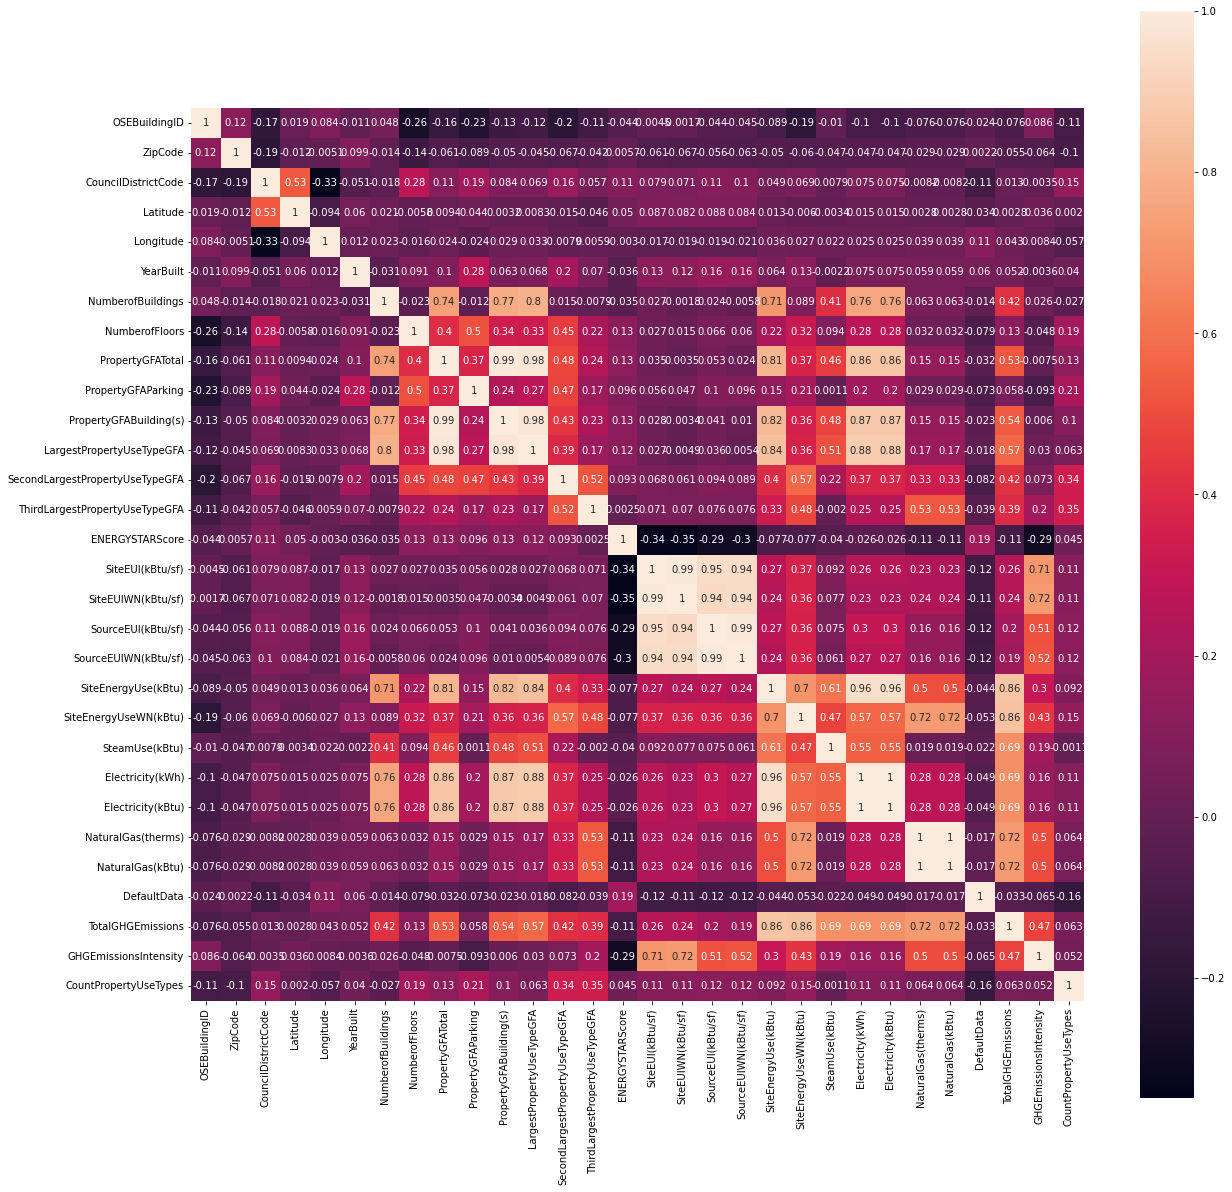

In [60]:
#Corrélation
#Regardons la corrélation de nos variables quantitatives par une heatmap
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(),annot = True,square=True);

## 4.6) Valeurs aberrantes

On va transformer nos données et les passer au log

In [61]:
#On convertit nos données de consommation d'énergie et d'émissions en log pour obtenir de plus grandes plages de données
df['log_conso'] = np.log10(df['SiteEnergyUse(kBtu)'])
df['log_emissions'] = np.log10(df['TotalGHGEmissions'])
df.head()

C:\Users\evaro\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\evaro\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\evaro\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                    Lack data                              0.0   
1                      Parking                          15064.0   
2                    Lack data                              0.0   
3                    Lack data                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                   Lack data                             0.0   
1                  Restaurant                          4622.0   
2                   Lack data                             0.0   
3                   Lack data                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0     

### 4.6.1) Outliers

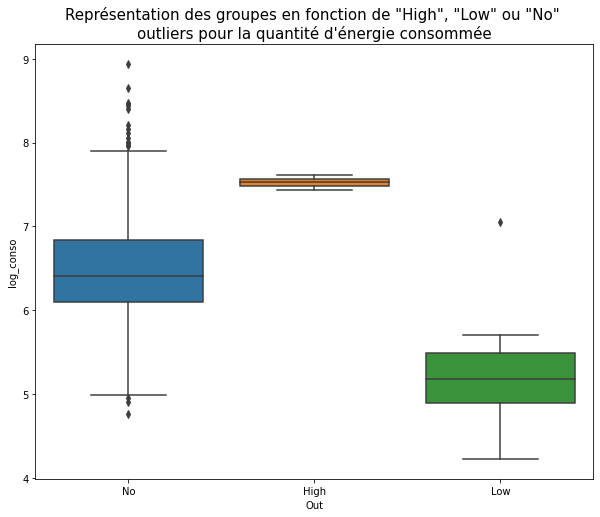

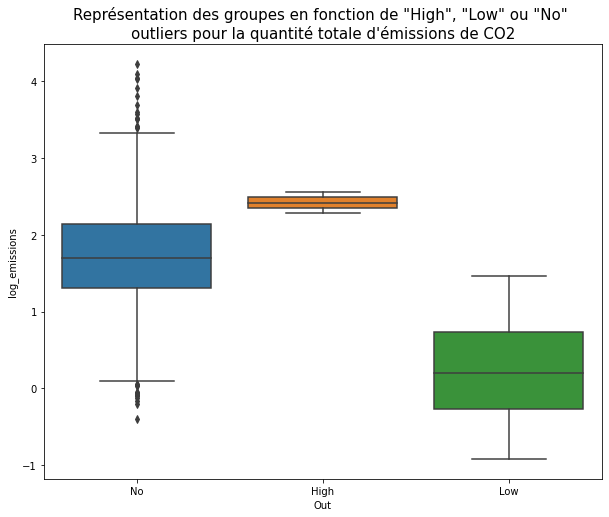

In [62]:
#On va effectuer nos boxplots 
#Pour les données de consommation d'énergie
plt.figure(figsize = (10, 8))
sns.boxplot(data = df, y = 'log_conso', x = 'Out')
plt.title('Représentation des groupes en fonction de "High", "Low" ou "No" \noutliers pour la quantité d\'énergie consommée', size = 15)

plt.show()

#Pour les données d'émissions de CO2
plt.figure(figsize = (10, 8))
sns.boxplot(data = df, y = 'log_emissions', x = 'Out')
plt.title('Représentation des groupes en fonction de "High", "Low" ou "No" \noutliers pour la quantité totale d\'émissions de CO2', size = 15)

plt.show()

On va supprimer les bâtiments ayant des low et high outliers, mais regarder également s'il est possible de trouver d'autres valeurs aberrantes dans notre dataset. 

In [63]:
df = df.drop(df[~df['Outlier'].isnull()].index)
df.shape

(1583, 46)

### 4.6.2) Valeurs négatives ou nulles

In [64]:
#On vérifie que l'on a pas de valeurs négatives ou de 0

print('Pour les données de consommation')
display(df.loc[(df['SiteEnergyUse(kBtu)'] == 0) |
      (df['SiteEnergyUse(kBtu)'] < 0), :])
print('-------------------------')
print('Pour les données d\'émissions de CO2')
display(df.loc[(df['TotalGHGEmissions'] == 0) |
      (df['TotalGHGEmissions'] < 0), :])

Pour les données de consommation


OSEBuildingID       BuildingType PrimaryPropertyType  \
304             435     NonResidential               Other   
1361          21616  SPS-District K-12         K-12 School   

                            PropertyName               Address  ZipCode  \
304   Washington State Convention Center           705 Pike St  98101.0   
1361            Olympic Hills Elementary  13018 20th Ave. N.E.  98125.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
304                     1978200105                    7     DOWNTOWN   
1361                    2126049041                    5        NORTH   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
304   47.61195 -122.33167       1990                1.0               6   
1361  47.72369 -122.30676       1954                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
304            1400000                   0                 1400000   
1361             42292                   0                   42292   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
304   Convention Center, Parking      Convention Center   
1361                 K-12 School            K-12 School   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
304                   1072000.0                      Parking   
1361                    43188.0                    Lack data   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
304                          686750.0                   Lack data   
1361                              0.0                   Lack data   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
304                              0.0              NaN               0.0   
1361                             0.0            100.0               0.0   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
304                  0.0                 0.0                   0.0   
1361                 0.0                 0.0                   0.0   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
304                   0.0                    0.0             0.0   
1361                  0.0                    0.0             0.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
304                0.0                0.0                 0.0   
1361               0.0                0.0                 0.0   

      NaturalGas(kBtu)  DefaultData              ComplianceStatus Outlier  \
304                0.0        False                 Non-Compliant     NaN   
1361               0.0         True  Error - Correct Default Data     NaN   

      TotalGHGEmissions  GHGEmissionsIntensity Out  CountPropertyUseTypes  \
304                 0.0                    0.0  No                    2.0   
1361                0.0                    0.0  No                    1.0   

     Error Buildings  log_conso  log_emissions  
304         No Error       -inf           -inf  
1361        No Error       -inf           -inf

-------------------------
Pour les données d'émissions de CO2


OSEBuildingID       BuildingType          PrimaryPropertyType  \
304             435     NonResidential                        Other   
513             700     NonResidential  Supermarket / Grocery Store   
1361          21616  SPS-District K-12                  K-12 School   
3206          49784     NonResidential  Small- and Mid-Sized Office   

                            PropertyName                Address  ZipCode  \
304   Washington State Convention Center            705 Pike St  98101.0   
513            IUC- Whole Foods Interbay  2001 15th Avenue West  98119.0   
1361            Olympic Hills Elementary   13018 20th Ave. N.E.  98125.0   
3206                      Bullitt Center    1501 E. Madison St.  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
304                     1978200105                    7   
513                     7666201460                    7   
1361                    2126049041                    5   
3206                    7234600195                    3   

               Neighborhood  Latitude  Longitude  YearBuilt  \
304                DOWNTOWN  47.61195 -122.33167       1990   
513   MAGNOLIA / QUEEN ANNE  47.63718 -122.37734       2008   
1361                  NORTH  47.72369 -122.30676       1954   
3206                CENTRAL  47.61432 -122.31257       2013   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
304                 1.0               6           1400000                   0   
513                 1.0               1             57176                   0   
1361                1.0               1             42292                   0   
3206                1.0               6             52000                   0   

      PropertyGFABuilding(s)  \
304                  1400000   
513                    57176   
1361                   42292   
3206                   52000   

                              ListOfAllPropertyUseTypes  \
304                          Convention Center, Parking   
513   Personal Services (Health/Beauty, Dry Cleaning...   
1361                                        K-12 School   
3206                                             Office   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  \
304           Convention Center                  1072000.0   
513   Supermarket/Grocery Store                    39500.0   
1361                K-12 School                    43188.0   
3206                     Office                    48159.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
304                       Parking                         686750.0   
513                  Retail Store                          15000.0   
1361                    Lack data                              0.0   
3206                    Lack data                              0.0   

                            ThirdLargestPropertyUseType  \
304                                           Lack data   
513   Personal Services (Health/Beauty, Dry Cleaning...   
1361                                          Lack data   
3206                                          Lack data   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
304                              0.0              NaN          0.000000   
513                           5500.0             31.0        208.800003   
1361                             0.0            100.0          0.000000   
3206                             0.0            100.0          7.100000   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
304             0.000000                 0.0                   0.0   
513           214.100006                 0.0                   0.0   
1361            0.000000                 0.0                   0.0   
3206            5.000000                 2.0                  -2.1   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
304          0.000000e+00           0.000

On retrouve deux bâtiments en commun à nos deux variables cibles, on va supprimer ces 4 bâtiments. On observe que certains de ces bâtiments sont considérés comme "Non-Compliant". 

In [65]:
#Suppression des valeurs nulles et négatives
df = df.drop(df[(df['SiteEnergyUse(kBtu)'] == 0) |
           (df['SiteEnergyUse(kBtu)'] < 0)].index)
df = df.drop(df[(df['TotalGHGEmissions'] == 0) |
               (df['TotalGHGEmissions'] < 0)].index)
df.shape

(1579, 46)

### 4.6.3) Non-Compliant 

In [66]:
#La colonne "ComplianceStatus" nous renseigne sur la conformité du bâtiment.
#On va se baser dessus pour ne garder que les données dites comme "conformes" et les données corrigées "DefaultData = true"

df = df.loc[(df['ComplianceStatus'] == 'Compliant') | 
                (df['ComplianceStatus'] == 'Error - Correct Default Data') & 
                (df['DefaultData'] == True), :]
display(df.head())
df.shape #Nouvelles dimensions de notre df

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                    Lack data                              0.0   
1                      Parking                          15064.0   
2                    Lack data                              0.0   
3                    Lack data                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                   Lack data                             0.0   
1                  Restaurant                          4622.0   
2                   Lack data                             0.0   
3                   Lack data                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0     

(1579, 46)

### 4.6.4) Analyses univariées
### a) Consommation d'énergie et émissions de CO2

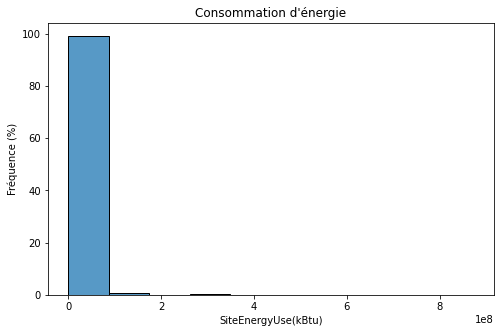

In [67]:
#Histogramme des données de consommation d'énergie
plt.figure(figsize = (8,5))
sns.histplot(data=df, x='SiteEnergyUse(kBtu)', stat='percent', bins=10)
plt.title('Consommation d\'énergie')
plt.xlabel('SiteEnergyUse(kBtu)')
plt.ylabel('Fréquence (%)')

plt.show()

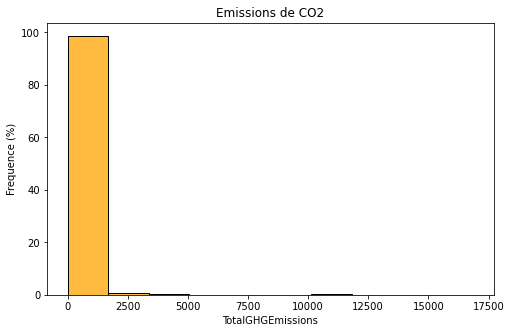

In [68]:
#Histogramme des données d'émissions de CO2
plt.figure(figsize = (8,5))
sns.histplot(data=df, x='TotalGHGEmissions', stat='percent', bins=10, color = 'Orange')
plt.title('Emissions de CO2')
plt.xlabel('TotalGHGEmissions')
plt.ylabel('Frequence (%)')

plt.show()

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\evaro\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


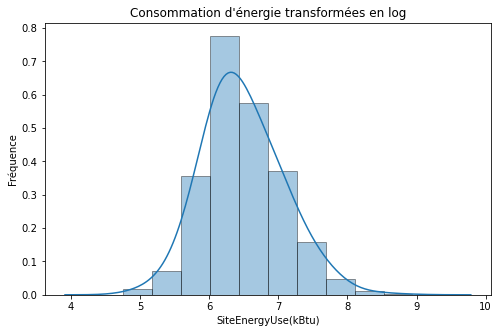

In [69]:
#Histogramme des données de consommation d'énergie transformées en log

plt.figure(figsize = (8,5))
sns.distplot(df['log_conso'], bins=10, kde_kws=dict(bw=0.5), hist_kws= dict(edgecolor="k"))
plt.title('Consommation d\'énergie transformées en log')
plt.xlabel('SiteEnergyUse(kBtu)')
plt.ylabel('Fréquence')
plt.show()

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\evaro\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


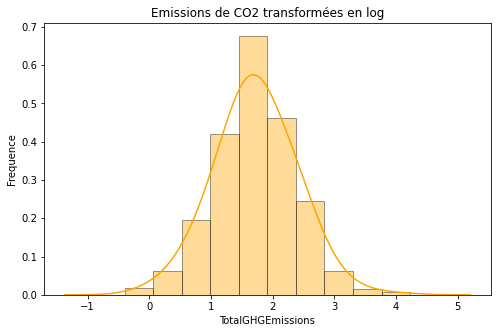

In [70]:
#Histogramme des données d'émissions de CO2 transformées en log
plt.figure(figsize = (8,5))
sns.distplot(df['log_emissions'], bins=10, color = 'orange',  kde_kws=dict(bw=0.5), hist_kws= dict(edgecolor="k"))
plt.title('Emissions de CO2 transformées en log')
plt.xlabel('TotalGHGEmissions')
plt.ylabel('Frequence')

plt.show()

### b) Structure des bâtiments

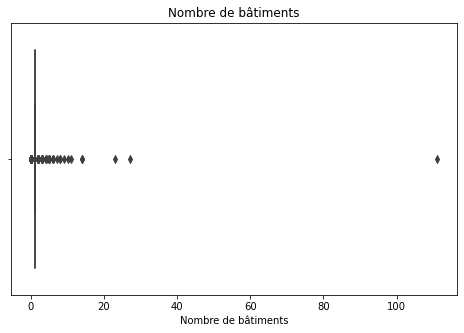

In [71]:
#Nombre de bâtiments
plt.figure(figsize = (8,5))
sns.boxplot(data=df, x='NumberofBuildings')
plt.title('Nombre de bâtiments')
plt.xlabel('Nombre de bâtiments')

plt.show()

In [72]:
#Regardons les valeurs aberrantes pour le nombre de bâtiments
display(df.sort_values('NumberofBuildings', ascending = False).head())
display(df.sort_values('NumberofBuildings', ascending = True).head())

OSEBuildingID BuildingType PrimaryPropertyType  \
3274          49967       Campus          University   
105             172       Campus          University   
1862          23622       Campus               Other   
2325          25251       Campus          University   
162             261       Campus        Large Office   

                                   PropertyName                     Address  \
3274  University of Washington - Seattle Campus   NE 45th St & Brooklyn Ave   
105                            SSCC MAIN CAMPUS            6000 16th Ave SW   
1862                  FT C15 Fishermen's Center  1900 West Nickerson Street   
2325                    5th Avenue Master Meter             3307 3rd Ave. W   
162                                  South Park              1420 S Trenton   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
3274  98105.0                    1625049001                    4   
105   98106.0                    6171900005                    1   
1862  98119.0                    7666200105                    7   
2325  98119.0                    8900000555                    7   
162   98108.0                    7883608601                    1   

               Neighborhood  Latitude  Longitude  YearBuilt  \
3274              NORTHEAST  47.65644 -122.31041       1900   
105                DELRIDGE  47.54700 -122.35307       1970   
1862  MAGNOLIA / QUEEN ANNE  47.65561 -122.38063       1955   
2325  MAGNOLIA / QUEEN ANNE  47.65019 -122.36173       1945   
162        GREATER DUWAMISH  47.52429 -122.31234       1980   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3274              111.0               0           9320156                   0   
105                27.0               2            441071                   0   
1862               23.0               1            260241                   0   
2325               14.0               2            537000                   0   
162                14.0               2            334368               31874   

      PropertyGFABuilding(s)  \
3274                 9320156   
105                   441071   
1862                  260241   
2325                  537000   
162                   302494   

                              ListOfAllPropertyUseTypes  \
3274                                 College/University   
105                                  College/University   
1862                                              Other   
2325                                 College/University   
162   Laboratory, Non-Refrigerated Warehouse, Office...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3274     College/University                  9320156.0   
105      College/University                   483000.0   
1862                  Other                   260241.0   
2325     College/University                   533826.0   
162                  Office                   240984.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3274                    Lack data                              0.0   
105                     Lack data                              0.0   
1862                    Lack data                              0.0   
2325                    Lack data                              0.0   
162                    Laboratory                          72963.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3274                   Lack data                             0.0   
105                    Lack data                             0.0   
1862                   Lack data                             0.0   
2325                   Lack data                             0.0   
162              Other - Utility                         16766.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
3274              NaN         93.800003            0.000000   
105               NaN         79.300003           85.199997   
186

OSEBuildingID    BuildingType          PrimaryPropertyType  \
2382          25461  NonResidential                   Restaurant   
2441          25661  NonResidential  Small- and Mid-Sized Office   
365             517  NonResidential  Supermarket / Grocery Store   
201             322  NonResidential                 Large Office   
3259          49924  NonResidential  Small- and Mid-Sized Office   

                                   PropertyName               Address  \
2382  (ID25461) CHINA HARBOR RESTURANT & MARINA   2040 WESTLAKE AVE N   
2441                         Buttnick City Loan  206 1st Avenue South   
365                         Sam's Club #18-6687  13550 Aurora Ave. N.   
201       Cox Media Group Seattle KIRO TV (322)          2801 3rd Ave   
3259                     SCCC DISTRICT/ERICKSON      1500 HARVARD AVE   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
2382  98109.0                    4088803835                    7   LAKE UNION   
2441  98104.0                    5247800380                    7     DOWNTOWN   
365   98133.0                    1926049230                    5    NORTHWEST   
201   98121.0                    0656000005                    7     DOWNTOWN   
3259  98122.0                    7502500010                    3         EAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
2382  47.63734 -122.33988       1962                0.0               2   
2441  47.60071 -122.33377       1909                0.0               3   
365   47.72803 -122.34214       1984                0.0               1   
201   47.61757 -122.35122       1968                0.0               3   
3259  47.61438 -122.32174       1912                0.0               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
2382             34072                   0                   34072   
2441             47215                   0                   47215   
365             144776                   0                  144776   
201             100734               26731                   74003   
3259             64820                   0                   64820   

                     ListOfAllPropertyUseTypes      LargestPropertyUseType  \
2382                                Restaurant                  Restaurant   
2441                      Office, Retail Store                      Office   
365                 Wholesale Club/Supercenter  Wholesale Club/Supercenter   
201                                     Office                      Office   
3259  Movie Theater, Office, Vocational School                      Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
2382                    34072.0                    Lack data   
2441                    23659.0                 Retail Store   
365                    144776.0                    Lack data   
201                    100734.0                    Lack data   
3259                    37668.0                Movie Theater   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
2382                              0.0                   Lack data   
2441                          22376.0                   Lack data   
365                               0.0                   Lack data   
201                               0.0                   Lack data   
3259                          11500.0           Vocational School   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
2382                             0.0              NaN        193.300003   
2441                             0.0             58.0         45.500000   
365                              0.0             56.0         92.699997   
201                              0.0             20.0         97.199997   
3259                         10000.0              NaN         38.400002   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
2382     

Le bâtiment dont le nombre de bâtiments est le plus élevé (111) est un **campus** et également le bâtiment le plus consommateur d'énergie et ayant la plus grande surface. Cette donnée n'est donc pas nécessairement une erreur. 
Pour les bâtiments dont le nombre de bâtiments = 0, on les remplace par 1. 

In [73]:
df.loc[df['NumberofBuildings'] == 0, 'NumberofBuildings'] = 1

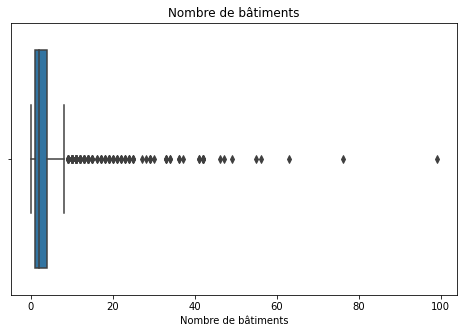

In [74]:
#Nombre d'étages
plt.figure(figsize = (8,5))
sns.boxplot(data=df, x='NumberofFloors')
plt.title('Nombre de bâtiments')
plt.xlabel('Nombre de bâtiments')

plt.show()

In [75]:
#Regardons les bâtiments dont le nombre d'étages est le plus élevé
display(df.sort_values('NumberofFloors', ascending = False).head())

OSEBuildingID        BuildingType PrimaryPropertyType  \
1359          21611      NonResidential    Worship Facility   
559             775      NonResidential        Large Office   
233             357  Nonresidential COS        Large Office   
292             422      NonResidential        Large Office   
271             399      NonResidential        Large Office   

                        PropertyName                   Address  ZipCode  \
1359  Seattle Chinese Baptist Church  5801 Beacon Avenue South  98108.0   
559           Columbia Center - 2015            701 5th Avenue  98104.0   
233   Seattle Municipal Tower (2030)          700 Fifth Avenue  98104.0   
292                 Two Union Square             601 Union St.  98101.0   
271                1201 Third Avenue              1201 3rd ave  98101.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
1359                    2124049098                    2  GREATER DUWAMISH   
559                     0942000640                    7          DOWNTOWN   
233                     0942000720                    3          DOWNTOWN   
292                     1976700125                    7          DOWNTOWN   
271                     1974700120                    7          DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
1359  47.55072 -122.30265       1977                1.0              99   
559   47.60454 -122.33072       1985                1.0              76   
233   47.60501 -122.32988       1990                1.0              63   
292   47.61043 -122.33206       1989                1.0              56   
271   47.60723 -122.33611       1988                1.0              55   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1359             21948                   0                   21948   
559            1952220              319400                 1632820   
233            1354987              159600                 1195387   
292            1605578              389860                 1215718   
271            1400000              285000                 1115000   

               ListOfAllPropertyUseTypes LargestPropertyUseType  \
1359                    Worship Facility       Worship Facility   
559                      Office, Parking                 Office   
233                      Office, Parking                 Office   
292               Office, Other, Parking                 Office   
271   Office, Other, Parking, Restaurant                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1359                    21948.0                    Lack data   
559                   1680937.0                      Parking   
233                   1191115.0                      Parking   
292                   1314475.0                      Parking   
271                    994116.0                      Parking   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1359                              0.0                   Lack data   
559                          319368.0                   Lack data   
233                          159599.0                       Other   
292                          389860.0                       Other   
271                          264481.0                       Other   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
1359                             0.0             80.0         14.900000   
559                              0.0             86.0         55.299999   
233                          18656.0             89.0         50.400002   
292                          30744.0             97.0         36.799999   
271                         133598.0             92.0         46.700001   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
1359           14.900000           46.599998             46.599998   
559            55.099998          167.300003   

### 4.6.5) Analyse bivariée

In [76]:
#On va regarder s'il existe des valeurs aberrantes pour nos variables cibles
#On trie notre variable "SiteEnergyUse(kBtu)"  et "TotalGHGEmissions"
display(df.sort_values('SiteEnergyUse(kBtu)', ascending = False).head())

display(df.sort_values('TotalGHGEmissions', ascending = False).head())

OSEBuildingID    BuildingType PrimaryPropertyType  \
3274          49967          Campus          University   
35               43          Campus  Mixed Use Property   
170             276  NonResidential            Hospital   
618             828  NonResidential            Hospital   
558             753  NonResidential               Other   

                                   PropertyName                    Address  \
3274  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
35                                 Plant 2 Site      7755 E MARGINAL WAY S   
170                   Harborview Medical Center               325 9th Ave.   
618                          Swedish First Hill               747 Broadway   
558                              WestinBuilding               2001 6th Ave   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
3274  98105.0                    1625049001                    4   
35    98108.0                    0022000005                    2   
170   98104.0                    8590900220                    3   
618   98122.0                    1978201096                    3   
558   98121.0                    0659000950                    7   

          Neighborhood   Latitude   Longitude  YearBuilt  NumberofBuildings  \
3274         NORTHEAST  47.656440 -122.310410       1900              111.0   
35    GREATER DUWAMISH  47.534930 -122.317880       1992                1.0   
170               EAST  47.603990 -122.323770       2000                9.0   
618               EAST  47.608951 -122.322402       1994                7.0   
558           DOWNTOWN  47.614380 -122.338710       1981                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3274               0           9320156                   0   
35                 3            494835                   0   
170                8           1158691                   0   
618               14           1765970                   0   
558               33            429405                   0   

      PropertyGFABuilding(s)  \
3274                 9320156   
35                    494835   
170                  1158691   
618                  1765970   
558                   429405   

                              ListOfAllPropertyUseTypes  \
3274                                 College/University   
35    Energy/Power Station, Laboratory, Manufacturin...   
170      Hospital (General Medical & Surgical), Parking   
618      Hospital (General Medical & Surgical), Parking   
558                                 Data Center, Office   

                     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3274                     College/University                  9320156.0   
35                                   Office                   757027.0   
170   Hospital (General Medical & Surgical)                  1350182.0   
618   Hospital (General Medical & Surgical)                  1639334.0   
558                             Data Center                   218997.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3274                    Lack data                              0.0   
35                     Laboratory                         639931.0   
170                       Parking                         387651.0   
618                       Parking                         441551.0   
558                        Office                         210409.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3274                   Lack data                             0.0   
35    Non-Refrigerated Warehouse                        459748.0   
170                    Lack data                             0.0   
618                    Lack data                             0.0   
558                    Lack data                             0.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
3274              NaN         93.800003

OSEBuildingID    BuildingType PrimaryPropertyType  \
35               43          Campus  Mixed Use Property   
618             828  NonResidential            Hospital   
3274          49967          Campus          University   
170             276  NonResidential            Hospital   
124             198  NonResidential            Hospital   

                                   PropertyName                    Address  \
35                                 Plant 2 Site      7755 E MARGINAL WAY S   
618                          Swedish First Hill               747 Broadway   
3274  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
170                   Harborview Medical Center               325 9th Ave.   
124     Seattle Children's Hospital Main Campus     4800 Sand Point Way NE   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
35    98108.0                    0022000005                    2   
618   98122.0                    1978201096                    3   
3274  98105.0                    1625049001                    4   
170   98104.0                    8590900220                    3   
124   98105.0                    2982800005                    4   

          Neighborhood   Latitude   Longitude  YearBuilt  NumberofBuildings  \
35    GREATER DUWAMISH  47.534930 -122.317880       1992                1.0   
618               EAST  47.608951 -122.322402       1994                7.0   
3274         NORTHEAST  47.656440 -122.310410       1900              111.0   
170               EAST  47.603990 -122.323770       2000                9.0   
124          NORTHEAST  47.662310 -122.281460       1953                6.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
35                 3            494835                   0   
618               14           1765970                   0   
3274               0           9320156                   0   
170                8           1158691                   0   
124               10            879000                   0   

      PropertyGFABuilding(s)  \
35                    494835   
618                  1765970   
3274                 9320156   
170                  1158691   
124                   879000   

                              ListOfAllPropertyUseTypes  \
35    Energy/Power Station, Laboratory, Manufacturin...   
618      Hospital (General Medical & Surgical), Parking   
3274                                 College/University   
170      Hospital (General Medical & Surgical), Parking   
124               Hospital (General Medical & Surgical)   

                     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
35                                   Office                   757027.0   
618   Hospital (General Medical & Surgical)                  1639334.0   
3274                     College/University                  9320156.0   
170   Hospital (General Medical & Surgical)                  1350182.0   
124   Hospital (General Medical & Surgical)                   879000.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
35                     Laboratory                         639931.0   
618                       Parking                         441551.0   
3274                    Lack data                              0.0   
170                       Parking                         387651.0   
124                     Lack data                              0.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
35    Non-Refrigerated Warehouse                        459748.0   
618                    Lack data                             0.0   
3274                   Lack data                             0.0   
170                    Lack data                             0.0   
124                    Lack data                             0.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
35                8.0        221.699997

C:\Users\evaro\AppData\Local\Temp\ipykernel_19604\3833534439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campus['surface/conso'] = campus['SiteEnergyUse(kBtu)']/campus['PropertyGFATotal']


OSEBuildingID BuildingType PrimaryPropertyType  \
35               43       Campus  Mixed Use Property   
954           20325       Campus         K-12 School   
1301          21482       Campus          Restaurant   
340             477       Campus               Other   
2325          25251       Campus          University   
162             261       Campus        Large Office   
1862          23622       Campus               Other   
195             315       Campus               Other   
1297          21478       Campus  Mixed Use Property   
289             419       Campus  Mixed Use Property   
661           19491       Campus               Other   
3274          49967       Campus          University   
1993          24086       Campus               Other   
105             172       Campus          University   
301             432       Campus  Mixed Use Property   
1732          23265       Campus               Other   
1692          23117       Campus               Other   
3022          27901       Campus         K-12 School   
1494          22062       Campus          University   
128             211       Campus          University   
2270          25069       Campus         K-12 School   
3252          49909       Campus          University   
2993          27799       Campus         K-12 School   

                                           PropertyName  \
35                                         Plant 2 Site   
954                             University Prep Academy   
1301                                      Corner Market   
340                         Weintraub/Hutchinson/Thomas   
2325                            5th Avenue Master Meter   
162                                          South Park   
1862                          FT C15 Fishermen's Center   
195   P66 Bell Harbor International Conference Cente...   
1297                                     Economy Market   
289                                         Main Market   
661                      Pacific Multiforms Inc- Campus   
3274          University of Washington - Seattle Campus   
1993  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...   
105                                    SSCC MAIN CAMPUS   
301                          Securities Building Campus   
1732                                      T102 1011 B/C   
1692                   Joint Training Facilities Campus   
3022                     The Bush School - Upper School   
1494                                      Entire Campus   
128                                    NSCC MAIN CAMPUS   
2270                                  O'Dea High School   
3252                    SSCC DUWAMISH GEORGETOWN CAMPUS   
2993            The Bush School - Lower / Middle School   

                         Address  ZipCode TaxParcelIdentificationNumber  \
35         7755 E MARGINAL WAY S  98108.0                    0022000005   
954             8000 25th Ave NE  98115.0                    1513800010   
1301             1501 1st Avenue  98101.0                    1976200230   
340          1100 Fairview Ave N  98109.0                    1984200455   
2325             3307 3rd Ave. W  98119.0                    8900000555   
162               1420 S Trenton  98108.0                    7883608601   
1862  1900 West Nickerson Street  98119.0                    7666200105   
195             2225 Alaskan Way  98125.0                    7666202325   
1297           1433 First Avenue  98101.0                    1976200105   
289              1501 Pike Place  98101.0                    1976200205   
661        6606 Urusla Pl. South  98155.0                    0005200056   
3274   NE 45th St & Brooklyn Ave  98105.0                    1625049001   
1993          1333 AIRPORT WAY S  98134.0                    7666203387   
105             6000 16th Ave SW  98106.0                    6171900005   
301            1904 Third Avenue  98101.0                    1977201315   
1732       1011 Klickitat Way SW  98134.0   

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


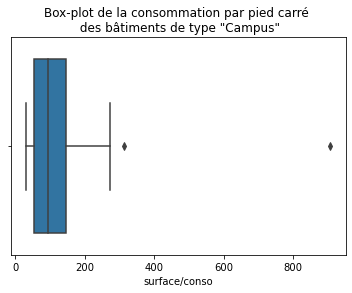

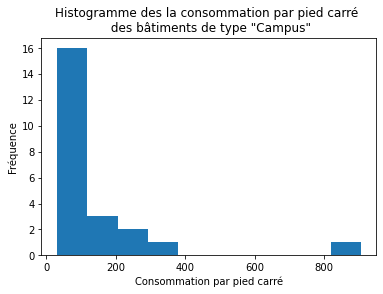

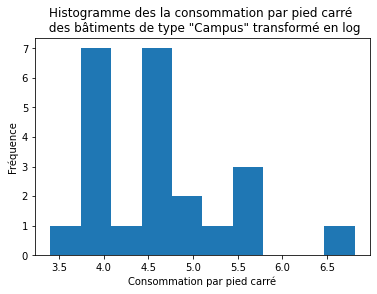

In [77]:
#Regardons les différents bâtiments du même type que celui dont la consommation est la plus élevée
campus = df.loc[df['BuildingType'] == 'Campus', :]
campus['surface/conso'] = campus['SiteEnergyUse(kBtu)']/campus['PropertyGFATotal']
display(campus.sort_values(by = 'surface/conso', ascending = False))
sns.boxplot(campus['surface/conso'])
plt.title('Box-plot de la consommation par pied carré \n des bâtiments de type "Campus"')
plt.show()

plt.hist(campus['surface/conso'])
plt.title('Histogramme des la consommation par pied carré \n des bâtiments de type "Campus"')
plt.xlabel('Consommation par pied carré')
plt.ylabel('Fréquence')
plt.show()

plt.title('Histogramme des la consommation par pied carré \n des bâtiments de type "Campus" transformé en log')
plt.xlabel('Consommation par pied carré')
plt.ylabel('Fréquence')
plt.hist(np.log(campus['surface/conso']), )
plt.show()

Le bâtiment ayant la plus forte consommation d'énergie est un **campus** dont la superficie totale est de 9 320 156 pieds carrés. 

Le bâtiment ayant la plus forte émission de CO2 est également un **campus** dont la superficie totale est de 494 835, mais un valeur de superficie douteuse car "PropertyGFATotal" de ce bâtiment < LargestPropertyUseTypeGFA. 

Si on rapporte la consommation par la surface totale (kBtu/pied carré), on n'observe plus que deux outliers sur notre boxplot concernant les campus, le bâtiment (campus) ayant la plus forte consommation d'énergie n'apparait finalement plus en tête de liste lors du calcul de la consommation par pied carré (93.7 kBtu/pied carré), contre 906 kBtu/pied carré pour le bâtiment ayant la plus forte consommation par pied carré. On peut observer que celui arrivant en tête, bien que son plus grand type d'utilisation soit "Office", il est également utilisé en tant que "Energy/Power Station" (Centre électrique), donc cette forte consommation peut-être liée. 

Néanmoins, la particularité de ces deux stations est la valeur de la variable "LargestPropertyUseTypeGFA" > "PropertyGFATotal" 

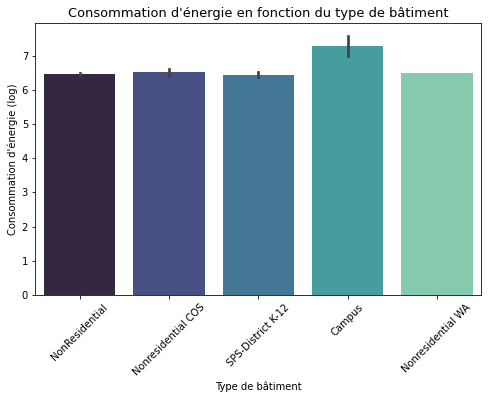

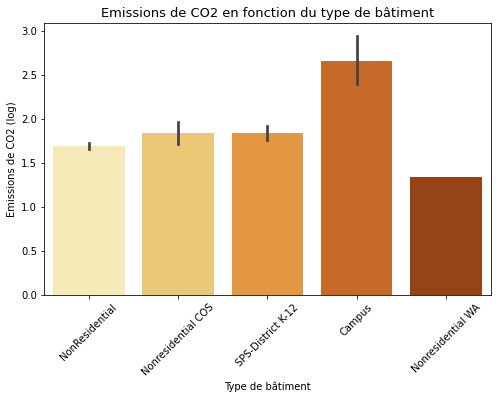

In [78]:
#Histogramme de la consommation d'énergie en fonction du "BuildingType"
plt.figure(figsize = (8, 5))
sns.barplot(data = df, x = 'BuildingType', y = 'log_conso', palette = 'mako')
plt.xticks(rotation = 45)
plt.title('Consommation d\'énergie en fonction du type de bâtiment', size = 13)
plt.xlabel('Type de bâtiment')
plt.ylabel('Consommation d\'énergie (log)')
plt.show()

#Histogramme de l'émission de CO2 en fonction du "BuildingType"
plt.figure(figsize = (8, 5))
sns.barplot(data = df, x = 'BuildingType', y = 'log_emissions', palette = 'YlOrBr')
plt.xticks(rotation = 45)
plt.title('Emissions de CO2 en fonction du type de bâtiment', size = 13)
plt.xlabel('Type de bâtiment')
plt.ylabel('Emissions de CO2 (log)')
plt.show()


On observe que les valeurs de consommation d'énergie et d'émissions de CO2 les plus élevées sont clairement pour les bâtiments de type "Campus"

On va regarder ce qu'on retrouve comme type de propriété principale pour ces campus

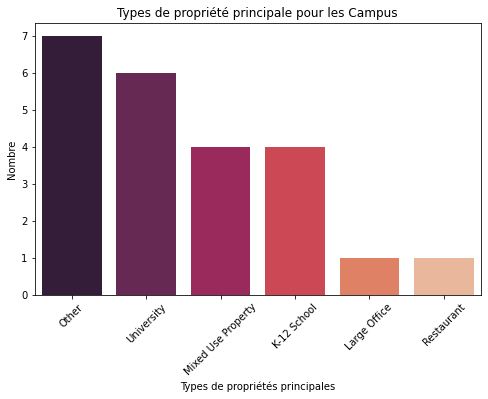

In [79]:
#Histogramme des différents types de propriétés principales appartenant aux Campus
campus_type = df.loc[df['BuildingType'] == 'Campus', :]
campus = pd.DataFrame(campus_type['PrimaryPropertyType'].value_counts()).reset_index()

plt.figure(figsize = (8,5))
sns.barplot(data = campus, x = 'index', y = 'PrimaryPropertyType', palette = 'rocket')
plt.title('Types de propriété principale pour les Campus')
plt.xlabel('Types de propriétés principales')
plt.ylabel('Nombre')
plt.xticks(rotation = 45)
plt.show()

In [80]:
from sklearn import linear_model

#On crée une fonction de régression linéaire
def reg_lin(nom_df, col_X, col_Y):
    X=np.array(nom_df[col_X])
    Y=np.array(nom_df[col_Y])
    
    X = X.reshape(-1,1)
    Y = Y.reshape(-1,1)
    
    corr= nom_df[col_Y].corr(df[col_X])
    
    plt.figure(figsize = (10,8))
    plt.scatter(nom_df[col_X], nom_df[col_Y], c = nom_df[col_Y], cmap = 'coolwarm',
           label = f'Correlation = {round(corr, 2)}')
    plt.legend(loc = 'lower right')
    plt.colorbar()

    lm = linear_model.LinearRegression()
    lm.fit(X, Y) 
    y_pred = lm.predict(X)
    plt.plot(X, y_pred, color = "k")
    plt.xlabel(col_X)
    plt.ylabel(col_Y)
    plt.title('Régression linéaire entre la variable ' + col_Y + ' \n et la variable ' + col_X)
    plt.show()

### 4.6.5.1. Consommation d'énergie
### a) Consommation d'énergie en fonction de la superficie de la propriété

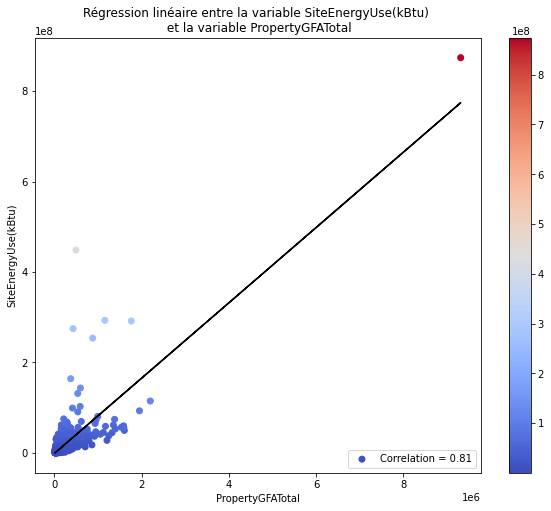

In [81]:
#On va tracer la régression linéaire entre la consommation d'énergie et la superficie totale. 
reg_lin(df, 'PropertyGFATotal', 'SiteEnergyUse(kBtu)')

La variable ayant la plus forte consommation d'énergie a également la plus forte superficie totale de bâtiment. Donc il est possible que cette valeur ne soit pas considérée comme aberrante, mais plutôt comme extrême étant donné la taille du bâtiment. 

De plus, une corrélation est observée entre la consommation d'énergie et la surface totale du bâtiment.

### b) Consommation d'énergie en fonction des différents types de propriété

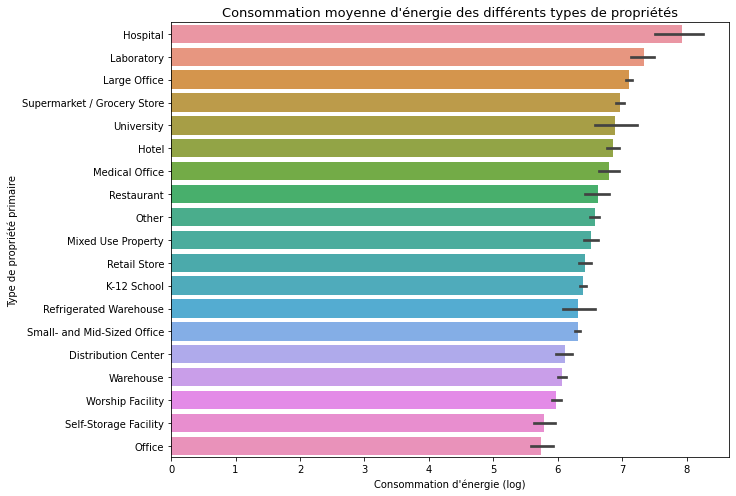

In [82]:
#On va regarder quels sont les différents types de batiments en fonction de leur consommation
df_agg = df.groupby(['PrimaryPropertyType'])['log_conso'].mean().reset_index().sort_values('log_conso', ascending = False)

plt.figure(figsize = (10, 8))
sns.barplot(data = df, x = 'log_conso', y = 'PrimaryPropertyType', 
           order=df_agg['PrimaryPropertyType'])
plt.title('Consommation moyenne d\'énergie des différents types de propriétés', size = 13)
plt.xlabel('Consommation d\'énergie (log)')
plt.ylabel('Type de propriété primaire')
plt.show()

Les types de bâtiment les plus consommateurs d'énergie correspondent à des **hopitaux**, **laboratoires** ou **grands bureaux**.

### c) Consommation d'énergie en fonction du quartier

In [83]:
#On observe des chaines de caractère minuscules pour les quartiers, on va les convertir en majuscules. 
df['Neighborhood'] = df['Neighborhood'].astype(str).str.upper()

In [84]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'LAKE UNION', 'GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'DELRIDGE', 'SOUTHWEST',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [85]:
#On va transformer 'Deldridge neighborhoods' en 'Deldridge'
df.loc[df['Neighborhood'] == 'DELRIDGE NEIGHBORHOODS', 'Neighborhood'] = 'DELRIDGE'

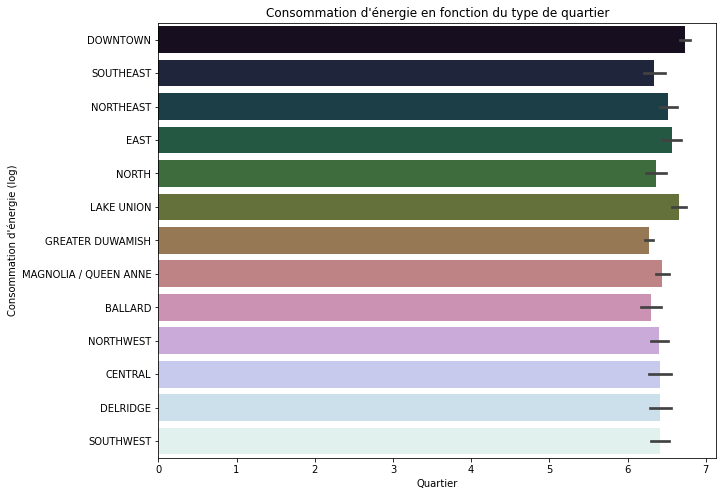

In [86]:
#on regarde la consommation d'énergie en fonction du type de quartier
plt.figure(figsize = (10,8))
sns.barplot(data = df, x = 'log_conso', y = 'Neighborhood', palette = 'cubehelix')
plt.title('Consommation d\'énergie en fonction du type de quartier')
plt.xlabel('Quartier')
plt.ylabel('Consommation d\'énergie (log)')
plt.show()

On n'observe pas de fortes différences de consommation selon les quartiers. 

### d) Consommation d'énergie en fonction du nombre de bâtiments

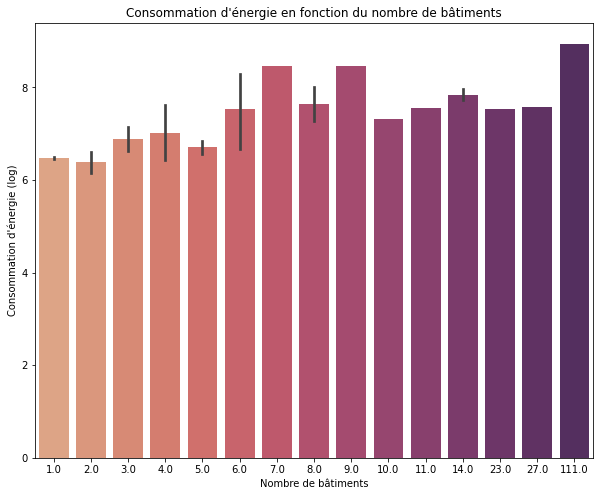

In [87]:
#on regarde la consommation d'énergie en fonction du nombre de bâtiments
plt.figure(figsize = (10,8))
sns.barplot(data = df, x = 'NumberofBuildings', y = 'log_conso', palette = 'flare')
plt.title('Consommation d\'énergie en fonction du nombre de bâtiments')
plt.xlabel('Nombre de bâtiments')
plt.ylabel('Consommation d\'énergie (log)')
plt.show()

On n'observe pas forcément de de lien flagrant entre le nombre de bâtiments et la consommation d'énergie. 

### e) Consommation en fonction du nombre d'étages

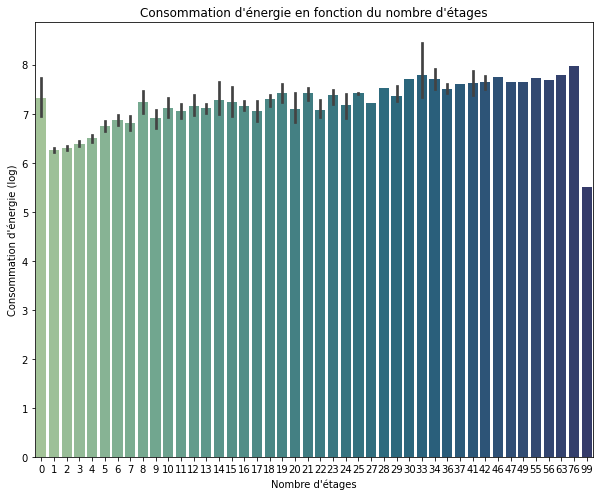

In [88]:
#on regarde la consommation d'énergie en fonction du nombre d'étages
plt.figure(figsize = (10,8))
sns.barplot(data = df, x = 'NumberofFloors', y = 'log_conso', palette = 'crest')
plt.title('Consommation d\'énergie en fonction du nombre d\'étages')
plt.xlabel('Nombre d\'étages')
plt.ylabel('Consommation d\'énergie (log)')
plt.show()

Le nombre d'étages semble avoir peu d'influence sur la consommation d'énergie

### 4.6.5.2. Emissions de CO2

### a) Emissions de CO2 en fonction de la superficie totale de la propriété

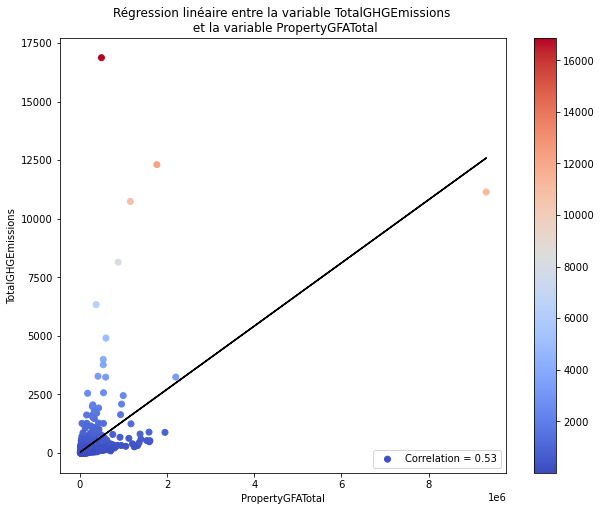

In [89]:
#On va tracer la régression linéaire entre la consommation d'énergie et la superficie totale. 
reg_lin(df, 'PropertyGFATotal', 'TotalGHGEmissions')

La corrélation entre les émissions de CO2 et la superficie totale est bien plus faible

### b) Emissions de CO2 en fonction des différents types de propriété

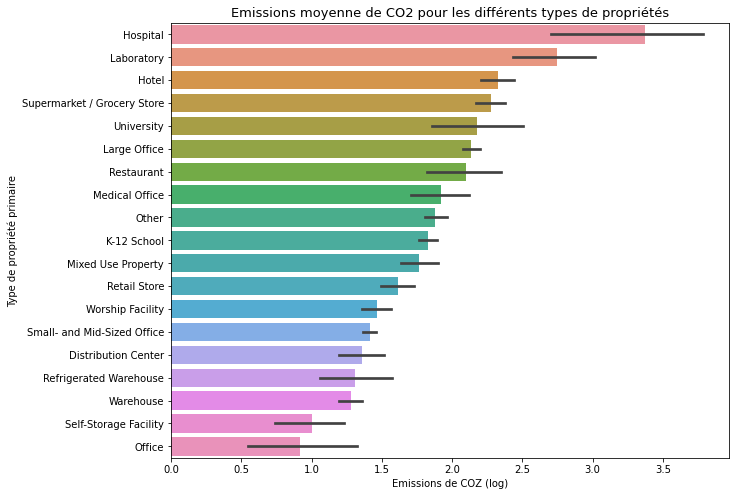

In [90]:
#On va regarder quels sont les différents types de batiments en fonction de leur consommation
df_agg = df.groupby(['PrimaryPropertyType'])['log_emissions'].mean().reset_index().sort_values('log_emissions', ascending = False)

plt.figure(figsize = (10, 8))
sns.barplot(data = df, x = 'log_emissions', y = 'PrimaryPropertyType', 
           order=df_agg['PrimaryPropertyType'])
plt.title('Emissions moyenne de CO2 pour les différents types de propriétés', size = 13)
plt.xlabel('Emissions de COZ (log)')
plt.ylabel('Type de propriété primaire')
plt.show()

On observe que les bâtiments qui émettent le plus de CO2 sont les hôpitaux, les laboratoires et hôtels. 

### c) Emissions du CO2 en fonction du type de quartier

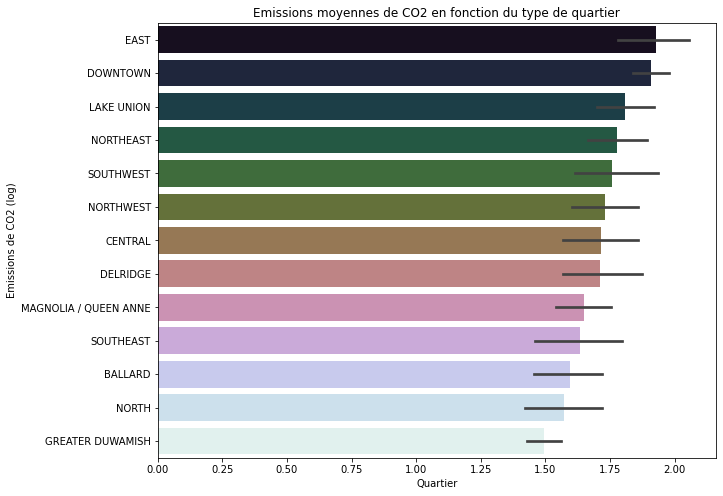

In [91]:
#on regarde la consommation d'énergie en fonction du type de quartier
df_agg = df.groupby(['Neighborhood'])['log_emissions'].mean().reset_index().sort_values('log_emissions', ascending = False)

plt.figure(figsize = (10,8))
sns.barplot(data = df, x = 'log_emissions', y = 'Neighborhood', palette = 'cubehelix', order = df_agg['Neighborhood'])
plt.title('Emissions moyennes de CO2 en fonction du type de quartier')
plt.xlabel('Quartier')
plt.ylabel('Emissions de CO2 (log)')
plt.show()

### d) Emissions de CO2 selon le nombre de bâtiments

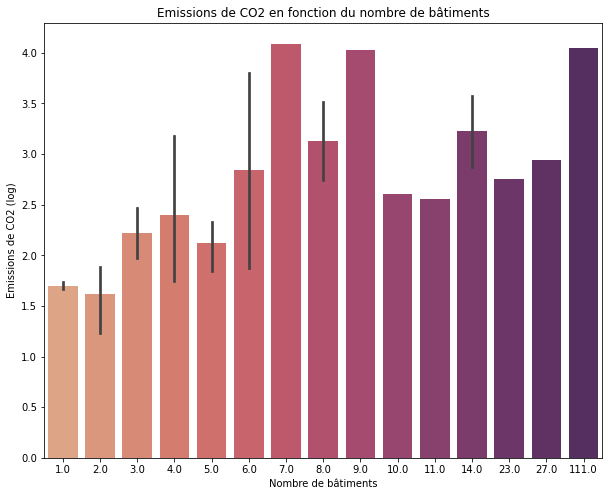

In [92]:
#on regarde la consommation d'énergie en fonction du nombre de bâtiments
plt.figure(figsize = (10,8))
sns.barplot(data = df, x = 'NumberofBuildings', y = 'log_emissions', palette = 'flare')
plt.title('Emissions de CO2 en fonction du nombre de bâtiments')
plt.xlabel('Nombre de bâtiments')
plt.ylabel('Emissions de CO2 (log)')
plt.show()

### e) Emissions de CO2 selon le nombre d'étages

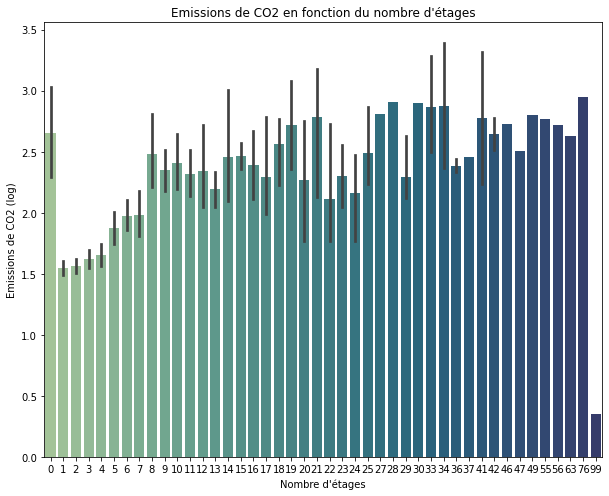

In [93]:
#on regarde la consommation d'énergie en fonction du nombre d'étages
plt.figure(figsize = (10,8))
sns.barplot(data = df, x = 'NumberofFloors', y = 'log_emissions', palette = 'crest')
plt.title('Emissions de CO2 en fonction du nombre d\'étages')
plt.xlabel('Nombre d\'étages')
plt.ylabel('Emissions de CO2 (log)')
plt.show()

Nous n'observons pas d'influence du nombre d'étages sur les émissions de CO2.

## 4.7) Feature engineering

### 4.7.1) Superficie totale 

Dans notre dataframe, observe des valeurs de PropertyGFATotal < LargestPropertyUseTypeGFA, on va regarder quelle est la proportion de ces "erreurs". 

In [94]:
#On crée une colonne contenant des booléens pour savoir si on a des "erreurs" 
df['surface_totale < surface_principale'] = df['PropertyGFATotal'] < df['LargestPropertyUseTypeGFA']

#On regarde en quelles proportions on en a. 
print(df['surface_totale < surface_principale'].value_counts(normalize = True).round(2))
print('------------------------')
print(df['surface_totale < surface_principale'].value_counts(normalize = True).round(2).iloc[1]*100, '% des données ont des valeurs de superficie totale inférieures à la surface de la plus grande partie de propriété utilisée.')
print('Cela concerne', df.loc[df['surface_totale < surface_principale'] == True, :].shape[0], 'bâtiments.')

False    0.88
True     0.12
Name: surface_totale < surface_principale, dtype: float64
------------------------
12.0 % des données ont des valeurs de superficie totale inférieures à la surface de la plus grande partie de propriété utilisée.
Cela concerne 196 bâtiments.


In [95]:
#On regarde quels sont le type d'utilisation le plus important pour ces batiments contenant des "erreurs". 
df_surfaces_error = df.loc[df['surface_totale < surface_principale'] == True, :]
df_surfaces_error['LargestPropertyUseType'].value_counts(normalize = True).round(2)

K-12 School                                        0.19
Office                                             0.14
Non-Refrigerated Warehouse                         0.09
Other                                              0.07
Retail Store                                       0.07
Worship Facility                                   0.06
Supermarket/Grocery Store                          0.05
Hotel                                              0.04
Distribution Center                                0.04
Hospital (General Medical & Surgical)              0.03
College/University                                 0.03
Parking                                            0.03
Other - Recreation                                 0.03
Self-Storage Facility                              0.02
Medical Office                                     0.02
Laboratory                                         0.02
Other - Entertainment/Public Assembly              0.01
Refrigerated Warehouse                          

On va supprimer ces données.

In [96]:
#Suppression des données dont la surface totale < surface principale
df = df.drop(df[df['surface_totale < surface_principale'] == True].index)

L'idée est de créer une nouvelle variable calculant la surface totale en faisant la somme de la surface la plus grande + la 2eme surface la plus grande + la 3ème surface la plus grande.

In [97]:
#Création de notre nouvelle variable "TotalGFA"
df['TotalGFA'] = df['LargestPropertyUseTypeGFA'] + df['SecondLargestPropertyUseTypeGFA'] + df['ThirdLargestPropertyUseTypeGFA']
df.head()

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                    Lack data                              0.0   
1                      Parking                          15064.0   
2                    Lack data                              0.0   
3                    Lack data                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                   Lack data                             0.0   
1                  Restaurant                          4622.0   
2                   Lack data                             0.0   
3                   Lack data                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0     

Cette nouvelle colonne nous permettra de donner le choix pour le choix des variables dans la modélisation en essayant entre la variable "PropertyGFATotal" et "TotalGFA".

On observe que pour la variable "TotalGFA", on a des valeurs nulles. On va donc transformer ces valeurs nulles en leur attribuant la valeur de la variable "PropertyGFATotal" correspondante. 

In [98]:
df.loc[df['TotalGFA'] == 0, 'TotalGFA'] = df.loc[df['TotalGFA'] == 0, 'PropertyGFATotal']

### 4.7.2) Age

In [99]:
#On va créer une variable "Age" en utilisant la variable "YearBuilt" afin d'avoir une connaissance de l'age de construction du
#bâtiment et/ou de sa rénovation complète par rapport à 2016
df['Age'] = 2016 - df.loc[:, 'YearBuilt']
df

OSEBuildingID        BuildingType PrimaryPropertyType  \
0                 1      NonResidential               Hotel   
1                 2      NonResidential               Hotel   
2                 3      NonResidential               Hotel   
3                 5      NonResidential               Hotel   
4                 8      NonResidential               Hotel   
...             ...                 ...                 ...   
3371          50222  Nonresidential COS              Office   
3372          50223  Nonresidential COS               Other   
3373          50224  Nonresidential COS               Other   
3374          50225  Nonresidential COS  Mixed Use Property   
3375          50226  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way  98101.0   
1                         Paramount Hotel   724 Pine street  98101.0   
2                 5673-The Westin Seattle   1900 5th Avenue  98101.0   
3                               HOTEL MAX    620 STEWART ST  98101.0   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  98121.0   
...                                   ...               ...      ...   
3371                Horticulture building  1600 S Dakota St  98108.0   
3372  International district/Chinatown CC     719 8th Ave S  98104.0   
3373                      Queen Anne Pool    1920 1st Ave W  98119.0   
3374          South Park Community Center    8319 8th Ave S  98108.0   
3375          Van Asselt Community Center  2820 S Myrtle St  98108.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
3371                    1624049080                    2   
3372                    3558300000                    2   
3373                    1794501150                    7   
3374                    7883603155                    1   
3375                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN  47.61220 -122.33799       1927   
1                  DOWNTOWN  47.61317 -122.33393       1996   
2                  DOWNTOWN  47.61393 -122.33810       1969   
3                  DOWNTOWN  47.61412 -122.33664       1926   
4                  DOWNTOWN  47.61375 -122.34047       1980   
...                     ...       ...        ...        ...   
3371       GREATER DUWAMISH  47.56722 -122.31154       1990   
3372               DOWNTOWN  47.59625 -122.32283       2004   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3374       GREATER DUWAMISH  47.52832 -122.32431       1989   
3375       GREATER DUWAMISH  47.53939 -122.29536       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
3371                1.0               1             12294                   0   
3372                1.0               1             16000                   0   
3373                1.0               1             13157                   0   
3374                1.0               1             14101                   0   
3375                1.0    

### 4.7.3) Consommation/superficie et émissions/superficie

In [100]:
#10 bâtiments les plus consommateurs d'énergie
df_conso_10 = df.sort_values(by = 'SiteEnergyUse(kBtu)', ascending = False).head(10)
display(df_conso_10)

#10 bâtiments émettant le plus de CO2
df_emissions_10 = df.sort_values(by = 'TotalGHGEmissions', ascending = False).head(10)
display(df_emissions_10)

OSEBuildingID    BuildingType PrimaryPropertyType  \
3274          49967          Campus          University   
618             828  NonResidential            Hospital   
558             753  NonResidential               Other   
124             198  NonResidential            Hospital   
340             477          Campus               Other   
1494          22062          Campus          University   
1690          23113  NonResidential      Medical Office   
559             775  NonResidential        Large Office   
2325          25251          Campus          University   
49               63  NonResidential               Hotel   

                                   PropertyName                    Address  \
3274  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
618                          Swedish First Hill               747 Broadway   
558                              WestinBuilding               2001 6th Ave   
124     Seattle Children's Hospital Main Campus     4800 Sand Point Way NE   
340                 Weintraub/Hutchinson/Thomas        1100 Fairview Ave N   
1494                              Entire Campus            901 12th Avenue   
1690                             Central Campus           201 16th Ave. E.   
559                      Columbia Center - 2015             701 5th Avenue   
2325                    5th Avenue Master Meter            3307 3rd Ave. W   
49                       Sheraton Seattle Hotel            1400 6th Avenue   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
3274  98105.0                    1625049001                    4   
618   98122.0                    1978201096                    3   
558   98121.0                    0659000950                    7   
124   98105.0                    2982800005                    4   
340   98109.0                    1984200455                    3   
1494  98122.0                    2254500880                    3   
1690  98112.0                    3117000005                    3   
559   98104.0                    0942000640                    7   
2325  98119.0                    8900000555                    7   
49    98101.0                    1976700095                    7   

               Neighborhood   Latitude   Longitude  YearBuilt  \
3274              NORTHEAST  47.656440 -122.310410       1900   
618                    EAST  47.608951 -122.322402       1994   
558                DOWNTOWN  47.614380 -122.338710       1981   
124               NORTHEAST  47.662310 -122.281460       1953   
340              LAKE UNION  47.628550 -122.330350       1997   
1494                   EAST  47.610650 -122.317110       1939   
1690                   EAST  47.620140 -122.312280       1964   
559                DOWNTOWN  47.604540 -122.330720       1985   
2325  MAGNOLIA / QUEEN ANNE  47.650190 -122.361730       1945   
49                 DOWNTOWN  47.610870 -122.333390       1982   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3274              111.0               0           9320156                   0   
618                 7.0              14           1765970                   0   
558                 1.0              33            429405                   0   
124                 6.0              10            879000                   0   
340                 1.0               5            535947                   0   
1494                1.0               2           2200000                   0   
1690                1.0               3            591981                   0   
559                 1.0              76           1952220              319400   
2325               14.0               2            537000                   0   
49                  1.0              34            994212              146694   

      PropertyGFABuilding(s)  \
3274                 9320156   
618                  1765970   
558                   429405   
124         

OSEBuildingID    BuildingType PrimaryPropertyType  \
618             828  NonResidential            Hospital   
3274          49967          Campus          University   
124             198  NonResidential            Hospital   
340             477          Campus               Other   
2325          25251          Campus          University   
1494          22062          Campus          University   
1690          23113  NonResidential      Medical Office   
262             389  NonResidential               Hotel   
49               63  NonResidential               Hotel   
2                 3  NonResidential               Hotel   

                                   PropertyName                    Address  \
618                          Swedish First Hill               747 Broadway   
3274  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
124     Seattle Children's Hospital Main Campus     4800 Sand Point Way NE   
340                 Weintraub/Hutchinson/Thomas        1100 Fairview Ave N   
2325                    5th Avenue Master Meter            3307 3rd Ave. W   
1494                              Entire Campus            901 12th Avenue   
1690                             Central Campus           201 16th Ave. E.   
262                    Fairmont Olympic Seattle      411 University Street   
49                       Sheraton Seattle Hotel            1400 6th Avenue   
2                       5673-The Westin Seattle            1900 5th Avenue   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
618   98122.0                    1978201096                    3   
3274  98105.0                    1625049001                    4   
124   98105.0                    2982800005                    4   
340   98109.0                    1984200455                    3   
2325  98119.0                    8900000555                    7   
1494  98122.0                    2254500880                    3   
1690  98112.0                    3117000005                    3   
262   98101.0                    0002400003                    7   
49    98101.0                    1976700095                    7   
2     98101.0                    0659000475                    7   

               Neighborhood   Latitude   Longitude  YearBuilt  \
618                    EAST  47.608951 -122.322402       1994   
3274              NORTHEAST  47.656440 -122.310410       1900   
124               NORTHEAST  47.662310 -122.281460       1953   
340              LAKE UNION  47.628550 -122.330350       1997   
2325  MAGNOLIA / QUEEN ANNE  47.650190 -122.361730       1945   
1494                   EAST  47.610650 -122.317110       1939   
1690                   EAST  47.620140 -122.312280       1964   
262                DOWNTOWN  47.608040 -122.333910       1923   
49                 DOWNTOWN  47.610870 -122.333390       1982   
2                  DOWNTOWN  47.613930 -122.338100       1969   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
618                 7.0              14           1765970                   0   
3274              111.0               0           9320156                   0   
124                 6.0              10            879000                   0   
340                 1.0               5            535947                   0   
2325               14.0               2            537000                   0   
1494                1.0               2           2200000                   0   
1690                1.0               3            591981                   0   
262                 1.0              12            542305                   0   
49                  1.0              34            994212              146694   
2                   1.0              41            956110              196718   

      PropertyGFABuilding(s)  \
618                  1765970   
3274                 9320156   
124                   879000   
340         

On va regarder parmi les 10 bâtiments les plus consommateurs d'énergie et émettant le plus de CO2 pour voir quels sont ceux en commmun aux deux variables. 

In [101]:
#On regarde les bâtiments que l'on a en commun 
s1 = pd.merge(df_conso_10, df_emissions_10, how='inner', on=['OSEBuildingID'], indicator = False)
s1

OSEBuildingID  BuildingType_x PrimaryPropertyType_x  \
0          49967          Campus            University   
1            828  NonResidential              Hospital   
2            198  NonResidential              Hospital   
3            477          Campus                 Other   
4          22062          Campus            University   
5          23113  NonResidential        Medical Office   
6          25251          Campus            University   
7             63  NonResidential                 Hotel   

                              PropertyName_x                  Address_x  \
0  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
1                         Swedish First Hill               747 Broadway   
2    Seattle Children's Hospital Main Campus     4800 Sand Point Way NE   
3                Weintraub/Hutchinson/Thomas        1100 Fairview Ave N   
4                              Entire Campus            901 12th Avenue   
5                             Central Campus           201 16th Ave. E.   
6                    5th Avenue Master Meter            3307 3rd Ave. W   
7                     Sheraton Seattle Hotel            1400 6th Avenue   

   ZipCode_x TaxParcelIdentificationNumber_x  CouncilDistrictCode_x  \
0    98105.0                      1625049001                      4   
1    98122.0                      1978201096                      3   
2    98105.0                      2982800005                      4   
3    98109.0                      1984200455                      3   
4    98122.0                      2254500880                      3   
5    98112.0                      3117000005                      3   
6    98119.0                      8900000555                      7   
7    98101.0                      1976700095                      7   

          Neighborhood_x  Latitude_x  Longitude_x  YearBuilt_x  \
0              NORTHEAST   47.656440  -122.310410         1900   
1                   EAST   47.608951  -122.322402         1994   
2              NORTHEAST   47.662310  -122.281460         1953   
3             LAKE UNION   47.628550  -122.330350         1997   
4                   EAST   47.610650  -122.317110         1939   
5                   EAST   47.620140  -122.312280         1964   
6  MAGNOLIA / QUEEN ANNE   47.650190  -122.361730         1945   
7               DOWNTOWN   47.610870  -122.333390         1982   

   NumberofBuildings_x  NumberofFloors_x  PropertyGFATotal_x  \
0                111.0                 0             9320156   
1                  7.0                14             1765970   
2                  6.0                10              879000   
3                  1.0                 5              535947   
4                  1.0                 2             2200000   
5                  1.0                 3              591981   
6                 14.0                 2              537000   
7                  1.0                34              994212   

   PropertyGFAParking_x  PropertyGFABuilding(s)_x  \
0                     0                   9320156   
1                     0                   1765970   
2                     0                    879000   
3                     0                    535947   
4                     0                   2200000   
5                     0                    591981   
6                     0                    537000   
7                146694                    847518   

                         ListOfAllPropertyUseTypes_x  \
0                                 College/University   
1     Hospital (General Medical & Surgical), Parking   
2              Hospital (General Medical & Surgical)   
3                                     Other, Parking   
4                        College/University, Parking   
5  Medical Office, Other/Specialty Hospital, Outp...   
6                                 College/University   
7                      Hotel, Parking, Swimming Pool   

         

Sur les 10 bâtiments en tête de liste, 7 sont communs aux deux df.

On va rapporter la consommation d'énergie et les émissions de CO2 des bâtiments à leur surface totale.

In [102]:
#On va créer des variables de consommation/pied carré et émission/pied carré

df['conso/surface'] = df['SiteEnergyUse(kBtu)'] / df['TotalGFA']
df['emissions/surface'] = df['TotalGHGEmissions'] / df['TotalGFA']
df.head()

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                    Lack data                              0.0   
1                      Parking                          15064.0   
2                    Lack data                              0.0   
3                    Lack data                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                   Lack data                             0.0   
1                  Restaurant                          4622.0   
2                   Lack data                             0.0   
3                   Lack data                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0     

In [103]:
# Regardons quels sont les bâtiments donc la consommation/surface et émissions/surface sont les plus fortes
display(df.sort_values('conso/surface', ascending = False).head())
df.sort_values('emissions/surface', ascending = False).head()

OSEBuildingID    BuildingType          PrimaryPropertyType  \
240             365  NonResidential                        Other   
809           19900  NonResidential                   Laboratory   
558             753  NonResidential                        Other   
3171          49709  NonResidential                        Other   
601             803  NonResidential  Small- and Mid-Sized Office   

                          PropertyName                  Address  ZipCode  \
240               UW Tower Data Center     4333 BROOKLYN AVE NE  98185.0   
809                  3000/3018 Western        3018 Western Ave.  98121.0   
558                     WestinBuilding             2001 6th Ave  98121.0   
3171  Seattle ProCure Management, LLC.  1570 North 115th Street  98013.0   
601                    200 SW Michigan          200 SW Michigan  98106.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
240                     1142000290                    4    NORTHEAST   
809                     0695000090                    7     DOWNTOWN   
558                     0659000950                    7     DOWNTOWN   
3171                    3026049128                    5    NORTHWEST   
601                     5367202506                    1     DELRIDGE   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
240   47.66060 -122.31512       1969                1.0               5   
809   47.61763 -122.35507       1926                1.0               4   
558   47.61438 -122.33871       1981                1.0              33   
3171  47.71286 -122.33635       2012                1.0               2   
601   47.54103 -122.33766       1929                1.0               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
240              36000                   0                   36000   
809              49249                   0                   49249   
558             429405                   0                  429405   
3171             53575                   0                   53575   
601              85126                   0                   85126   

                ListOfAllPropertyUseTypes  \
240                           Data Center   
809                    Laboratory, Office   
558                   Data Center, Office   
3171  Urgent Care/Clinic/Other Outpatient   
601                                Office   

                   LargestPropertyUseType  LargestPropertyUseTypeGFA  \
240                           Data Center                    36000.0   
809                            Laboratory                    40584.0   
558                           Data Center                   218997.0   
3171  Urgent Care/Clinic/Other Outpatient                    53575.0   
601                                Office                    81526.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
240                     Lack data                              0.0   
809                        Office                           7165.0   
558                        Office                         210409.0   
3171                    Lack data                              0.0   
601                     Lack data                              0.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
240                    Lack data                             0.0   
809                    Lack data                             0.0   
558                    Lack data                             0.0   
3171                   Lack data                             0.0   
601                    Lack data                             0.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
240              96.0        834.400024          834.400024   
809               NaN        696.700012          693.099976   
558              98.0        639.700012          639.799988   
3171              NaN        593.599976          

OSEBuildingID        BuildingType PrimaryPropertyType  \
809           19900      NonResidential          Laboratory   
3373          50224  Nonresidential COS               Other   
3365          50208  Nonresidential COS               Other   
1817          23503      NonResidential          Restaurant   
1753          23310      NonResidential               Other   

                                    PropertyName             Address  ZipCode  \
809                            3000/3018 Western   3018 Western Ave.  98121.0   
3373                             Queen Anne Pool      1920 1st Ave W  98119.0   
3365                                Ballard Pool     1471 NW 67th St  98117.0   
1817            Salty's Waterfront Seafood Grill  1936 Harbor Ave SW  98126.0   
1753  Charles & Emma Frye Free Public Art Museum       704 Terry Ave  98104.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
809                     0695000090                    7   
3373                    1794501150                    7   
3365                    3050700005                    6   
1817                    7666706590                    1   
1753                    8590900585                    3   

               Neighborhood  Latitude  Longitude  YearBuilt  \
809                DOWNTOWN  47.61763 -122.35507       1926   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3365                BALLARD  47.67734 -122.37624       1972   
1817              SOUTHWEST  47.58654 -122.37644       1902   
1753                   EAST  47.60709 -122.32416       1951   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
809                 1.0               4             49249                   0   
3373                1.0               1             13157                   0   
3365                1.0               1             12769                   0   
1817                1.0               2             20398                   0   
1753                1.0               1             47699                   0   

      PropertyGFABuilding(s)  \
809                    49249   
3373                   13157   
3365                   12769   
1817                   20398   
1753                   47699   

                              ListOfAllPropertyUseTypes  \
809                                  Laboratory, Office   
3373  Fitness Center/Health Club/Gym, Other - Recrea...   
3365  Fitness Center/Health Club/Gym, Office, Other ...   
1817                                 Office, Restaurant   
1753                                    Museum, Parking   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
809              Laboratory                    40584.0   
3373     Other - Recreation                     7583.0   
3365     Other - Recreation                    10912.0   
1817             Restaurant                    19232.0   
1753                 Museum                    47000.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
809                           Office                           7165.0   
3373  Fitness Center/Health Club/Gym                           5574.0   
3365  Fitness Center/Health Club/Gym                           1670.0   
1817                          Office                           1166.0   
1753                         Parking                              0.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
809                    Lack data                             0.0   
3373               Swimming Pool                             0.0   
3365                      Office                           187.0   
1817                   Lack data                             0.0   
1753                   Lack data                             0.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
809               NaN        696.700012          693.099976   
3373              NaN        438.200012         

### 4.7.4) Types de bâtiments

In [104]:
df['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    267
Other                          205
Warehouse                      170
Large Office                   163
Mixed Use Property             103
K-12 School                     86
Retail Store                    76
Hotel                           67
Worship Facility                58
Distribution Center             45
Medical Office                  35
Supermarket / Grocery Store     30
Self-Storage Facility           24
University                      18
Restaurant                      12
Refrigerated Warehouse          10
Laboratory                       7
Hospital                         4
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [105]:
#On va créer une nouvelle variable avec de nouvelles catégories

conditionlist = [
    (df['PrimaryPropertyType'] == 'Small- and Mid-Sized Office') | (df['PrimaryPropertyType'] == 'Large Office') | 
    (df['PrimaryPropertyType'] == 'Office'), 
    (df['PrimaryPropertyType'] == 'Worship Facility'), 
    (df['PrimaryPropertyType'] == 'Restaurant'), 
    (df['PrimaryPropertyType'] == 'K-12 School'), 
    (df['PrimaryPropertyType'] == 'University'), 
    (df['PrimaryPropertyType'] == 'Laboratory'), 
    (df['PrimaryPropertyType'] == 'Supermarket / Grocery Store') | (df['PrimaryPropertyType'] == 'Retail Store'), 
    (df['PrimaryPropertyType'] == 'Hotel'), 
    (df['PrimaryPropertyType'] == 'Self-Storage Facility') | (df['PrimaryPropertyType'] == 'Warehouse') | 
    (df['PrimaryPropertyType'] == 'Distribution Center') | (df['PrimaryPropertyType'] == 'Refrigerated Warehouse'), 
    (df['PrimaryPropertyType'] == 'Hospital') | (df['PrimaryPropertyType'] == 'Medical Office'),
    (df['PrimaryPropertyType'] == 'Mixed Use Property'), 
    (df['PrimaryPropertyType'] == 'Other')
    
]

choicelist = ['Office', 'Worship Facility', 'Restaurant', 'K-12 School', 'University', 'Laboratory', 'Food Store', 'Hotel', 
             'Warehouse_Storage', 'Hospital_Medical Office', 'Mixed Use Property', 'Other']

df['PropertyType'] = np.select(conditionlist, choicelist, default = 'Not Specified')
display(df.head())

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                    Lack data                              0.0   
1                      Parking                          15064.0   
2                    Lack data                              0.0   
3                    Lack data                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                   Lack data                             0.0   
1                  Restaurant                          4622.0   
2                   Lack data                             0.0   
3                   Lack data                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0     

In [106]:
#Vérifions que l'on n'ai pas de données "Not Specified"
df.loc[df['PropertyType'] == 'Not Specified', :].shape[0]

0

### 4.7.5) Proportion énergies (vapeur, électricité gaz) sur énergie consommée totale

In [107]:
#Sélection des colonnes qui nous intéressent
df[['SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']]

SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)
0            7.226362e+06      2003882.00       3.946027e+06      1.276453e+06
1            8.387933e+06            0.00       3.242851e+06      5.145082e+06
2            7.258702e+07     21566554.00       4.952666e+07      1.493800e+06
3            6.794584e+06      2214446.25       2.768924e+06      1.811213e+06
4            1.417261e+07            0.00       5.368607e+06      8.803998e+06
...                   ...             ...                ...               ...
3371         8.497457e+05            0.00       5.242709e+05      3.254750e+05
3372         9.502762e+05            0.00       3.965461e+05      5.537300e+05
3373         5.765898e+06            0.00       1.792159e+06      3.973739e+06
3374         7.194712e+05            0.00       3.488702e+05      3.706010e+05
3375         1.152896e+06            0.00       4.325542e+05      7.203420e+05

[1383 rows x 4 columns]

In [108]:
#On va créer une colonne de la somme de ces différentes énergies
df['Sum_energies'] = df['SteamUse(kBtu)'] + df['Electricity(kBtu)'] + df['NaturalGas(kBtu)']

In [109]:
#On crée la colonne qui calcule la part de ces énergies par rapport à la consommation totale d'énergie
df['Taux_energy'] = round(df['Sum_energies'] * 100 / df['SiteEnergyUse(kBtu)'])
display(df.head())

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                    Lack data                              0.0   
1                      Parking                          15064.0   
2                    Lack data                              0.0   
3                    Lack data                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                   Lack data                             0.0   
1                  Restaurant                          4622.0   
2                   Lack data                             0.0   
3                   Lack data                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0     

In [110]:
#Calculons le taux de bâtiments dont la valeur est de 100%
taux_max = df.loc[df['Taux_energy'] == 100, :].shape[0] / df.shape[0] * 100
print(round(taux_max, 2), '% des bâtiments ont 100% des énergies (vapeur, gaz et électricité) qui correspondent à la valeur de la consommation totale.')

98.55 % des bâtiments ont 100% des énergies (vapeur, gaz et électricité) qui correspondent à la valeur de la consommation totale.


In [111]:
#On va regarder quels sont les bâtiments != 100 %
df.loc[df['Taux_energy'] != 100, :].sort_values('Taux_energy', ascending = False).head()

OSEBuildingID        BuildingType          PrimaryPropertyType  \
2441          25661      NonResidential  Small- and Mid-Sized Office   
563             757      NonResidential                 Large Office   
206             328      NonResidential                 Large Office   
3182          49725      NonResidential                        Other   
3270          49958  Nonresidential COS                        Other   

                                           PropertyName               Address  \
2441                                 Buttnick City Loan  206 1st Avenue South   
563             Market Place I & II-2003 Western Avenue   2003 Western Avenue   
206                                        1600 Seventh          1600 7th Ave   
3182  VM Seattle Hospital & Medical Center - Jones P...        1010 Spring St   
3270             First Hill Street Car Maintenance Shop         848 7th Ave S   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
2441  98104.0                    5247800380                    7   
563   98121.0                    1977200280                    7   
206   98191.0                    0659000165                    7   
3182  98101.0                    8590901075                    3   
3270  98124.0                    8592900285                    2   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
2441          DOWNTOWN  47.60071 -122.33377       1909                1.0   
563           DOWNTOWN  47.61051 -122.34439       1979                1.0   
206           DOWNTOWN  47.61316 -122.33430       1976                1.0   
3182              EAST  47.60989 -122.32659       2012                1.0   
3270  GREATER DUWAMISH  47.59523 -122.32334       2014                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
2441               3             47215                   0   
563                7            131143               87160   
206               33            791396                   0   
3182               7            267470                   0   
3270               1             20993                   0   

      PropertyGFABuilding(s)  \
2441                   47215   
563                    43983   
206                   791396   
3182                  267470   
3270                   20993   

                              ListOfAllPropertyUseTypes  \
2441                               Office, Retail Store   
563                                Office, Retail Store   
206   Lifestyle Center, Office, Other, Parking, Rest...   
3182       Hospital (General Medical & Surgical), Other   
3270    Repair Services (Vehicle, Shoe, Locksmith, etc)   

                               LargestPropertyUseType  \
2441                                           Office   
563                                            Office   
206                                            Office   
3182                                            Other   
3270  Repair Services (Vehicle, Shoe, Locksmith, etc)   

      LargestPropertyUseTypeGFA           SecondLargestPropertyUseType  \
2441                    23659.0                           Retail Store   
563                    120248.0                           Retail Store   
206                    622034.0                                Parking   
3182                   160482.0  Hospital (General Medical & Surgical)   
3270                    20983.0                              Lack data   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
2441                          22376.0                   Lack data   
563                           10853.0                   Lack data   
206                          132465.0                       Other   
3182                         106988.0                   Lack data   
3270                              0.0                   Lack data   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
2441           

In [112]:
#On va supprimer ces bâtiments dont "Taux_energy" != 100 %. 
df = df.drop(df[df['Taux_energy'] != 100].index)

### 4.7.6) Surface par étage

On va créer une variable qui calcule la surface d'un étage.

In [113]:
#On calcule la surface d'un étage pour les bâtiments dont NumberofFloors >= 1
#Pour les bâtiments n'ayant pas d'étage, on leur laisse la valeur de la surface de PropertyGFABuildings 
df['Surface/étage'] = df.apply(lambda x: x['PropertyGFABuilding(s)'] / x['NumberofFloors'] if x['NumberofFloors'] >= 1 else x['PropertyGFABuilding(s)'], axis = 1)

### 4.7.7) Surface par bâtiment

On crée une variable calculant la surface d'un bâtiment. 

In [114]:
#Calcul de la surface par bâtiment
df['Surface/batiment'] = df['PropertyGFABuilding(s)'] / df['NumberofBuildings']

### 4.7.8) Type d'énergie la plus utilisée

In [115]:
#On crée un colonne prenant la valeur de 1 (électricité), 2 (gaz naturel) ou 3 (vapeur) en fonction du type d'énergie la plus
#utilisée
for i, row in df.iterrows():
    energy_values = [row['Electricity(kBtu)'], row['NaturalGas(kBtu)'], row['SteamUse(kBtu)']]
    max_energy = max(energy_values)
    if max_energy == row['Electricity(kBtu)']:
        df.loc[i, 'Type_energie'] = 1
    elif max_energy == row['NaturalGas(kBtu)']:
        df.loc[i, 'Type_energie'] = 2
    elif max_energy == row['SteamUse(kBtu)']:
        df.loc[i, 'Type_energie'] = 3
display(df.head())

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                    Lack data                              0.0   
1                      Parking                          15064.0   
2                    Lack data                              0.0   
3                    Lack data                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                   Lack data                             0.0   
1                  Restaurant                          4622.0   
2                   Lack data                             0.0   
3                   Lack data                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0     

## 4.8) Analyse multivariée

In [116]:
#On regarde les valeurs uniques de notre nouvelle variable "PropertyType"
df['PropertyType'].value_counts()

Office                     427
Warehouse_Storage          249
Other                      196
Food Store                 105
Mixed Use Property         102
K-12 School                 86
Hotel                       67
Worship Facility            58
Hospital_Medical Office     39
University                  15
Restaurant                  12
Laboratory                   7
Name: PropertyType, dtype: int64

In [117]:
#Analyse multivariée pour voir quelles sont les variables qui influencent le plus nos nouveaux scores calculés
from matplotlib.collections import LineCollection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [118]:
data_ACP = df.copy()

variables = ['OSEBuildingID', 'PropertyType', 'Age', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 
             'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'conso/surface', 'emissions/surface']
data_ACP = data_ACP[variables].set_index('OSEBuildingID')
data_ACP

PropertyType  Age  PropertyGFATotal  \
OSEBuildingID                                              
1                           Hotel   89             88434   
2                           Hotel   20            103566   
3                           Hotel   47            956110   
5                           Hotel   90             61320   
8                           Hotel   36            175580   
...                           ...  ...               ...   
50222                      Office   26             12294   
50223                       Other   12             16000   
50224                       Other   42             13157   
50225          Mixed Use Property   27             14101   
50226          Mixed Use Property   78             18258   

               LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                                               
1                                88434.0                              0.0   
2                                83880.0                          15064.0   
3                               756493.0                              0.0   
5                                61320.0                              0.0   
8                               123445.0                          68009.0   
...                                  ...                              ...   
50222                            12294.0                              0.0   
50223                            16000.0                              0.0   
50224                             7583.0                           5574.0   
50225                             6601.0                           6501.0   
50226                             8271.0                           8000.0   

               ThirdLargestPropertyUseTypeGFA  conso/surface  \
OSEBuildingID                                                  
1                                         0.0      81.714753   
2                                      4622.0      80.991184   
3                                         0.0      95.952010   
5                                         0.0     110.805349   
8                                         0.0      74.026168   
...                                       ...            ...   
50222                                     0.0      69.118732   
50223                                     0.0      59.392262   
50224                                     0.0     438.238048   
50225                                   484.0      52.956808   
50226                                  1108.0      66.338469   

               emissions/surface  
OSEBuildingID                     
1                       0.002827  
2                       0.002857  
3                       0.002762  
5                       0.004671  
8                       0.002638  
...                          ...  
50222                   0.001703  
50223                   0.002011  
50224                   0.016990  
50225                   0.001627  
50226                   0.002375  

[1363 rows x 8 columns]

In [119]:
data[data.isin([np.nan, np.inf, -np.inf]).any(1)]

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3371      NaN                    1624049080                    2   
3372      NaN                    3558300000                    2   
3373      NaN                    1794501150                    7   
3374      NaN                    7883603155                    1   
3375      NaN                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN  47.61220 -122.33799       1927   
1                  DOWNTOWN  47.61317 -122.33393       1996   
2                  DOWNTOWN  47.61393 -122.33810       1969   
3                  DOWNTOWN  47.61412 -122.33664       1926   
4                  DOWNTOWN  47.61375 -122.34047       1980   
...                     ...       ...        ...        ...   
3371       GREATER DUWAMISH  47.56722 -122.31154       1990   
3372               DOWNTOWN  47.59625 -122.32283       2004   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3374       GREATER DUWAMISH  47.52832 -122.32431       1989   
3375       GREATER DUWAMISH  47.53939 -122.29536       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
3371                1.0               1            

In [120]:
import sklearn
from sklearn.preprocessing import StandardScaler

# data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)] #Sélection uniquement des valeurs ne contenant pas de (inf). 
data = data_ACP[data_ACP.columns.difference(['PropertyType'])]

#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(data)
print(Z)

print(np.mean(Z,axis=0))
print(np.std(Z,axis=0,ddof=0))

[[ 1.03518669e+00 -6.66380854e-03 -1.33935488e-01 ... -2.14782419e-01
   1.95337197e-01  5.96339576e-01]
 [-1.04935002e+00 -3.53892090e-02 -5.84941431e-02 ...  9.44549255e-02
   1.85006756e-01  6.10466844e-01]
 [-2.33661744e-01  4.20727170e+00  4.19190672e+00 ... -2.14782419e-01
   3.98603420e-01  5.65744840e-01]
 ...
 [-3.84715128e-01 -5.16650052e-01 -5.09232747e-01 ... -2.14782419e-01
   5.28544302e+00  7.26866220e+00]
 [-8.37875283e-01 -5.22844242e-01 -5.04526387e-01 ... -1.82400144e-01
  -2.15241830e-01  3.13419239e-02]
 [ 7.02869242e-01 -5.12310334e-01 -4.83801455e-01 ... -1.40651096e-01
  -2.41909983e-02  3.83388116e-01]]
[ 4.69177155e-17 -2.08523180e-17  6.25569540e-17  0.00000000e+00
 -4.17046360e-17 -2.99752071e-17 -9.90485105e-17]
[1. 1. 1. 1. 1. 1. 1.]


In [121]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')

#affichage des paramètres
print(acp)

#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
n = acp.n_components_
print(n)

#variance expliquée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

#proportion de variance expliquée
print(acp.explained_variance_ratio_)
p = acp.explained_variance_ratio_


PCA(svd_solver='full')
7
[2.59007241 1.55618483 0.81618531 0.6298292  0.24912732 0.14952645
 0.01347978]
[0.43136202 0.25917385 0.13593108 0.10489452 0.04149076 0.02490279
 0.00224498]


In [122]:
np.cumsum(acp.explained_variance_ratio_)

array([0.43136202, 0.69053587, 0.82646695, 0.93136147, 0.97285223,
       0.99775502, 1.        ])

In [123]:
acp.explained_variance_ratio_

array([0.43136202, 0.25917385, 0.13593108, 0.10489452, 0.04149076,
       0.02490279, 0.00224498])

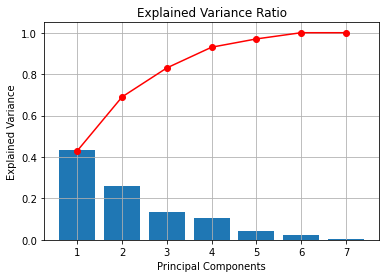

In [124]:
#cumul de variance expliquée
plt.grid()
plt.bar(range(1,n+1), acp.explained_variance_ratio_)
plt.plot(range(1,n+1), np.cumsum(acp.explained_variance_ratio_).round(2), c = 'red', marker = 'o')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
# plt.xticks(range(0,n),
#            ["1st comp", "2nd comp", "3rd comp"], rotation=60)
plt.title('Explained Variance Ratio')
plt.show(block = False)

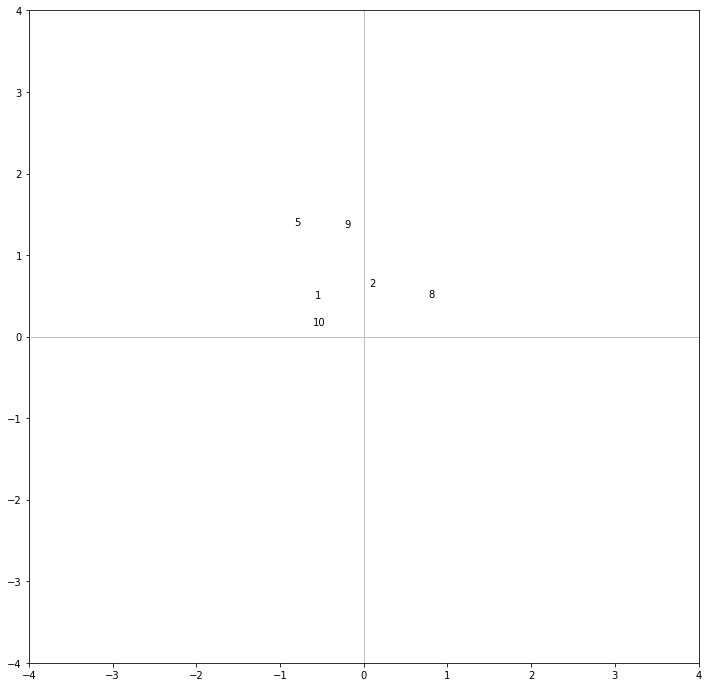

In [125]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-4,4) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(data.index[i],(coord[i,0],coord[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

In [126]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
di = pd.DataFrame({'ID':data.index,'d_i':di})
display(di)
di.sort_values(by = 'd_i', ascending = False).head(10)

ID        d_i
0         1   1.691528
1         2   1.530068
2         3  36.014922
3         5   3.966925
4         8   1.767322
...     ...        ...
1358  50222   1.467292
1359  50223   2.395005
1360  50224  81.572439
1361  50225   1.382598
1362  50226   1.214332

[1363 rows x 2 columns]

ID         d_i
412     659  534.536368
401     640  315.482614
811   22062  252.413811
515     828  245.332934
468     775  223.810390
586   19900  220.215110
1159  25992  180.773192
230     422  178.000964
211     399  176.327362
212     402  150.064181

Regardons à quoi correspondent les 10 individus contribuant le plus à l'inertie totale

In [127]:
#On va mettre l'ID de nos bâtiments ayant une forte contribution dans une liste
list_ind = di.sort_values(by = 'd_i', ascending = False).head(10)['ID'].to_list()

In [128]:
data_ACP = data_ACP.reset_index()

In [129]:
for i in list_ind:
    display(data_ACP.loc[data_ACP['OSEBuildingID'] == i, :])

OSEBuildingID PropertyType  Age  PropertyGFATotal  \
412            659       Office   11           1592914   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
412                   914832.0                         348788.0   

     ThirdLargestPropertyUseTypeGFA  conso/surface  emissions/surface  
412                        303910.0      36.043245           0.000307

OSEBuildingID PropertyType  Age  PropertyGFATotal  \
401            640       Office  104           1380959   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
401                  1000730.0                         281296.0   

     ThirdLargestPropertyUseTypeGFA  conso/surface  emissions/surface  
401                        220303.0       49.34377            0.00054

OSEBuildingID PropertyType  Age  PropertyGFATotal  \
811          22062   University   77           2200000   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
811                  1719643.0                         318960.0   

     ThirdLargestPropertyUseTypeGFA  conso/surface  emissions/surface  
811                             0.0      56.238767           0.001591

OSEBuildingID             PropertyType  Age  PropertyGFATotal  \
515            828  Hospital_Medical Office   22           1765970   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
515                  1639334.0                         441551.0   

     ThirdLargestPropertyUseTypeGFA  conso/surface  emissions/surface  
515                             0.0     140.139619           0.005914

OSEBuildingID PropertyType  Age  PropertyGFATotal  \
468            775       Office   31           1952220   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
468                  1680937.0                         319368.0   

     ThirdLargestPropertyUseTypeGFA  conso/surface  emissions/surface  
468                             0.0      46.461735           0.000441

OSEBuildingID PropertyType  Age  PropertyGFATotal  \
586          19900   Laboratory   90             49249   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
586                    40584.0                           7165.0   

     ThirdLargestPropertyUseTypeGFA  conso/surface  emissions/surface  
586                             0.0      696.73522           0.026515

OSEBuildingID        PropertyType  Age  PropertyGFATotal  \
1159          25992  Mixed Use Property    7           1206670   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
1159                   319361.0                         181047.0   

      ThirdLargestPropertyUseTypeGFA  conso/surface  emissions/surface  
1159                        177210.0      40.855585            0.00058

OSEBuildingID PropertyType  Age  PropertyGFATotal  \
230            422       Office   27           1605578   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
230                  1314475.0                         389860.0   

     ThirdLargestPropertyUseTypeGFA  conso/surface  emissions/surface  
230                         30744.0      28.539164           0.000303

OSEBuildingID PropertyType  Age  PropertyGFATotal  \
211            399       Office   28           1400000   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
211                   994116.0                         264481.0   

     ThirdLargestPropertyUseTypeGFA  conso/surface  emissions/surface  
211                        133598.0      38.126242           0.000423

OSEBuildingID PropertyType  Age  PropertyGFATotal  \
212            402       Office   27           1536606   

     LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
212                  1002403.0                         377046.0   

     ThirdLargestPropertyUseTypeGFA  conso/surface  emissions/surface  
212                         53116.0      39.513834            0.00037

In [130]:
print('10 premiers bâtiments dont la consommation d\'énergie est la plus forte')
display(df.sort_values(by = 'SiteEnergyUse(kBtu)', ascending = False).head(10))
print('--------------------------------------------------------')
print('10 premiers bâtiments dont l\'émission de CO2 est la plus forte')
display(df.sort_values(by = 'TotalGHGEmissions', ascending = False).head(10))
print('--------------------------------------------------------')
print('10 premiers bâtiments dont la consommation/pied carré est la plus forte')
display(df.sort_values(by = 'conso/surface', ascending = False).head(10))
print('--------------------------------------------------------')
print('10 premiers bâtiments dont l\'emission/pied carré est la plus forte')
display(df.sort_values(by = 'emissions/surface', ascending = False).head(10))

10 premiers bâtiments dont la consommation d'énergie est la plus forte


OSEBuildingID    BuildingType PrimaryPropertyType  \
618             828  NonResidential            Hospital   
558             753  NonResidential               Other   
124             198  NonResidential            Hospital   
340             477          Campus               Other   
1494          22062          Campus          University   
1690          23113  NonResidential      Medical Office   
559             775  NonResidential        Large Office   
2325          25251          Campus          University   
49               63  NonResidential               Hotel   
309             440  NonResidential  Mixed Use Property   

                                 PropertyName                 Address  \
618                        Swedish First Hill            747 Broadway   
558                            WestinBuilding            2001 6th Ave   
124   Seattle Children's Hospital Main Campus  4800 Sand Point Way NE   
340               Weintraub/Hutchinson/Thomas     1100 Fairview Ave N   
1494                            Entire Campus         901 12th Avenue   
1690                           Central Campus        201 16th Ave. E.   
559                    Columbia Center - 2015          701 5th Avenue   
2325                  5th Avenue Master Meter         3307 3rd Ave. W   
49                     Sheraton Seattle Hotel         1400 6th Avenue   
309              Fisher Plaza - West Building           100 4th Ave N   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
618   98122.0                    1978201096                    3   
558   98121.0                    0659000950                    7   
124   98105.0                    2982800005                    4   
340   98109.0                    1984200455                    3   
1494  98122.0                    2254500880                    3   
1690  98112.0                    3117000005                    3   
559   98104.0                    0942000640                    7   
2325  98119.0                    8900000555                    7   
49    98101.0                    1976700095                    7   
309   98109.0                    1991200170                    7   

               Neighborhood   Latitude   Longitude  YearBuilt  \
618                    EAST  47.608951 -122.322402       1994   
558                DOWNTOWN  47.614380 -122.338710       1981   
124               NORTHEAST  47.662310 -122.281460       1953   
340              LAKE UNION  47.628550 -122.330350       1997   
1494                   EAST  47.610650 -122.317110       1939   
1690                   EAST  47.620140 -122.312280       1964   
559                DOWNTOWN  47.604540 -122.330720       1985   
2325  MAGNOLIA / QUEEN ANNE  47.650190 -122.361730       1945   
49                 DOWNTOWN  47.610870 -122.333390       1982   
309              LAKE UNION  47.619150 -122.348570       2001   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
618                 7.0              14           1765970                   0   
558                 1.0              33            429405                   0   
124                 6.0              10            879000                   0   
340                 1.0               5            535947                   0   
1494                1.0               2           2200000                   0   
1690                1.0               3            591981                   0   
559                 1.0              76           1952220              319400   
2325               14.0               2            537000                   0   
49                  1.0              34            994212              146694   
309                 1.0               6            213834              104922   

      PropertyGFABuilding(s)  \
618                  1765970   
558                   429405   
124                   879000   
340                   535947   
1494                 2200000   
169

--------------------------------------------------------
10 premiers bâtiments dont l'émission de CO2 est la plus forte


OSEBuildingID    BuildingType PrimaryPropertyType  \
618             828  NonResidential            Hospital   
124             198  NonResidential            Hospital   
340             477          Campus               Other   
2325          25251          Campus          University   
1494          22062          Campus          University   
1690          23113  NonResidential      Medical Office   
262             389  NonResidential               Hotel   
49               63  NonResidential               Hotel   
2                 3  NonResidential               Hotel   
119             338  NonResidential               Other   

                                 PropertyName                 Address  \
618                        Swedish First Hill            747 Broadway   
124   Seattle Children's Hospital Main Campus  4800 Sand Point Way NE   
340               Weintraub/Hutchinson/Thomas     1100 Fairview Ave N   
2325                  5th Avenue Master Meter         3307 3rd Ave. W   
1494                            Entire Campus         901 12th Avenue   
1690                           Central Campus        201 16th Ave. E.   
262                  Fairmont Olympic Seattle   411 University Street   
49                     Sheraton Seattle Hotel         1400 6th Avenue   
2                     5673-The Westin Seattle         1900 5th Avenue   
119                 Jack R. McDonald Building           1900 9th Ave.   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
618   98122.0                    1978201096                    3   
124   98105.0                    2982800005                    4   
340   98109.0                    1984200455                    3   
2325  98119.0                    8900000555                    7   
1494  98122.0                    2254500880                    3   
1690  98112.0                    3117000005                    3   
262   98101.0                    0002400003                    7   
49    98101.0                    1976700095                    7   
2     98101.0                    0659000475                    7   
119   98101.0                    0660001215                    7   

               Neighborhood   Latitude   Longitude  YearBuilt  \
618                    EAST  47.608951 -122.322402       1994   
124               NORTHEAST  47.662310 -122.281460       1953   
340              LAKE UNION  47.628550 -122.330350       1997   
2325  MAGNOLIA / QUEEN ANNE  47.650190 -122.361730       1945   
1494                   EAST  47.610650 -122.317110       1939   
1690                   EAST  47.620140 -122.312280       1964   
262                DOWNTOWN  47.608040 -122.333910       1923   
49                 DOWNTOWN  47.610870 -122.333390       1982   
2                  DOWNTOWN  47.613930 -122.338100       1969   
119                DOWNTOWN  47.615980 -122.334480       2004   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
618                 7.0              14           1765970                   0   
124                 6.0              10            879000                   0   
340                 1.0               5            535947                   0   
2325               14.0               2            537000                   0   
1494                1.0               2           2200000                   0   
1690                1.0               3            591981                   0   
262                 1.0              12            542305                   0   
49                  1.0              34            994212              146694   
2                   1.0              41            956110              196718   
119                 1.0              11            299070               68432   

      PropertyGFABuilding(s)  \
618                  1765970   
124                   879000   
340                   535947   
2325                  537000   
1494                 2200000   
169

--------------------------------------------------------
10 premiers bâtiments dont la consommation/pied carré est la plus forte


OSEBuildingID        BuildingType          PrimaryPropertyType  \
240             365      NonResidential                        Other   
809           19900      NonResidential                   Laboratory   
558             753      NonResidential                        Other   
3171          49709      NonResidential                        Other   
3203          49780      NonResidential                        Other   
1817          23503      NonResidential                   Restaurant   
3373          50224  Nonresidential COS                        Other   
2795          26986      NonResidential  Supermarket / Grocery Store   
2109          24493      NonResidential  Supermarket / Grocery Store   
3365          50208  Nonresidential COS                        Other   

                          PropertyName                  Address  ZipCode  \
240               UW Tower Data Center     4333 BROOKLYN AVE NE  98185.0   
809                  3000/3018 Western        3018 Western Ave.  98121.0   
558                     WestinBuilding             2001 6th Ave  98121.0   
3171  Seattle ProCure Management, LLC.  1570 North 115th Street  98013.0   
3203      2020 Fifth Avenue Dat Center        2020 Fifth Avenue  98121.0   
1817  Salty's Waterfront Seafood Grill       1936 Harbor Ave SW  98126.0   
3373                   Queen Anne Pool           1920 1st Ave W  98119.0   
2795                           Admiral         2320 42nd Ave SW  98116.0   
2109               Metropolitan Market         5250 40th Ave NE  98105.0   
3365                      Ballard Pool          1471 NW 67th St  98117.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
240                     1142000290                    4   
809                     0695000090                    7   
558                     0659000950                    7   
3171                    3026049128                    5   
3203                    0659000905                    7   
1817                    7666706590                    1   
3373                    1794501150                    7   
2795                    6087100195                    1   
2109                    7974700270                    4   
3365                    3050700005                    6   

               Neighborhood  Latitude  Longitude  YearBuilt  \
240               NORTHEAST  47.66060 -122.31512       1969   
809                DOWNTOWN  47.61763 -122.35507       1926   
558                DOWNTOWN  47.61438 -122.33871       1981   
3171              NORTHWEST  47.71286 -122.33635       2012   
3203               DOWNTOWN  47.61449 -122.33956       1975   
1817              SOUTHWEST  47.58654 -122.37644       1902   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
2795              SOUTHWEST  47.58217 -122.38479       1997   
2109              NORTHEAST  47.66824 -122.28394       1973   
3365                BALLARD  47.67734 -122.37624       1972   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
240                 1.0               5             36000                   0   
809                 1.0               4             49249                   0   
558                 1.0              33            429405                   0   
3171                1.0               2             53575                   0   
3203                1.0               7             90679               35120   
1817                1.0               2             20398                   0   
3373                1.0               1             13157                   0   
2795                1.0               1             31841                   0   
2109                1.0               1             24377                   0   
3365                1.0               1             12769                   0   

      PropertyGFABuilding(s)  \
240                    36000   
809                    49249   
558                   429405   
3171        

--------------------------------------------------------
10 premiers bâtiments dont l'emission/pied carré est la plus forte


OSEBuildingID        BuildingType          PrimaryPropertyType  \
809           19900      NonResidential                   Laboratory   
3373          50224  Nonresidential COS                        Other   
3365          50208  Nonresidential COS                        Other   
1817          23503      NonResidential                   Restaurant   
1753          23310      NonResidential                        Other   
426           23854      NonResidential                   Restaurant   
2795          26986      NonResidential  Supermarket / Grocery Store   
2522          25955      NonResidential                        Other   
550             743      NonResidential                   Laboratory   
1337          21549      NonResidential                   Laboratory   

                                           PropertyName  \
809                                   3000/3018 Western   
3373                                    Queen Anne Pool   
3365                                       Ballard Pool   
1817                   Salty's Waterfront Seafood Grill   
1753         Charles & Emma Frye Free Public Art Museum   
426                                             Pier 57   
2795                                            Admiral   
2522                                Seattle Tennis Club   
550   Dendreon Pharmaceuticals Inc. (Building Owner ...   
1337                                    410 W. Harrison   

                        Address  ZipCode TaxParcelIdentificationNumber  \
809           3018 Western Ave.  98121.0                    0695000090   
3373             1920 1st Ave W  98119.0                    1794501150   
3365            1471 NW 67th St  98117.0                    3050700005   
1817         1936 Harbor Ave SW  98126.0                    7666706590   
1753              704 Terry Ave  98104.0                    8590900585   
426            1301 Alaskan Way  98101.0                    7666202435   
2795           2320 42nd Ave SW  98116.0                    6087100195   
2522        922 McGilvra Blvd E  98112.0                    5317100844   
550   1208 Eastlake Avenue East  98102.0                    2163901160   
1337        410 W. Harrison St.  98119.0                    1992200045   

      CouncilDistrictCode           Neighborhood  Latitude  Longitude  \
809                     7               DOWNTOWN  47.61763 -122.35507   
3373                    7  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3365                    6                BALLARD  47.67734 -122.37624   
1817                    1              SOUTHWEST  47.58654 -122.37644   
1753                    3                   EAST  47.60709 -122.32416   
426                     7               DOWNTOWN  47.60613 -122.34115   
2795                    1              SOUTHWEST  47.58217 -122.38479   
2522                    3                   EAST  47.62816 -122.28067   
550                     3             LAKE UNION  47.63079 -122.32693   
1337                    7  MAGNOLIA / QUEEN ANNE  47.62240 -122.36248   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
809        1926                1.0               4             49249   
3373       1974                1.0               1             13157   
3365       1972                1.0               1             12769   
1817       1902                1.0               2             20398   
1753       1951                1.0               1             47699   
426        1900                1.0               1             43728   
2795       1997                1.0               1             31841   
2522       1928                1.0               3             71280   
550        1999                1.0               4            115748   
1337       1962                1.0               2             34416   

      PropertyGFAParking  PropertyGFABuilding(s)  \
809                    0                   49249   
3373                   0                   1315

Pour certains bâtiments contribuant le plus à l'inertie totale, on les retouve parmis les bâtiments dont la consommation d'énergie ou les émissions de CO2 sont les plus élevées, ou alors parmis les bâtiments ayant de fortes valeurs d'émission/pied carré et/ou de consommation/par pied carré.

In [131]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[-0.17473966  0.52118764  0.55420095  0.51076097  0.35220367 -0.03378977
  -0.06800636]
 [-0.05968627  0.03907349  0.03917688  0.0174078   0.02892663  0.7076985
   0.7009986 ]
 [ 0.95379485  0.0360934   0.05270365  0.052505    0.27513387 -0.02150444
   0.08530598]
 [-0.21341844 -0.40976217 -0.24457017  0.01980626  0.85098971  0.02291131
  -0.04040118]
 [-0.06126902  0.39863909  0.21857294 -0.84540454  0.26266161 -0.06659551
   0.0377349 ]
 [ 0.08242711  0.02082184  0.03826037 -0.07560753 -0.00877974  0.70159351
  -0.7023399 ]
 [ 0.00913372 -0.63109608  0.76124651 -0.12347386 -0.07852059 -0.01911281
   0.01901269]]


In [132]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [133]:
#corrélation des variables avec les axes
corvar = np.zeros((n,n))
for k in range(n):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
    
#afficher la matrice des corrélations variables x facteurs 
print(corvar)

[[-0.2812208  -0.07445692  0.86168664 -0.16937267 -0.030581    0.03187345
   0.00106045]
 [ 0.83878385  0.04874306  0.03260785 -0.32519455  0.19897136  0.00805153
  -0.07327179]
 [ 0.89191448  0.04887204  0.04761404 -0.19409524  0.10909556  0.01479477
   0.08838258]
 [ 0.82200348  0.02171573  0.04743458  0.0157186  -0.42196386 -0.02923641
  -0.01433562]
 [ 0.56682608  0.03608515  0.24856412  0.67536058  0.13110139 -0.00339501
  -0.00911643]
 [-0.05438025  0.88283362 -0.01942775  0.01818282 -0.03323959  0.27129674
  -0.00221904]
 [-0.10944741  0.87447568  0.07706796 -0.03206309  0.01883449 -0.27158536
   0.00220742]]


In [134]:
#on affiche pour les trois premiers axes
print(pd.DataFrame({'id':data.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1], 'COR_3':corvar[:,2], 'COR_4':corvar[:,3]}))

                                id     COR_1     COR_2     COR_3     COR_4
0                              Age -0.281221 -0.074457  0.861687 -0.169373
1        LargestPropertyUseTypeGFA  0.838784  0.048743  0.032608 -0.325195
2                 PropertyGFATotal  0.891914  0.048872  0.047614 -0.194095
3  SecondLargestPropertyUseTypeGFA  0.822003  0.021716  0.047435  0.015719
4   ThirdLargestPropertyUseTypeGFA  0.566826  0.036085  0.248564  0.675361
5                    conso/surface -0.054380  0.882834 -0.019428  0.018183
6                emissions/surface -0.109447  0.874476  0.077068 -0.032063


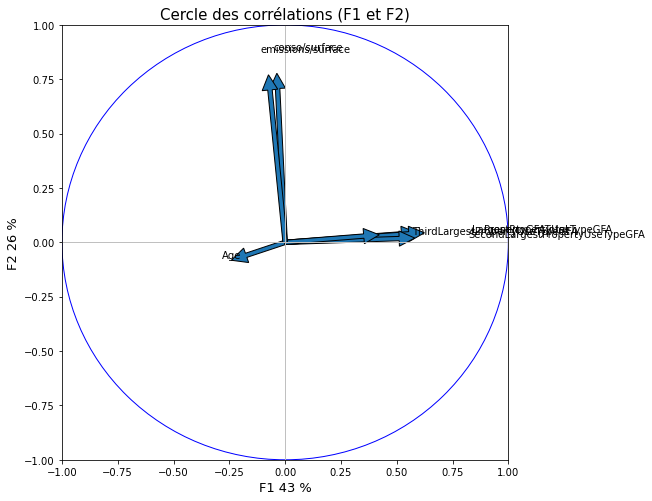

In [135]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#On affiche les plans (0, 1) correspondent par exemple à F1 et F2
x, y = (0, 1)

#affichage des étiquettes (noms des variables)
for j in range(n):
    plt.annotate(data.columns[j],(corvar[j,x],corvar[j,y]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Pour chaque composante : 
for i in range(0, acp.components_.shape[1]):

# Les flèches
    axes.arrow(0,0, acp.components_[x, i], acp.components_[y, i], head_width=0.07, head_length=0.07, width=0.02, )


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
if acp : 
    v1 = str(round(100*p[x]))  + " %"
    v2 = str(round(100*p[y]))  + " %"
else : 
    v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
axes.set_xlabel(f'F{x+1} {v1}', size = 13)
axes.set_ylabel(f'F{y+1} {v2}', size = 13)

#Titre 
plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), size = 15)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [136]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':data.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                                id    COS2_1    COS2_2
0                              Age  0.079085  0.005544
1        LargestPropertyUseTypeGFA  0.703558  0.002376
2                 PropertyGFATotal  0.795511  0.002388
3  SecondLargestPropertyUseTypeGFA  0.675690  0.000472
4   ThirdLargestPropertyUseTypeGFA  0.321292  0.001302
5                    conso/surface  0.002957  0.779395
6                emissions/surface  0.011979  0.764708


In [137]:
#contributions
ctrvar = cos2var
for k in range(n):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':data.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1], 'CTR_3':ctrvar[:,2], 'CTR_4':ctrvar[:,3]}))

                                id     CTR_1     CTR_2     CTR_3     CTR_4
0                              Age  0.030534  0.003562  0.909725  0.045547
1        LargestPropertyUseTypeGFA  0.271637  0.001527  0.001303  0.167905
2                 PropertyGFATotal  0.307139  0.001535  0.002778  0.059815
3  SecondLargestPropertyUseTypeGFA  0.260877  0.000303  0.002757  0.000392
4   ThirdLargestPropertyUseTypeGFA  0.124047  0.000837  0.075699  0.724183
5                    conso/surface  0.001142  0.500837  0.000462  0.000525
6                emissions/surface  0.004625  0.491399  0.007277  0.001632


<AxesSubplot:ylabel='id'>

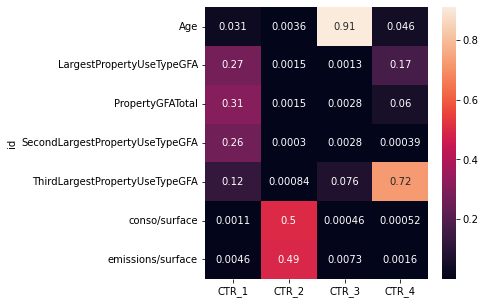

In [138]:
#On peut faire une heatmap des contributions aux différents axes
plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame({'id':data.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1], 'CTR_3':ctrvar[:,2], 'CTR_4':ctrvar[:,3]}).set_index('id'), 
           annot = True)

In [139]:
#traitement de la variable 'score' supplémentaire
Type = df.loc[:, df.columns == 'PrimaryPropertyType']
print(Type)

     PrimaryPropertyType
0                  Hotel
1                  Hotel
2                  Hotel
3                  Hotel
4                  Hotel
...                  ...
3371              Office
3372               Other
3373               Other
3374  Mixed Use Property
3375  Mixed Use Property

[1363 rows x 1 columns]


In [140]:
#modalités de la variable qualitative
modalites = np.unique(Type)
print(modalites)

['Distribution Center' 'Hospital' 'Hotel' 'K-12 School' 'Laboratory'
 'Large Office' 'Medical Office' 'Mixed Use Property' 'Office' 'Other'
 'Refrigerated Warehouse' 'Restaurant' 'Retail Store'
 'Self-Storage Facility' 'Small- and Mid-Sized Office'
 'Supermarket / Grocery Store' 'University' 'Warehouse' 'Worship Facility']


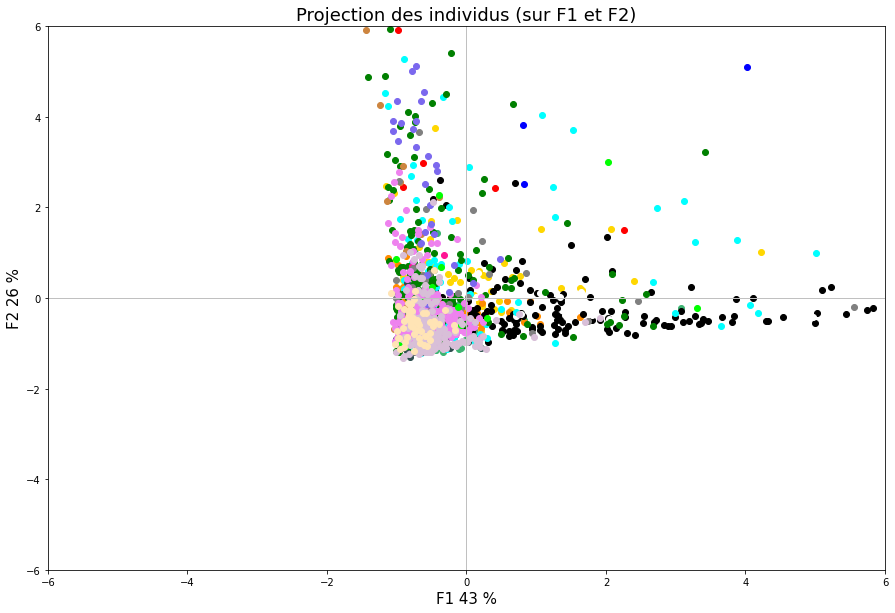

In [141]:
#liste des couleurs
couleurs = ['mediumseagreen','blue','gold', 'darkorange', 'red', 'black', 'white', 'cyan', 'magenta', 'green', 'deeppink', 
            'peru', 'grey', 'darkslategrey', 'violet', 'mediumslateblue', 'lime', 'thistle', 'moccasin', 'lightsalmon']
#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(15,10))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

x, y = (0, 1)

##Pour afficher les points en couleur
#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
 #numéro des individus concernés
    numero = np.where(Type == modalites[c])
 #les passer en revue pour affichage
    for i in numero[0]:
        plt.scatter(coord[i,x],coord[i,y], color=couleurs[c])

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
if acp : 
    v1 = str(round(100*p[x]))  + " %"
    v2 = str(round(100*p[y]))  + " %"
else : 
    v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
axes.set_xlabel(f'F{x+1} {v1}', size = 15)
axes.set_ylabel(f'F{y+1} {v2}', size = 15)

# Titre et display
plt.title(f"Projection des individus (sur F{x+1} et F{y+1})", size = 18)

#affichage
plt.show()

L'ACP montre des bâtiments assez mélangés selon leur type. 

## 4.9) Analyse bivariée entre nos deux nouvelles variables de consommation/pied carré et émissions/pied carré

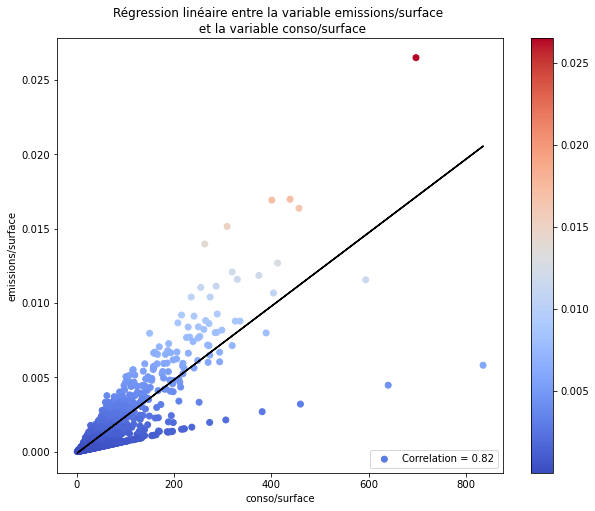

In [142]:
#On trace la régression linéaire entre nos deux variables
reg_lin(df, 'conso/surface', 'emissions/surface')

Une corrélation est observée entre les variables de consommation d'énergie par pied carré et les émissions de CO2 par pied carré.

# 5) Cartographies 

In [143]:
data = df.copy()

In [144]:
!pip install geopy

In [145]:
from geopy.geocoders import ArcGIS

In [146]:
nom = ArcGIS()

In [147]:
#On cherche la ville de Seattle
s = nom.geocode('Seattle')

In [148]:
s.latitude #On affiche ses coordonnées de latitude

47.60357000000005

In [149]:
s.longitude #On affiche ses coordonnées de longitude

-122.32944999999995

In [150]:
pip install folium

In [151]:
import folium

In [152]:
#Création d'une variable contenant les informations que l'on souhaite
coordonnees = data[['PropertyName', 'PropertyType', 'Latitude', 'Longitude']].values.tolist()

In [153]:
#Affichage de la variable
coordonnees

[['Mayflower park hotel', 'Hotel', 47.6122, -122.33799],
 ['Paramount Hotel', 'Hotel', 47.61317, -122.33393],
 ['5673-The Westin Seattle', 'Hotel', 47.61393, -122.3381],
 ['HOTEL MAX', 'Hotel', 47.61412, -122.33664],
 ['WARWICK SEATTLE HOTEL (ID8)', 'Hotel', 47.61375, -122.34047],
 ['West Precinct', 'Other', 47.61623, -122.33657],
 ['Camlin', 'Hotel', 47.6139, -122.33283],
 ['Paramount Theatre', 'Other', 47.61327, -122.33136],
 ['311wh-Pioneer Square', 'Hotel', 47.60294, -122.33263],
 ['Hotel Monaco Seattle', 'Hotel', 47.60695, -122.33414],
 ['Executive Pacific Plaza', 'Hotel', 47.60699, -122.33346],
 ['Crowne Plaza Hotel Seattle', 'Hotel', 47.60809, -122.33212],
 ['Hotel Vintage Seattle', 'Hotel', 47.60755, -122.33244],
 ['The Seattle Public Library - Central Library',
  'Other',
  47.60649,
  -122.33297],
 ['Downtown Seattle YMCA', 'Other', 47.60546, -122.33279],
 ['Renaissance Seattle Hotel', 'Hotel', 47.60681, -122.33078],
 ['The Rainier Club', 'Mixed Use Property', 47.60515, -122.

In [154]:
#On intègre nos différents types de propriété primaire dans une liste
data['PropertyType'].unique().tolist()

['Hotel',
 'Other',
 'Mixed Use Property',
 'University',
 'Office',
 'Warehouse_Storage',
 'K-12 School',
 'Hospital_Medical Office',
 'Food Store',
 'Worship Facility',
 'Laboratory',
 'Restaurant']

In [155]:
#On affiche l'aide de folium.Circle
help(folium.Circle)

Help on class Circle in module folium.vector_layers:

class Circle(folium.map.Marker)
 |  Circle(location=None, radius=50, popup=None, tooltip=None, **kwargs)
 |  
 |  Class for drawing circle overlays on a map.
 |  
 |  It's an approximation and starts to diverge from a real circle closer to
 |  the poles (due to projection distortion).
 |  
 |  See :func:`folium.vector_layers.path_options` for the `Path` options.
 |  
 |  Parameters
 |  ----------
 |  location: tuple[float, float]
 |      Latitude and Longitude pair (Northing, Easting)
 |  popup: string or folium.Popup, default None
 |      Input text or visualization for object displayed when clicking.
 |  tooltip: str or folium.Tooltip, default None
 |      Display a text when hovering over the object.
 |  radius: float
 |      Radius of the circle, in meters.
 |  **kwargs
 |      Other valid (possibly inherited) options. See:
 |      https://leafletjs.com/reference.html#circle
 |  
 |  Method resolution order:
 |      Circle
 |   

In [156]:
#Création d'un fond de carte en reprenant les coordonnées de la ville de Seattle
data_map = folium.Map(location = [47.60357000000005, -122.32944999999995], zoom_start = 11)

#Création d'une couche
fg = folium.FeatureGroup(name = 'data')

#On crée une fonction où on attribue des couleurs pour chaque type de propriété
def color(categ):
    if categ == 'Hotel':
        col = '#A7001E'
    elif categ == 'Other':
        col = '#939597'
    elif categ == 'Mixed Use Property':
        col = '#939597'
    elif categ == 'K-12 School':
        col = '#08C5D1'
    elif categ == 'University':
        col = '#5784BA'
    elif categ == 'Office':
        col = '#242423'
    elif categ == 'Warehouse_Storage':
        col = '#CA7C5C'    
    elif categ == 'Hospital_Medical Office':
        col = '#FFFFFF'
    elif categ == 'Worship Facility':
        col = '#A4BD01'
    elif categ == 'Food Store':
        col = '#FE277E'
    elif categ == 'Laboratory':
        col = '#C49FFF'
    else:
        col = '#4AA3A2'
    return col

#On crée nos points en fonction des différentes informations (latitude, longitude, type de propriété, nom du bâtiment)
for lat, lon, name, categ in zip(data['Latitude'], data['Longitude'], data['PropertyName'], data['PropertyType']):
    folium.Circle(
    radius=100,
    location=[lat, lon],
    popup=[name, lat, lon],
    color=color(categ),
    fill=False,
).add_to(data_map)

## 6.1) Répartition des types de propriétés

In [157]:
#Création d'une légende en se basant sur le lien suivant : 
# https://nbviewer.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd

from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Property Type</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background-color:rgba(164, 189, 1);opacity:1;'></span>Worship Facility</li>
    <li><span style='background-color:rgba(74, 163, 162);opacity:1;'></span>Restaurant</li>
    <li><span style='background-color:rgba(8, 197, 209);opacity:1;'></span>K-12 School</li>
    <li><span style='background-color:rgba(87, 132, 186);opacity:1;'></span>University</li>
    <li><span style='background-color:rgba(196, 159, 255);opacity:1;'></span>Laboratory</li>
    <li><span style='background-color:rgba(254, 39, 126);opacity:1;'></span>Food Store</li>
    <li><span style='background-color:rgba(167, 0, 30);opacity:1;'></span>Hotel</li>
    <li><span style='background-color:rgba(202, 124, 92);opacity:1;'></span>Warehouse_Storage</li>
    <li><span style='background-color:rgba(255, 255, 255);opacity:1;'></span>Hospital_Medical Office</li>
    <li><span style='background-color:rgba(36, 36, 35);opacity:1;'></span>Office</li>
    <li><span style='background-color:rgba(147, 149, 151);opacity:1;'></span>Mixed Used Property, Other</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

data_map.get_root().add_child(macro)

data_map

### On va faire une nouvelle carte en utilisant les codes postaux et colorer les zones de code postal en fonction de la consommation moyenne d'énergie

In [158]:
#On va faire une nouvelle carte en utilisant les codes postaux et colorer les zones de code postal en fonction de la consommation
#moyenne d'énergie

#On regarde le nombre de codes postaux uniques
display(data['ZipCode'].value_counts())
data['ZipCode'].nunique()

98134.0    157
98104.0    134
98101.0    128
98109.0    113
98108.0    102
98122.0     74
98121.0     73
98105.0     62
98103.0     59
98119.0     57
98107.0     45
98118.0     42
98144.0     40
98125.0     39
98115.0     37
98133.0     36
98102.0     25
98199.0     20
98116.0     20
98106.0     19
98112.0     17
98117.0     16
98126.0     13
98136.0      5
98155.0      3
98154.0      2
98168.0      2
98111.0      2
98146.0      2
98013.0      2
98033.0      1
98165.0      1
98145.0      1
98020.0      1
98177.0      1
98113.0      1
98178.0      1
98011.0      1
98053.0      1
98070.0      1
98124.0      1
98006.0      1
98181.0      1
98185.0      1
98195.0      1
98164.0      1
98405.0      1
Name: ZipCode, dtype: int64

47

In [159]:
#On va effectuer une moyenne de la consommation par code postal

df_zip = data.groupby('ZipCode')[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].mean().reset_index()
display(df_zip.head())

ZipCode  SiteEnergyUse(kBtu)  TotalGHGEmissions
0  98006.0           4515180.50              50.17
1  98011.0           9546165.00             294.65
2  98013.0          16583045.50             341.69
3  98020.0           2720238.25              77.84
4  98033.0           3476212.50              48.76

In [160]:
#On va fusionner notre fichier avec les coordonnées pour chaque code postal
coor = pd.read_csv('Coordonnees_Zip.csv', sep = ';')
display(coor.head())

ZipCode   Latitude  Longitude
0      601  18.180555 -66.749961
1      602  18.361945 -67.175597
2      603  18.455183 -67.119887
3      606  18.158345 -66.932911
4      610  18.295366 -67.125135

In [161]:
data_zip_coor = pd.merge(df_zip, coor, on = "ZipCode", how = 'left')
data_zip_coor.isnull().sum()

ZipCode                0
SiteEnergyUse(kBtu)    0
TotalGHGEmissions      0
Latitude               8
Longitude              8
dtype: int64

Des NaN sont observées, on va essayer avec un autre fichier

In [162]:
#On ouvre notre fichier
coor_2 = pd.read_csv('Coordonnees_Zip_2.csv', sep = ';')
display(coor_2.head())

ZipCode     City State  Area Code County  Latitude  Longitude
0    98101  SEATTLE    WA        206   KING   47.6113  -122.3334
1    98102  SEATTLE    WA        206   KING   47.6360  -122.3214
2    98103  SEATTLE    WA        206   KING   47.6715  -122.3413
3    98104  SEATTLE    WA        206   KING   47.6025  -122.3264
4    98105  SEATTLE    WA        206   KING   47.6640  -122.2923

In [163]:
#Fusion de nos 2 fichiers
data_zip_coor2 = pd.merge(df_zip, coor_2, on = "ZipCode", how = 'left')
data_zip_coor2.isnull().sum()

ZipCode                 0
SiteEnergyUse(kBtu)     0
TotalGHGEmissions       0
City                   10
State                  10
Area Code              10
County                 10
Latitude               10
Longitude              10
dtype: int64

In [164]:
#On va supprimer les lignes des NaN
data_zip_coor2.loc[data_zip_coor2['Latitude'].isnull(), :]

data_zip_coor = data_zip_coor2.drop(data_zip_coor2[data_zip_coor2['Latitude'].isnull()].index)
data_zip_coor.head()

ZipCode  SiteEnergyUse(kBtu)  TotalGHGEmissions     City State  Area Code  \
7   98101.0         1.492948e+07         304.934844  SEATTLE    WA      206.0   
8   98102.0         7.771017e+06         178.280400  SEATTLE    WA      206.0   
9   98103.0         3.935598e+06          66.336441  SEATTLE    WA      206.0   
10  98104.0         9.017609e+06         164.574776  SEATTLE    WA      206.0   
11  98105.0         8.420951e+06         218.643548  SEATTLE    WA      206.0   

   County  Latitude  Longitude  
7    KING   47.6113  -122.3334  
8    KING   47.6360  -122.3214  
9    KING   47.6715  -122.3413  
10   KING   47.6025  -122.3264  
11   KING   47.6640  -122.2923

In [165]:
data_zip_coor['SiteEnergyUse(kBtu)'].sort_values(ascending = False)

37    6.951981e+07
33    5.776441e+07
35    3.187608e+07
43    3.003849e+07
44    2.845044e+07
26    2.067592e+07
42    1.766665e+07
7     1.492948e+07
24    1.216988e+07
15    1.103081e+07
17    1.075130e+07
25    9.242945e+06
10    9.017609e+06
16    8.571792e+06
11    8.420951e+06
8     7.771017e+06
23    7.076115e+06
36    5.400804e+06
30    4.744861e+06
20    4.497742e+06
29    4.268629e+06
22    4.257533e+06
9     3.935598e+06
31    3.699237e+06
19    3.682977e+06
32    3.627100e+06
39    3.497136e+06
28    3.487904e+06
27    3.437244e+06
13    3.320847e+06
21    3.282694e+06
12    2.908304e+06
14    2.551602e+06
45    2.319234e+06
40    1.709308e+06
41    1.404702e+06
34    1.206306e+06
Name: SiteEnergyUse(kBtu), dtype: float64

In [166]:
import json
import pprint

from folium.plugins import MarkerCluster

#Création d'un fond de carte en reprenant les coordonnées de la ville de Seattle
data_map = folium.Map(location = [47.60357000000005, -122.32944999999995], zoom_start = 10.5)

#Création d'une couche
fg = folium.FeatureGroup(name = 'data')

In [167]:
folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'SiteEnergyUse(kBtu)'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='BuPu', fill_opacity=1, line_opacity=0.2, range_color = (1206306, 6951981),
             legend_name='Quantité énergie moyenne consommée (kBtu)').add_to(data_map)

## 6.2) Quantité d'énergie consommée (kBtu) par code postal 

In [168]:
#On convertit nos données de consommation d'énergie et d'émissions en log pour obtenir de plus grandes plages de données
data_zip_coor['log_conso'] = np.log10(data_zip_coor['SiteEnergyUse(kBtu)'])
data_zip_coor['log_emissions'] = np.log10(data_zip_coor['TotalGHGEmissions'])
data_zip_coor.head()

ZipCode  SiteEnergyUse(kBtu)  TotalGHGEmissions     City State  Area Code  \
7   98101.0         1.492948e+07         304.934844  SEATTLE    WA      206.0   
8   98102.0         7.771017e+06         178.280400  SEATTLE    WA      206.0   
9   98103.0         3.935598e+06          66.336441  SEATTLE    WA      206.0   
10  98104.0         9.017609e+06         164.574776  SEATTLE    WA      206.0   
11  98105.0         8.420951e+06         218.643548  SEATTLE    WA      206.0   

   County  Latitude  Longitude  log_conso  log_emissions  
7    KING   47.6113  -122.3334   7.174045       2.484207  
8    KING   47.6360  -122.3214   6.890478       2.251104  
9    KING   47.6715  -122.3413   6.595011       1.821752  
10   KING   47.6025  -122.3264   6.955091       2.216363  
11   KING   47.6640  -122.2923   6.925361       2.339737

### Consommation d'énergie

In [169]:
#Création d'un fond de carte en reprenant les coordonnées de la ville de Seattle
data_map = folium.Map(location = [47.60357000000005, -122.32944999999995], zoom_start = 10.5)

In [170]:
folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'log_conso'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='BuPu', fill_opacity=1, line_opacity=0.2,
             legend_name='Log de la quantité énergie moyenne consommée (kBtu)').add_to(data_map)

### 6.2.1) Vue d'ensemble de Seattle, le code postal ayant la plus forte consommation est entouré en rouge

In [171]:
#On va ajouter les markers sur les zones ayant la plus forte consommation d'énergie moyenne

conso_1 = data_zip_coor.sort_values(by = 'log_conso', ascending = False).head(1)

for lat, lon, name, zipcode in zip(conso_1['Latitude'], conso_1['Longitude'], conso_1['log_conso'], conso_1['ZipCode']):
    folium.CircleMarker(location=[lat, lon],
                  radius=10, 
                  color = 'red',
                  popup=[zipcode, lat, lon],fill=False).add_to(data_map)
    
data_map

In [172]:
#Si on zoome sur le code postal avec la plus grande consommation moyenne

data_zip_coor.sort_values(by = 'log_conso', ascending = False).head(1)

data_high = folium.Map(location = [47.6055, -122.3324], zoom_start = 15)


### 6.2.2) Zoom sur le plus gros consommateur d'énergie moyen 

In [173]:
folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'log_conso'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='BuPu', fill_opacity=1, line_opacity=0.2,
             legend_name='Log de la quantité énergie moyenne consommée (kBtu)').add_to(data_high)
data_high

### 6.2.3) Ville de Seattle marquée par les 10 codes postaux consommant la plus forte quantité d'énergie 

In [174]:
#On va ajouter les markers sur les zones ayant la plus forte consommation d'énergie moyenne

data_high = folium.Map(location = [47.60357000000005, -122.32944999999995], zoom_start = 10.5)

high_conso = data_zip_coor.sort_values(by = 'log_conso', ascending = False).head(10)

folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'log_conso'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='BuPu', fill_opacity=1, line_opacity=0.2,
             legend_name='Log de la quantité énergie moyenne consommée (kBtu)').add_to(data_high)

for lat, lon, name, zipcode in zip(high_conso['Latitude'], high_conso['Longitude'], high_conso['log_conso'], high_conso['ZipCode']):
    folium.Marker(location=[lat, lon],
    popup=[zipcode, lat, lon],fill=False).add_to(data_high)
    
data_high

## 6.3) Emission de CO2 par code postal 
### 6.3.1) Vue d'ensemble de Seattle, le code postal ayant la plus forte émission de CO2 est entouré en rouge

In [175]:
#On va ajouter les markers sur les zones ayant la plus forte consommation d'énergie moyenne

emissions_1 = data_zip_coor.sort_values(by = 'log_emissions', ascending = False).head(1)

data_emissions = folium.Map(location = [47.60357000000005, -122.32944999999995], zoom_start = 10.5)

folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'log_emissions'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='YlOrRd', fill_opacity=1, line_opacity=0.2,
             legend_name='Log des émissions moyennes de gaz à effet de serre').add_to(data_emissions)

for lat, lon, name, zipcode in zip(emissions_1['Latitude'], emissions_1['Longitude'], emissions_1['log_emissions'], emissions_1['ZipCode']):
    folium.CircleMarker(location=[lat, lon],
                  radius=10, 
                  color = 'red',
                  popup=[zipcode, lat, lon],fill=False).add_to(data_emissions)
    
data_emissions

In [176]:
#Si on zoome sur le code postal avec la plus grande consommation moyenne

data_zip_coor.sort_values(by = 'log_emissions', ascending = False).head(1)

data_high_E = folium.Map(location = [47.6593, -122.3135], zoom_start = 13.5)


### 6.3.2) Zoom sur le plus gros émetteur moyen de CO2

In [177]:
folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'log_emissions'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='YlOrRd', fill_opacity=1, line_opacity=0.2, 
             legend_name='Log des émissions moyennes de gaz à effet de serre').add_to(data_high_E)
data_high_E

### 6.3.3) Ville de Seattle marquée par les 10 codes postaux consommant la plus forte quantité d'énergie 

In [178]:
#On va ajouter les markers sur les zones ayant la plus forte consommation d'énergie moyenne

data_emissions = folium.Map(location = [47.60357000000005, -122.32944999999995], zoom_start = 10.5)

high_emissions = data_zip_coor.sort_values(by = 'log_emissions', ascending = False).head(10)

folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'log_emissions'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='YlOrRd', fill_opacity=1, line_opacity=0.2, 
             legend_name='Log des émissions moyennes de gaz à effet de serre').add_to(data_emissions)

for lat, lon, name, zipcode in zip(high_emissions['Latitude'], high_emissions['Longitude'], high_emissions['log_emissions'], high_emissions['ZipCode']):
    folium.Marker(location=[lat, lon],
    popup=[zipcode, lat, lon],fill=False).add_to(data_emissions)
    
data_emissions

## 6.4) Consommation d'énergie (kBtu) par pied carré

In [179]:
#On va effectuer une moyenne de la consommation/pied carré par code postal

df_zip = data.groupby('ZipCode')[['conso/surface', 'emissions/surface']].mean().reset_index()
display(df_zip.head())

ZipCode  conso/surface  emissions/surface
0  98006.0      49.598292           0.000551
1  98011.0     100.800019           0.003111
2  98013.0     325.395914           0.007117
3  98020.0     133.279679           0.003814
4  98033.0      48.010006           0.000673

In [180]:
#On ouvre notre fichier
coor_2 = pd.read_csv('Coordonnees_Zip_2.csv', sep = ';')
display(coor_2.head())

ZipCode     City State  Area Code County  Latitude  Longitude
0    98101  SEATTLE    WA        206   KING   47.6113  -122.3334
1    98102  SEATTLE    WA        206   KING   47.6360  -122.3214
2    98103  SEATTLE    WA        206   KING   47.6715  -122.3413
3    98104  SEATTLE    WA        206   KING   47.6025  -122.3264
4    98105  SEATTLE    WA        206   KING   47.6640  -122.2923

In [181]:
#Fusion de nos 2 fichiers
data_zip_coor2 = pd.merge(df_zip, coor_2, on = "ZipCode", how = 'left')
data_zip_coor2.isnull().sum()

ZipCode               0
conso/surface         0
emissions/surface     0
City                 10
State                10
Area Code            10
County               10
Latitude             10
Longitude            10
dtype: int64

In [182]:
#On va supprimer les lignes des NaN
data_zip_coor2.loc[data_zip_coor2['Latitude'].isnull(), :]

data_zip_coor = data_zip_coor2.drop(data_zip_coor2[data_zip_coor2['Latitude'].isnull()].index)
data_zip_coor.head()

ZipCode  conso/surface  emissions/surface     City State  Area Code  \
7   98101.0      80.677546           0.001990  SEATTLE    WA      206.0   
8   98102.0      78.081986           0.001690  SEATTLE    WA      206.0   
9   98103.0      51.959573           0.001024  SEATTLE    WA      206.0   
10  98104.0      61.483231           0.001452  SEATTLE    WA      206.0   
11  98105.0      80.649297           0.001662  SEATTLE    WA      206.0   

   County  Latitude  Longitude  
7    KING   47.6113  -122.3334  
8    KING   47.6360  -122.3214  
9    KING   47.6715  -122.3413  
10   KING   47.6025  -122.3264  
11   KING   47.6640  -122.2923

In [183]:
#On va transfomer en log les variables de consommation et emissions/surface
data_zip_coor['log_conso/surface'] = np.log10(data_zip_coor['conso/surface'])
data_zip_coor['log_emissions/surface'] = np.log10(data_zip_coor['emissions/surface'])
data_zip_coor.head()

ZipCode  conso/surface  emissions/surface     City State  Area Code  \
7   98101.0      80.677546           0.001990  SEATTLE    WA      206.0   
8   98102.0      78.081986           0.001690  SEATTLE    WA      206.0   
9   98103.0      51.959573           0.001024  SEATTLE    WA      206.0   
10  98104.0      61.483231           0.001452  SEATTLE    WA      206.0   
11  98105.0      80.649297           0.001662  SEATTLE    WA      206.0   

   County  Latitude  Longitude  log_conso/surface  log_emissions/surface  
7    KING   47.6113  -122.3334           1.906753              -2.701179  
8    KING   47.6360  -122.3214           1.892551              -2.772109  
9    KING   47.6715  -122.3413           1.715666              -2.989705  
10   KING   47.6025  -122.3264           1.788757              -2.838042  
11   KING   47.6640  -122.2923           1.906601              -2.779392

In [184]:
#Création d'un fond de carte en reprenant les coordonnées de la ville de Seattle
data_map = folium.Map(location = [47.60357000000005, -122.32944999999995], zoom_start = 10.5)

In [185]:
folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'log_conso/surface'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='BuPu', fill_opacity=1, line_opacity=0.2,
             legend_name='Log de la quantité énergie moyenne consommée (kBtu)').add_to(data_map)

### 6.4.1) Vue d'ensemble de Seattle, le code postal ayant la plus forte consommation/pied carré est entouré en rouge

In [186]:
#On va ajouter les markers sur les zones ayant la plus forte consommation d'énergie moyenne

conso_1 = data_zip_coor.sort_values(by = 'log_conso/surface', ascending = False).head(1)

for lat, lon, name, zipcode in zip(conso_1['Latitude'], conso_1['Longitude'], conso_1['log_conso/surface'], conso_1['ZipCode']):
    folium.CircleMarker(location=[lat, lon],
                  radius=10, 
                  color = 'red',
                  popup=[zipcode, lat, lon],fill=False).add_to(data_map)
    
data_map

### 6.4.2) Ville de Seattle marquée par les 10 codes postaux consommant la plus forte quantité d'énergie/pied carré

In [187]:
#On va ajouter les markers sur les zones ayant la plus forte consommation d'énergie moyenne

data_high = folium.Map(location = [47.60357000000005, -122.32944999999995], zoom_start = 10.4)

high_conso = data_zip_coor.sort_values(by = 'log_conso/surface', ascending = False).head(10)

folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'log_conso/surface'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='BuPu', fill_opacity=1, line_opacity=0.2,
             legend_name='Log de la quantité énergie moyenne consommée (kBtu) par pied carré', 
                 ).add_to(data_high)

for lat, lon, name, zipcode in zip(high_conso['Latitude'], high_conso['Longitude'], high_conso['log_conso/surface'], high_conso['ZipCode']):
    folium.Marker(location=[lat, lon],
    popup=[zipcode, lat, lon],fill=False).add_to(data_high)

# Modifier la largeur et la hauteur de la carte
# data_high._size = '100%, 80vh'

data_high

In [188]:
high_conso

ZipCode  conso/surface  emissions/surface     City State  Area Code  \
43  98185.0     834.402500           0.005817  SEATTLE    WA      206.0   
33  98145.0     239.190095           0.007411  SEATTLE    WA      206.0   
36  98155.0     128.966183           0.003842  SEATTLE    WA      206.0   
17  98112.0     111.580108           0.003748  SEATTLE    WA      206.0   
20  98116.0     103.615277           0.002960  SEATTLE    WA      206.0   
31  98136.0      93.853427           0.002949  SEATTLE    WA      206.0   
37  98164.0      88.090747           0.000693  SEATTLE    WA      206.0   
21  98117.0      87.078280           0.002990  SEATTLE    WA      206.0   
24  98121.0      83.402077           0.001711  SEATTLE    WA      206.0   
7   98101.0      80.677546           0.001990  SEATTLE    WA      206.0   

   County  Latitude  Longitude  log_conso/surface  log_emissions/surface  
43   KING   47.6657  -122.2927           2.921376              -2.235305  
33   KING   47.6593  -122.3135           2.378743              -2.130139  
36   KING   47.7549  -122.3005           2.110476              -2.415467  
17   KING   47.6300  -122.2943           2.047587              -2.426178  
20   KING   47.5747  -122.3954           2.015424              -2.528737  
31   KING   47.5363  -122.3885           1.972450              -2.530309  
37   KING   47.6055  -122.3324           1.944930              -3.159469  
21   KING   47.6878  -122.3815           1.939910              -2.524262  
24   KING   47.6159  -122.3443           1.921177              -2.766661  
7    KING   47.6113  -122.3334           1.906753              -2.701179

In [189]:
# Obtenir les limites de la carte
bounds = data_high.get_bounds()
bounds

[[47.463075, -122.436941], [47.7779219307649, -122.216608]]

## 6.5) Emissions de CO2 par pied carré
### 6.5.1) Vue d'ensemble de Seattle, le code postal ayant la plus forte émissions de CO2/pied carré est entouré en rouge

In [190]:
#On va ajouter les markers sur les zones ayant la plus forte consommation d'énergie moyenne

emissions_1 = data_zip_coor.sort_values(by = 'log_emissions/surface', ascending = False).head(1)

data_emissions = folium.Map(location = [47.60357000000005, -122.32944999999995], zoom_start = 10.4)

folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'log_emissions/surface'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='YlOrRd', fill_opacity=1, line_opacity=0.2,
             legend_name='Log des émissions moyennes de gaz à effet de serre par pied carré').add_to(data_emissions)

for lat, lon, name, zipcode in zip(emissions_1['Latitude'], emissions_1['Longitude'], emissions_1['log_emissions/surface'], emissions_1['ZipCode']):
    folium.CircleMarker(location=[lat, lon],
                  radius=10, 
                  color = 'red',
                  popup=[zipcode, lat, lon],fill=False).add_to(data_emissions)
    
data_emissions

### 6.5.2) Ville de Seattle marquée par les 10 codes postaux émettant le plus de CO2/pied carré

In [191]:
#On va ajouter les markers sur les zones ayant la plus forte consommation d'énergie moyenne

data_emissions = folium.Map(location = [47.60357000000005, -122.32944999999995], zoom_start = 10.4)

high_emissions = data_zip_coor.sort_values(by = 'log_emissions/surface', ascending = False).head(10)

folium.Choropleth(geo_data="ZipCode_Seattle.geojson",
             data=data_zip_coor, # my dataset
             columns=['ZipCode', 'log_emissions/surface'], # ZipCode correspondant au fichier geojson et consommation d'énergie pour colorer les zones correspondantes
             key_on='feature.properties.GEOID10', fill_color='YlOrRd', fill_opacity=1, line_opacity=0.2, 
             legend_name='Log des émissions moyennes de gaz à effet de serre par pied carré').add_to(data_emissions)

for lat, lon, name, zipcode in zip(high_emissions['Latitude'], high_emissions['Longitude'], high_emissions['log_emissions/surface'], high_emissions['ZipCode']):
    folium.Marker(location=[lat, lon],
    popup=[zipcode, lat, lon],fill=False).add_to(data_emissions)
    
data_emissions

# 6) Suppression des colonnes non pertinentes pour la modélisation 

In [192]:
var_suppr = ['PropertyName', 'YearBuilt', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
             'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 
             'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'ComplianceStatus', 'Out', 
             'conso/surface', 'emissions/surface', 'Outlier', 'Taux_energy', 'surface_totale < surface_principale']

df = df.drop(var_suppr, axis = 1)

In [193]:
#Enregistrement de notre nouveau fichier
df.to_csv('data_conso_emissions.csv', sep = ';', index = False)